# INTRO: Fraud Detection in Electricity and Gas Consumption (1/2)

## Configurations 

In [1]:
# Run the pre-configuration script
%run pre_configure.py

# Import my modules
import common_utils as cu
import model_utils as mu
import plotting_utils as pu

### Using Contextual Help in Binder 💡

To view the code for any function or class in this notebook, you can use the "Contextual Help" feature in JupyterLab. Follow these steps:

1. **Run the cell above:**
   Run the cell above containing the import statements to enable the "Contextual Help" feature.

2. **Select "Contextual Help":**
   Right-click the cell above to open the context menu, then click on "Show Contextual Help". A window will open on the right.

3. **Click on the Name:**
   Click on any function or class name prefixed with cu., mu., or pu. you are interested in. For example, 'cu.EnvironmentChecker' below.

4. **View the Code:**
   The code and documentation for the selected function or class will appear in the right sidebar throughout this project.

This feature is particularly useful for understanding how the functions and classes work without leaving the notebook. To explore all functions, 
including helper functions, click on the module aliases directly to read through the underlying code.

In [2]:
# ---------------------- CHECK ENV ---------------------- #
env_checker = cu.EnvironmentChecker()

INFO:root:Running in an interactive environment (e.g., Jupyter).


In [3]:
# ---------------------- SET BASE_PATH ---------------------- #
os.environ['BASE_PATH'] = r"C:\Users\Barba\BT_FraudDetection"

manager = cu.DataFrameManager(os.getenv('BASE_PATH'))

## Load Data

In [5]:
# ---------------------- LOAD DATA ---------------------- #

client_train = manager.load_data("client_train.csv", "Train", low_memory=False)
invoice_train = manager.load_data("invoice_train.csv", "Train", low_memory=False)
client_test = manager.load_data("client_test.csv", "Test", low_memory=False)
invoice_test = manager.load_data("invoice_test.csv", "Test", low_memory=False)

INFO:root:No JSON dtype file found. Data types might not be fully restored.
INFO:root:'client_train.csv' loaded successfully from C:\Users\Barba\BT_FraudDetection\Train\client_train.csv, 
 -> shape: (135493, 6)



INFO:root:No JSON dtype file found. Data types might not be fully restored.
INFO:root:'invoice_train.csv' loaded successfully from C:\Users\Barba\BT_FraudDetection\Train\invoice_train.csv, 
 -> shape: (4476749, 16)

INFO:root:No JSON dtype file found. Data types might not be fully restored.
INFO:root:'client_test.csv' loaded successfully from C:\Users\Barba\BT_FraudDetection\Test\client_test.csv, 
 -> shape: (58069, 5)

INFO:root:No JSON dtype file found. Data types might not be fully restored.
INFO:root:'invoice_test.csv' loaded successfully from C:\Users\Barba\BT_FraudDetection\Test\invoice_test.csv, 
 -> shape: (1939730, 16)



## Merging Data

In [6]:
# ---------------------- Execute function(s) for Merging Datasets ---------------------- #
df_train = cu.merge_datasets(
            [invoice_train, client_train], 
            ['Invoice_Train', 'Client_Train'], 
            join='outer', 
            on='client_id')

Invoice_Train shape before merging: (4476749, 16)
Client_Train shape before merging: (135493, 6)
Merging with a outer join: Includes all rows from all datasets. Missing matches are filled with NaNs.

Merged dataset shape now: (4476749, 21)


In [7]:
# ---------------------- Execute function(s) for Merging Datasets ---------------------- #
df_test = cu.merge_datasets(
            [invoice_test, client_test], 
            ['invoice_test', 'client_test'], 
            join='outer', 
            on='client_id')

invoice_test shape before merging: (1939730, 16)
client_test shape before merging: (58069, 5)
Merging with a outer join: Includes all rows from all datasets. Missing matches are filled with NaNs.

Merged dataset shape now: (1939730, 20)


In [8]:
# ---------------------- SAVE & LOAD DATA ---------------------- #

## PARQUET
manager.save_df(df_train, 'df_train', 'Saved_Dataframes', 'parquet')
manager.save_df(df_test, 'df_test', 'Saved_Dataframes', 'parquet')

df_train = manager.load_data("df_train.parquet", "Saved_Dataframes")
df_test = manager.load_data("df_test.parquet", "Saved_Dataframes")

INFO:root:'df_train.parquet' saved successfully.
INFO:root:Data types JSON saved successfully at C:\Users\Barba\BT_FraudDetection\Saved_Dataframes\df_train_dtypes.json

INFO:root:'df_test.parquet' saved successfully.
INFO:root:Data types JSON saved successfully at C:\Users\Barba\BT_FraudDetection\Saved_Dataframes\df_test_dtypes.json

INFO:root:'df_train.parquet' loaded successfully from C:\Users\Barba\BT_FraudDetection\Saved_Dataframes\df_train.parquet, 
 -> shape: (4476749, 21)

INFO:root:'df_test.parquet' loaded successfully from C:\Users\Barba\BT_FraudDetection\Saved_Dataframes\df_test.parquet, 
 -> shape: (1939730, 20)



# Analysis

In [9]:
# -------------------- ANALYSIS: Function to analyse data ------------------- #

cu.analyze_dataframe(df_train, "Train")

INFO:root:DataFrame analysis completed successfully.

Analysis of Train Dataset:
                     Data Type  Non-Null Count  Null Count  NaN Count Percentage of NaNs
client_id               object         4476749           0          0               0.00
invoice_date            object         4476749           0          0               0.00
tarif_type               int64         4476749           0          0               0.00
counter_number           int64         4476749           0          0               0.00
counter_statue          object         4476749           0          0               0.00
counter_code             int64         4476749           0          0               0.00
reading_remarque         int64         4476749           0          0               0.00
counter_coefficient      int64         4476749           0          0               0.00
consommation_level_1     int64         4476749           0          0               0.00
consommation_level_2     int6

In [10]:
# -------------------- ANALYSIS: Function to analyse data ------------------- #

cu.analyze_dataframe(df_test, "Test")

INFO:root:DataFrame analysis completed successfully.

Analysis of Test Dataset:
                     Data Type  Non-Null Count  Null Count  NaN Count Percentage of NaNs
client_id               object         1939730           0          0               0.00
invoice_date            object         1939730           0          0               0.00
tarif_type               int64         1939730           0          0               0.00
counter_number           int64         1939730           0          0               0.00
counter_statue           int64         1939730           0          0               0.00
counter_code             int64         1939730           0          0               0.00
reading_remarque         int64         1939730           0          0               0.00
counter_coefficient      int64         1939730           0          0               0.00
consommation_level_1     int64         1939730           0          0               0.00
consommation_level_2     int64

## Check Unique Values

In [11]:
# -------------------- ANALYSIS: Function to GET UNIQUE VALUES ----------------- #

cu.check_unique_values(df_train, "Train")


Unique values summary for Train:


                  Column     Type                                  First Uniques   Count   Min             Max
0              client_id   object  train_Client_0, train_Client_1, train_Clie...  135493     -               -
1           invoice_date   object  1977-06-09, 1977-06-16, 1977-06-23, 1977-0...    8275     -               -
2             tarif_type    int64  8, 9, 10, 11, 12, 13, 14, 15, 18, 21, 24, ...      17     8              45
3         counter_number    int64  0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13,...  201893     0  27981145458733
4         counter_statue   object  0, 1, 2, 269375, 3, 4, 420, 46, 5, 618, 76...      12     -               -
5           counter_code    int64  0, 1, 5, 10, 16, 25, 40, 65, 101, 102, 201...      42     0             600
6       reading_remarque    int64                   5, 6, 7, 8, 9, 203, 207, 413       8     5             413
7    counter_coefficient    int64  0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 20, 30

In [12]:
cu.check_unique_values(df_test, "Test")


Unique values summary for Test:


                  Column    Type                                  First Uniques   Count  Min             Max
0              client_id  object  test_Client_0, test_Client_1, test_Client_...   58069    -               -
1           invoice_date  object  1977-07-13, 1977-08-22, 1977-09-13, 1977-0...    6934    -               -
2             tarif_type   int64  8, 9, 10, 11, 12, 13, 14, 15, 21, 24, 27, ...      16    8              45
3         counter_number   int64  0, 1, 3, 8, 10, 11, 13, 14, 19, 22, 24, 29...   91966    0  27873400010939
4         counter_statue   int64                               0, 1, 2, 3, 4, 5       6    0               5
5           counter_code   int64  5, 10, 16, 25, 40, 65, 101, 102, 201, 202,...      39    5             600
6       reading_remarque   int64                                     6, 7, 8, 9       4    6               9
7    counter_coefficient   int64                          0, 1, 2, 3, 4, 10, 21       7    0 

## Check duplicates

In [13]:
# -------------------- ANALYSIS: Function to check duplicates ----------------- #

datasets = {
    "Train": df_train,
    "Test": df_test,
}

# Checking duplicates for each dataset
for name, dataset in datasets.items():
    cu.check_duplicates(dataset, name)

Duplicates in Train:
Out of 4476749 rows, 11 are duplicates.

Duplicates in Test:
Out of 1939730 rows, 8 are duplicates.



## Check missing values

In [14]:
# -------------------- ANALYSIS: Function to check missing values ----------------- #

datasets = {
    "Train": df_train,
    "Test": df_test,
}

# Checking missing values for each dataset
for name, dataset in datasets.items():
    cu.check_missing_values(dataset, name)

Missing values in Train:
No missing values found.

Missing values in Test:
No missing values found.



# EDA
## Multivariate Analysis

INFO:root:Dropping non-numeric columns: ['invoice_date', 'counter_statue', 'counter_type', 'creation_date']


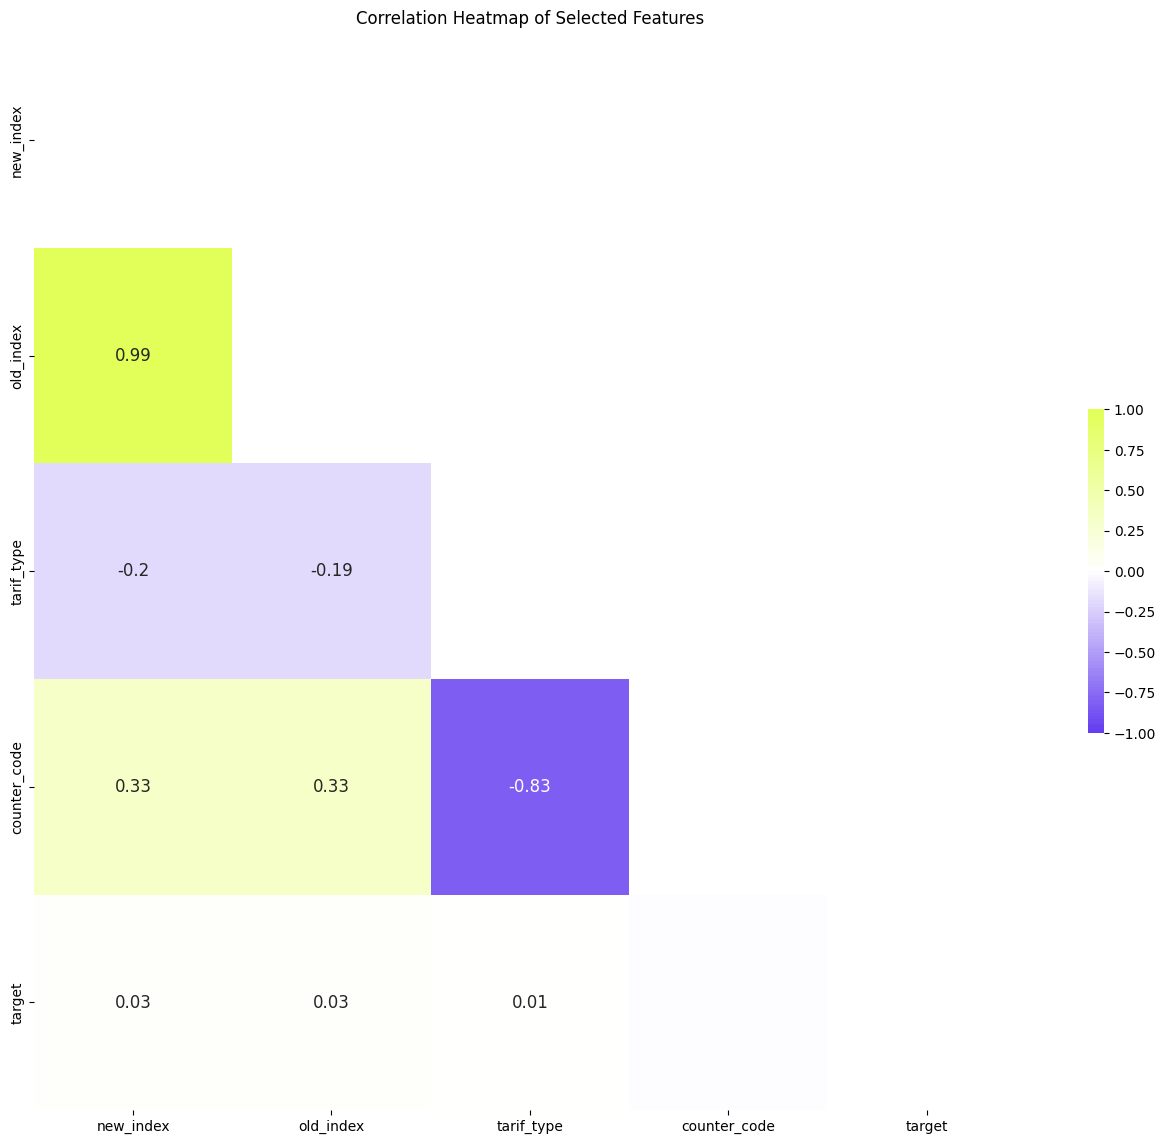

In [15]:
# ---------------------- Exploratory Data Analysis (EDA): Multivariate Analysis ----------------- #

analyzer = pu.DataAnalyzer(df_train, target_column='target', exclude_cols=['client_id'])
insights, highly_corr_df = analyzer.generate_insights()

## Univariate Analysis: Categorical

In [16]:
# ---------------------- Exploratory Data Analysis (EDA): MULTIPLE CATEGORICAL ANALYSIS ----------------- #

plotter = pu.CategoricalPlot(df_train, dataset_name='Train', exclude_cols=['client_id','creation_date','invoice_date'])

## Univariate Analysis: Numerical 

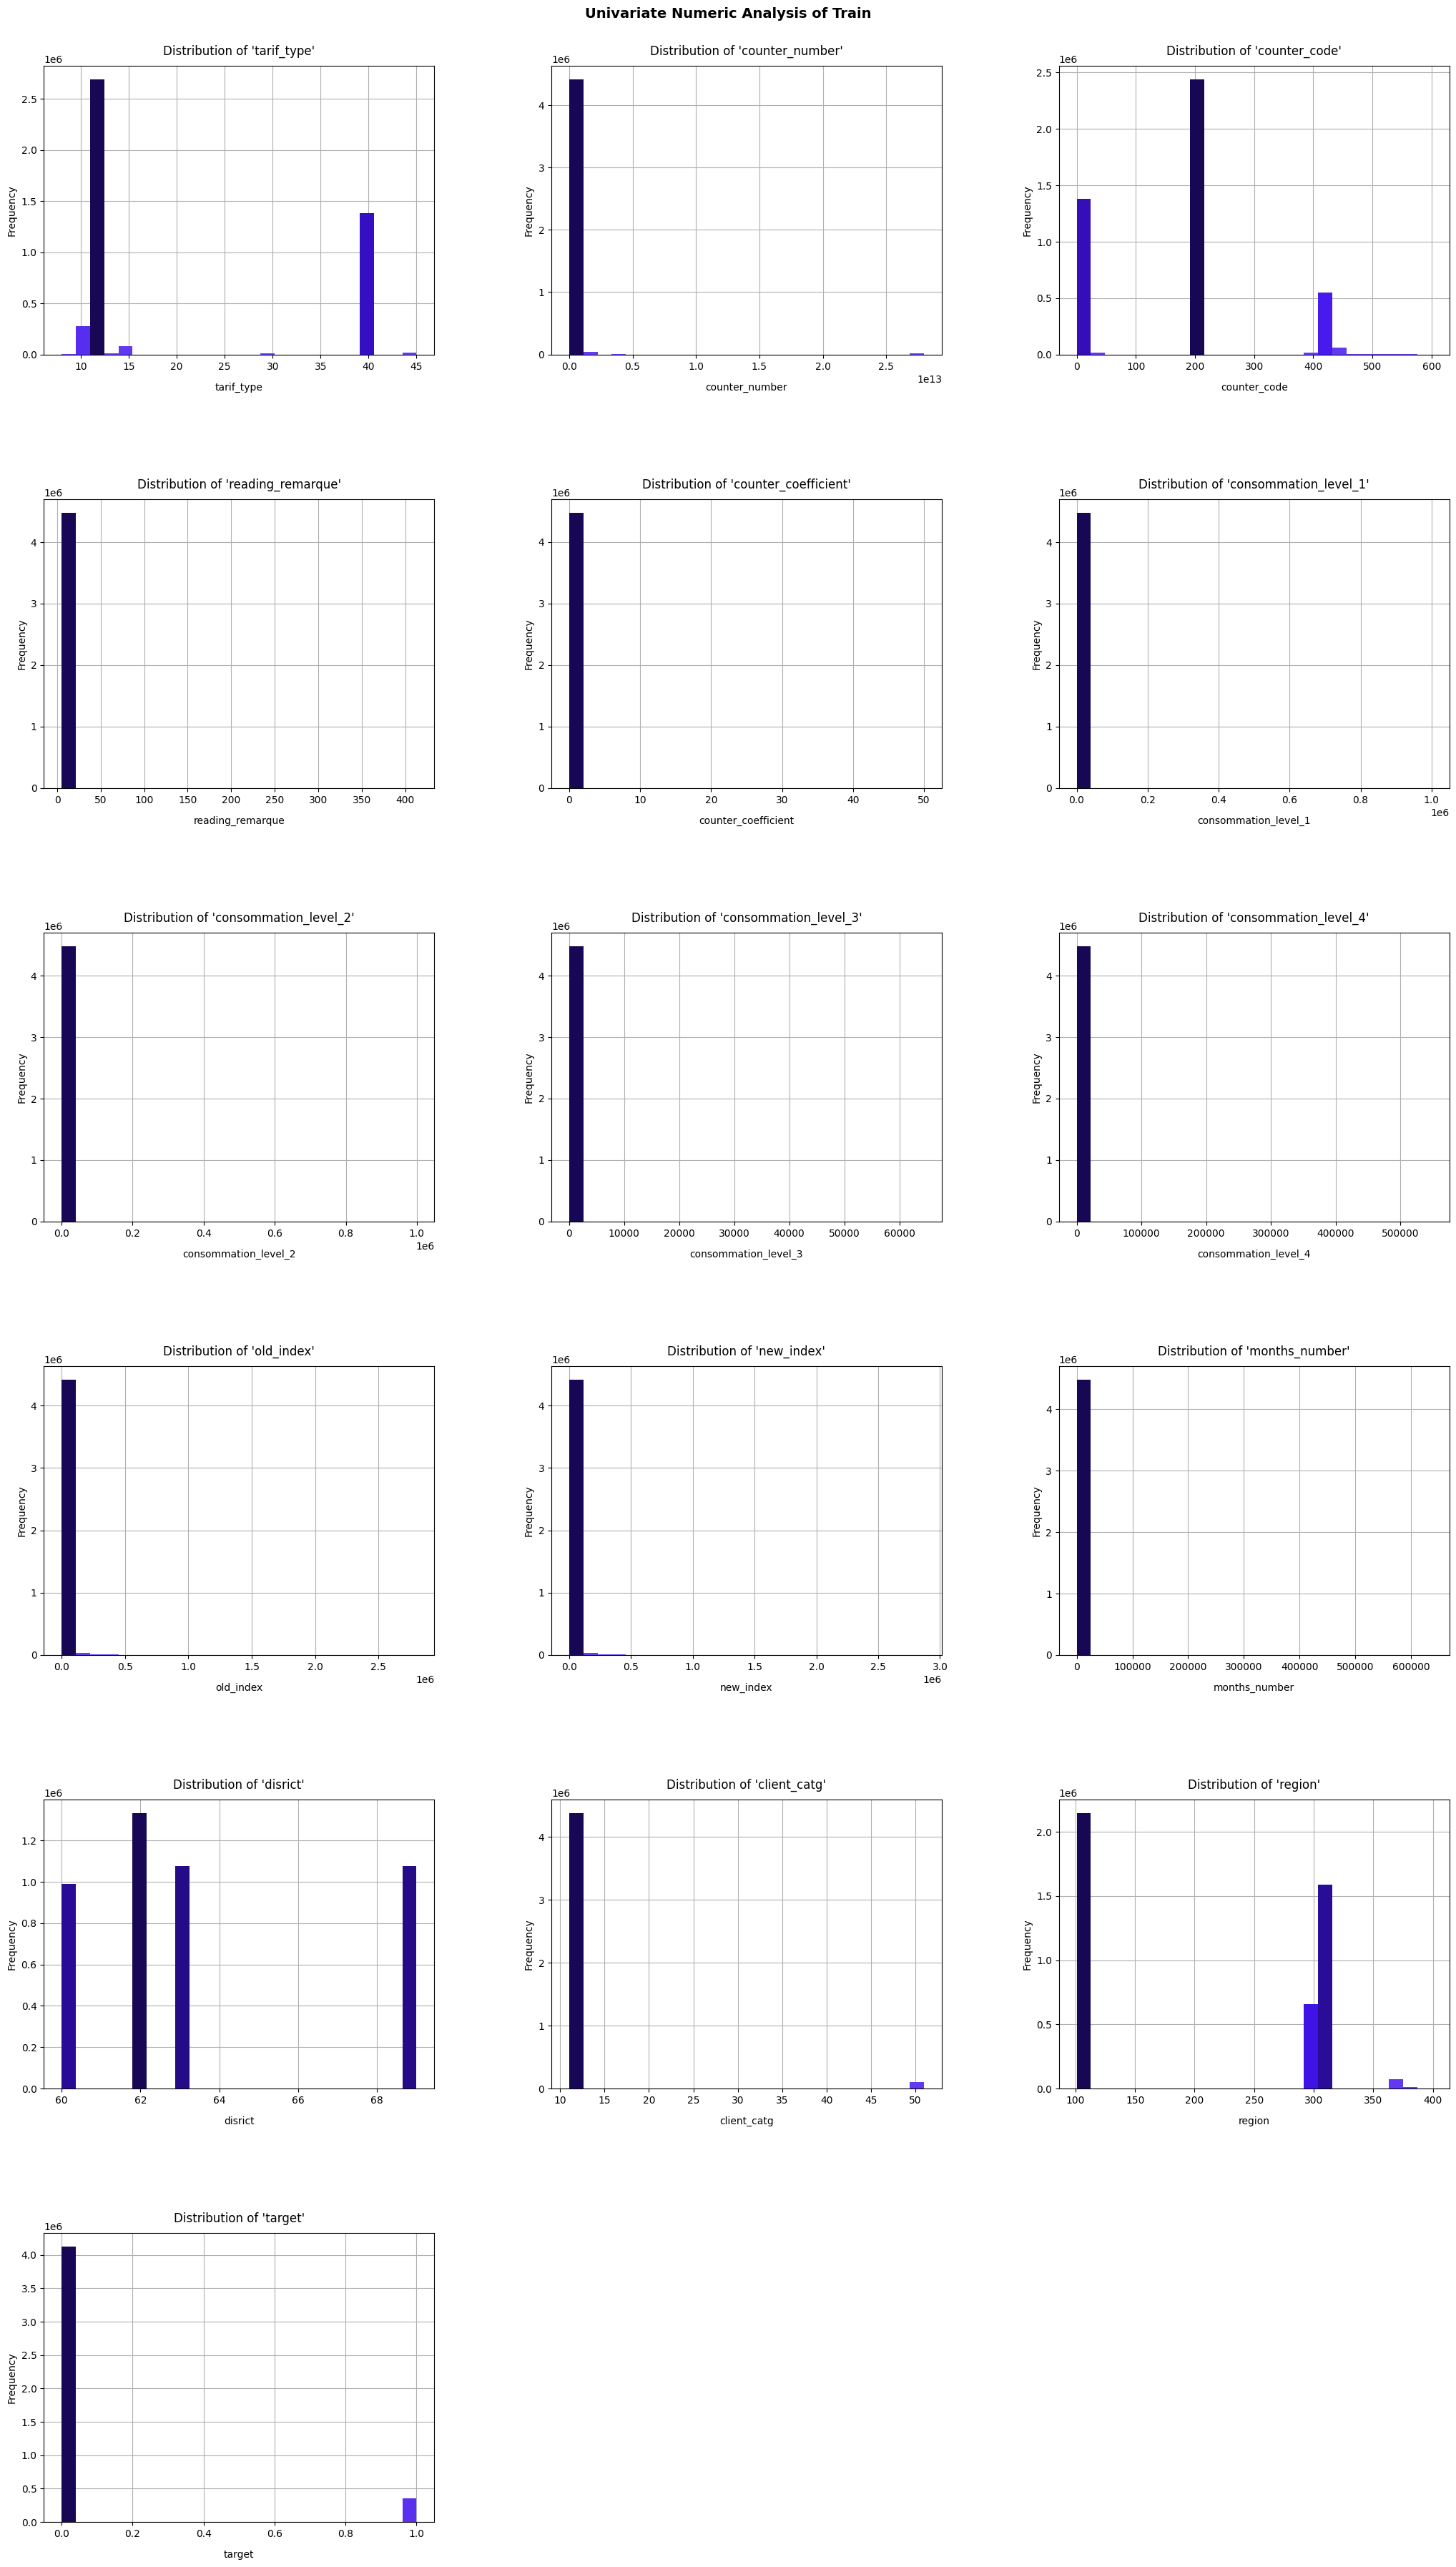

In [17]:
# ---------------------- Exploratory Data Analysis (EDA): UNIVARIATE ANALYSIS (numerical) ----------------- #

plots = pu.numeric_analysis(df_train, dataset_name='Train', variance_threshold=0.05
                            )

In [19]:
# ---------------------- Exploratory Data Analysis (EDA): Uniques per numerical features ----------------- #

fig = pu.plot_unique_values(df_train, dataset_name='Train', log_scale=True)

## Outliers

In [17]:
# ---------------------- Exploratory Data Analysis (EDA): Outliers Detection ----------------- #

#pu.detect_outliers(df_train, dataset_name='Train', log_scale=True)

INFO:root: Skipping features with variance lower than 0.03: target (variance: 0.07265533522315898, unique values: 2)


In [2]:
# ---------------------- STRIP CHARTS: DISTRIBUTION & PATTERNS ---------------------- #

#pu.strip_chart(df_train, dataset_name='Train', log_scale=True)

## Distribution of target

In [6]:
# ---------------------- EDA: Distribution of specific categorical feature ----------------- #

pu.create_pie_chart(df_train, categorical_feature='target')                                                          

INFO:root:The feature 'target' is binary. Converting to categorical.


# Data Cleaning

## Sorting Columns

In [20]:
# ---------------------- PREPROCESSING: Sorting columns ----------------- #
sorted_datasets = cu.sort_columns(datasets={
    "DF Train": df_train,
    "DF Test": df_test,
})

# Update df_train and df_test with their sorted versions
df_train = sorted_datasets["DF Train"]
df_test = sorted_datasets["DF Test"]

INFO:root:Shape of DF Train: (4476749, 21)



DF Train - Sorted Features (A to Z):
Client_catg
Client_id
Consommation_level_1
Consommation_level_2
Consommation_level_3
Consommation_level_4
Counter_code
Counter_coefficient
Counter_number
Counter_statue
Counter_type
Creation_date
Disrict
Invoice_date
Months_number
New_index
Old_index
Reading_remarque
Region
Target
Tarif_type

---------------------------------------------


INFO:root:Shape of DF Test: (1939730, 20)



DF Test - Sorted Features (A to Z):
Client_catg
Client_id
Consommation_level_1
Consommation_level_2
Consommation_level_3
Consommation_level_4
Counter_code
Counter_coefficient
Counter_number
Counter_statue
Counter_type
Creation_date
Disrict
Invoice_date
Months_number
New_index
Old_index
Reading_remarque
Region
Tarif_type

---------------------------------------------


## Rename Columns

In [22]:
# ---------------------- Execute rename_columns function with datasets & print results ---------------------- #

# Dictionary of datasets
datasets = {
    "Train": df_train.copy(),
    "Test": df_test.copy()
}

# ---------------------- Define mapping/rules/logic ---------------------- #

rename_map_cl = {
    "Disrict": "district",
    "Consommation_level_1": "consumption_level_1",
    "Consommation_level_2": "consumption_level_2",
    "Consommation_level_3": "consumption_level_3",
    "Consommation_level_4": "consumption_level_4",  
}
# ---------------------- Iterative Processing ---------------------- #

# Process each dataset to rename columns, print comparison results, and then display sorted columns
for name, dataset in datasets.items():
    datasets[name] = cu.rename_and_compare_columns(dataset,name, rename_map_cl)  

# ---------------------- Updating the Original DataFrames ---------------------- #

df_train_renamed = datasets["Train"]
df_test_renamed = datasets["Test"]


INFO:root:Columns renamed successfully in a case-insensitive manner.



----------------------------------------------------------------------

Column Rename Comparison for 'Train':
                 Before                After
0               Disrict             district
1  Consommation_level_1  consumption_level_1
2  Consommation_level_2  consumption_level_2
3  Consommation_level_3  consumption_level_3
4  Consommation_level_4  consumption_level_4


Sorted Columns in 'Train' (A to Z):
   Data Type          Column Name
0      int64          Client_catg
1     object            Client_id
2      int64         Counter_code
3      int64  Counter_coefficient
4      int64       Counter_number
5     object       Counter_statue
6     object         Counter_type
7     object        Creation_date
8     object         Invoice_date
9      int64        Months_number
10     int64            New_index
11     int64            Old_index
12     int64     Reading_remarque
13     int64               Region
14   float64               Target
15     int64           Tarif_type
16 

INFO:root:Columns renamed successfully in a case-insensitive manner.



----------------------------------------------------------------------

Column Rename Comparison for 'Test':
                 Before                After
0               Disrict             district
1  Consommation_level_1  consumption_level_1
2  Consommation_level_2  consumption_level_2
3  Consommation_level_3  consumption_level_3
4  Consommation_level_4  consumption_level_4


Sorted Columns in 'Test' (A to Z):
   Data Type          Column Name
0      int64          Client_catg
1     object            Client_id
2      int64         Counter_code
3      int64  Counter_coefficient
4      int64       Counter_number
5      int64       Counter_statue
6     object         Counter_type
7     object        Creation_date
8     object         Invoice_date
9      int64        Months_number
10     int64            New_index
11     int64            Old_index
12     int64     Reading_remarque
13     int64               Region
14     int64           Tarif_type
15     int64  consumption_level_1
16   

## Data Conversion

In [23]:
# --------------------------- PREPROCESSING: Data Type Conversion -------------------- #

manual_conversions_1={
        'Target':'int', 
        'Client_id':'category',
        'Client_catg':'category',
        'district':'category',
        'Counter_type':'category',
        'Region':'category',      
}

preprocessor = cu.DataPreprocessor(
    manual_conversions=manual_conversions_1,
    max_unique_values_for_category=50
)

datasets = {
    "DF Train": df_train_renamed.copy(), 
    "DF Test": df_test_renamed.copy()   
}

for dataset_name, df in datasets.items():
    preprocessor.dataset_name = dataset_name 
    datasets[dataset_name] = preprocessor.convert_data_types(df)

# Extract the converted dataframes
df_train_converted = datasets["DF Train"]
df_test_converted = datasets["DF Test"]

INFO:root:Manually converted Target to int
INFO:root:Manually converted Client_id to category
INFO:root:Manually converted Client_catg to category
INFO:root:Manually converted district to category
INFO:root:Manually converted Counter_type to category
INFO:root:Manually converted Region to category
INFO:root:Automatically converted Counter_statue to category
INFO:root:Converted Creation_date to datetime
INFO:root:Converted Invoice_date to datetime
INFO:root:Data type conversion successful.




DF Train - Data Type Conversion:
                 Column   Before           After
0           Client_catg    int64        category
1             Client_id   object        category
2          Counter_code    int64           int16
3   Counter_coefficient    int64            int8
4        Counter_number    int64           int64
5        Counter_statue   object        category
6          Counter_type   object        category
7         Creation_date   object  datetime64[ns]
8          Invoice_date   object  datetime64[ns]
9         Months_number    int64           int32
10            New_index    int64           int32
11            Old_index    int64           int32
12     Reading_remarque    int64           int16
13               Region    int64        category
14               Target  float64            int8
15           Tarif_type    int64            int8
16  consumption_level_1    int64           int32
17  consumption_level_2    int64           int32
18  consumption_level_3    int64   

INFO:root:Manually converted Client_id to category
INFO:root:Manually converted Client_catg to category
INFO:root:Manually converted district to category
INFO:root:Manually converted Counter_type to category
INFO:root:Manually converted Region to category
INFO:root:Converted Creation_date to datetime
INFO:root:Converted Invoice_date to datetime
INFO:root:Data type conversion successful.




DF Test - Data Type Conversion:
                 Column  Before           After
0           Client_catg   int64        category
1             Client_id  object        category
2          Counter_code   int64           int16
3   Counter_coefficient   int64            int8
4        Counter_number   int64           int64
5        Counter_statue   int64            int8
6          Counter_type  object        category
7         Creation_date  object  datetime64[ns]
8          Invoice_date  object  datetime64[ns]
9         Months_number   int64           int32
10            New_index   int64           int32
11            Old_index   int64           int32
12     Reading_remarque   int64            int8
13               Region   int64        category
14           Tarif_type   int64            int8
15  consumption_level_1   int64           int32
16  consumption_level_2   int64           int32
17  consumption_level_3   int64           int32
18  consumption_level_4   int64           int32
19     

## Removing duplicates

In [24]:
# ---------------------- PREPROCESSING: Removing Duplicates ---------------------- #

datasets = {
    "Train Data": df_train_converted.copy(),
    "Test Data": df_test_converted.copy()
}

# ---------------------- Iterative Processing ---------------------- #
# Process each dataset to remove duplicates and print results
for name, dataset in datasets.items():
    datasets[name] = cu.remove_duplicates(dataset, name) 

df_train_deduped = datasets["Train Data"]
df_test_deduped = datasets["Test Data"]

INFO:root:Removed 11 duplicates from Train Data.



Train Data - Duplicate Removal:
  Shape before removal: (4476749, 21)
  Shape after removal: (4476738, 21)
  Number of duplicates removed: 11




INFO:root:Removed 8 duplicates from Test Data.



Test Data - Duplicate Removal:
  Shape before removal: (1939730, 20)
  Shape after removal: (1939722, 20)
  Number of duplicates removed: 8




## Handling missing values

In [25]:
# ----------------- PREPROCESSING: Handling Missing Values ----------------- #

# Initialize and use the MissingValueHandler
handler = cu.MissingValueHandler(target_variable='Target')
handler.fit(df_train_deduped) 

# Apply imputation to both training and test data
df_train_imputed = handler.transform(df_train_deduped)
df_test_imputed = handler.transform(df_test_deduped)


INFO:root:MissingValueHandler initialized successfully.
INFO:root:Calculated medians for features: {'Counter_code': 203.0, 'Counter_coefficient': 1.0, 'Counter_number': 494561.0, 'Months_number': 4.0, 'New_index': 8192.0, 'Old_index': 7690.0, 'Reading_remarque': 8.0, 'Tarif_type': 11.0, 'consumption_level_1': 274.0, 'consumption_level_2': 0.0, 'consumption_level_3': 0.0, 'consumption_level_4': 0.0}


                Feature  Missing Before  Missing After
0           Client_catg               0              0
1             Client_id               0              0
2          Counter_code               0              0
3   Counter_coefficient               0              0
4        Counter_number               0              0
5        Counter_statue               0              0
6          Counter_type               0              0
7         Creation_date               0              0
8          Invoice_date               0              0
9         Months_number               0              0
10            New_index               0              0
11            Old_index               0              0
12     Reading_remarque               0              0
13               Region               0              0
14               Target               0              0
15           Tarif_type               0              0
16  consumption_level_1               0              0
17  consum

In [30]:
df_train_imputed.dtypes

Client_catg                  category
Client_id                    category
Counter_code                    int16
Counter_coefficient              int8
Counter_number                  int64
Counter_statue               category
Counter_type                 category
Creation_date          datetime64[ns]
Invoice_date           datetime64[ns]
Months_number                   int32
New_index                       int32
Old_index                       int32
Reading_remarque                int16
Region                       category
Target                           int8
Tarif_type                       int8
consumption_level_1             int32
consumption_level_2             int32
consumption_level_3             int32
consumption_level_4             int32
district                     category
dtype: object

## SAVE & LOAD

In [35]:
# ---------------------- SAVE & LOAD DATA ---------------------- #

## PARQUET
manager.save_df(df_train_imputed, 'df_train_imputed', 'Saved_Dataframes', 'parquet')
manager.save_df(df_test_imputed, 'df_test_imputed', 'Saved_Dataframes', 'parquet')

df_train_imputed_loaded = manager.load_data("df_train_imputed.parquet", "Saved_Dataframes")
df_test_imputed_loaded = manager.load_data("df_test_imputed.parquet", "Saved_Dataframes")

INFO:root:'df_train_imputed.parquet' saved successfully.
INFO:root:Data types JSON saved successfully at C:\Users\Barba\FraudDetection_EGC\Saved_Dataframes\df_train_imputed_dtypes.json

INFO:root:'df_test_imputed.parquet' saved successfully.
INFO:root:Data types JSON saved successfully at C:\Users\Barba\FraudDetection_EGC\Saved_Dataframes\df_test_imputed_dtypes.json

INFO:root:'df_train_imputed.parquet' loaded successfully from C:\Users\Barba\FraudDetection_EGC\Saved_Dataframes\df_train_imputed.parquet, 
 -> shape: (4476738, 21)

INFO:root:'df_test_imputed.parquet' loaded successfully from C:\Users\Barba\FraudDetection_EGC\Saved_Dataframes\df_test_imputed.parquet, 
 -> shape: (1939722, 20)



In [34]:
df_train_imputed_loaded.dtypes

Client_catg                  category
Client_id                    category
Counter_code                    int16
Counter_coefficient              int8
Counter_number                  int64
Counter_statue               category
Counter_type                 category
Creation_date          datetime64[ns]
Invoice_date           datetime64[ns]
Months_number                   int32
New_index                       int32
Old_index                       int32
Reading_remarque                int16
Region                       category
Target                           int8
Tarif_type                       int8
consumption_level_1             int32
consumption_level_2             int32
consumption_level_3             int32
consumption_level_4             int32
district                     category
dtype: object

# Data Transformation 

## Binning

In [36]:
# -------------------------- PREPROCESSING: Binning & Fixing Errors ------------------- #

rules = {
    'Region': {
        'bins': [100, 200, 300, float('inf')],
        'labels': ['100', '200', '300']
        },
    'Counter_statue': {
        'bins': [0, 1, 2, 3, 4, 5, float('inf')],
        'labels': ['0', '1', '2','3','4','5',]
        },
    'Counter_code': {
        'bins': [0, 151, 251, 351, 451, 551, 651, float('inf')],
        'labels': ['100', '200', '300', '400', '500', '600','700']
        },

    }

binner = cu.DataBinner(rules)

df_train_binned = binner.apply_binning(df_train_imputed_loaded.copy(), 'Train')
df_test_binned = binner.apply_binning(df_test_imputed_loaded.copy(), 'Test')

INFO:root:Binning successfully applied to Train. Columns: ['Region', 'Counter_statue', 'Counter_code']
INFO:root:Binning successfully applied to Test. Columns: ['Region', 'Counter_statue', 'Counter_code']


In [37]:
# -------------------- ANALYSIS: Function to GET UNIQUE VALUES ----------------- #

cu.check_unique_values(df_train_binned, "Train")


Unique values summary for Train:


                  Column            Type                                  First Uniques   Count         Min             Max
0            Client_catg        category                                     11, 12, 51       3          11              51
1              Client_id        category  train_Client_0, train_Client_1, train_Clie...  135493           -               -
2           Counter_code           int16  0, 1, 5, 10, 16, 25, 40, 65, 101, 102, 201...      42           0             600
3    Counter_coefficient            int8  0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 20, 30,...      16           0              50
4         Counter_number           int64  0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13,...  201893           0  27981145458733
5         Counter_statue         float64  0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 46.0, 420.0,...      11        0.00       269375.00
6           Counter_type        category                                      ELEC, GAZ       2 

In [38]:
# -------------------- ANALYSIS: Function to GET UNIQUE VALUES ----------------- #

cu.check_unique_values(df_test_binned, "Test")


Unique values summary for Test:


                  Column            Type                                  First Uniques   Count         Min             Max
0            Client_catg        category                                     11, 12, 51       3          11              51
1              Client_id        category  test_Client_0, test_Client_1, test_Client_...   58069           -               -
2           Counter_code           int16  5, 10, 16, 25, 40, 65, 101, 102, 201, 202,...      39           5             600
3    Counter_coefficient            int8                          0, 1, 2, 3, 4, 10, 21       7           0              21
4         Counter_number           int64  0, 1, 3, 8, 10, 11, 13, 14, 19, 22, 24, 29...   91966           0  27873400010939
5         Counter_statue            int8                               0, 1, 2, 3, 4, 5       6           0               5
6           Counter_type        category                                      ELEC, GAZ       2  

In [39]:
# ---------------------- SAVE & LOAD DATA ---------------------- #

## PARQUET
manager.save_df(df_train_binned, 'df_train_binned', 'Saved_Dataframes', 'parquet')
manager.save_df(df_test_binned, 'df_test_binned', 'Saved_Dataframes', 'parquet')

INFO:root:'df_train_binned.parquet' saved successfully.
INFO:root:Data types JSON saved successfully at C:\Users\Barba\FraudDetection_EGC\Saved_Dataframes\df_train_binned_dtypes.json

INFO:root:'df_test_binned.parquet' saved successfully.
INFO:root:Data types JSON saved successfully at C:\Users\Barba\FraudDetection_EGC\Saved_Dataframes\df_test_binned_dtypes.json



In [40]:
df_train_binned.dtypes

Client_catg                   category
Client_id                     category
Counter_code                     int16
Counter_coefficient               int8
Counter_number                   int64
Counter_statue                 float64
Counter_type                  category
Creation_date           datetime64[ns]
Invoice_date            datetime64[ns]
Months_number                    int32
New_index                        int32
Old_index                        int32
Reading_remarque                 int16
Region                           int64
Target                            int8
Tarif_type                        int8
consumption_level_1              int32
consumption_level_2              int32
consumption_level_3              int32
consumption_level_4              int32
district                      category
Region_Group                  category
Counter_statue_Group          category
Counter_code_Group            category
dtype: object

## Categorical Encoding

In [78]:
# ---------------------- PREPROCESSING: Encoding Categorical Variables ---------------------- #

manual_encoding = {}

encoder = cu.CategoricalEncoder(
    target_column='Target', 
    exclude_columns=['Client_id'], 
    one_hot_threshold=6,
    manual_encoding=manual_encoding
)

df_train_encoded = encoder.encode_dataframe(df_train_binned, "Train")
df_test_encoded = encoder.encode_dataframe(df_test_binned, "Test")

INFO:root:Encoding completed successfully in Train.
INFO:root:Target column 'Target' not found in DataFrame.



Encoding Results for Train:
Dataset Name: Train
Categorical Columns: ['Client_catg', 'Counter_code_Group', 'Counter_statue_Group', 'Counter_type', 'Region_Group', 'district']
Original Shape: (4476738, 24)
New Shape: (4476738, 43)
Newly Added Columns: ['Client_catg_11', 'Client_catg_12', 'Client_catg_51', 'Counter_code_Group_700', 'Counter_code_Group_400', 'Counter_code_Group_300', 'Counter_code_Group_200', 'Counter_code_Group_100', 'Counter_code_Group_600', 'Counter_code_Group_500', 'Counter_statue_Group_4', 'Counter_statue_Group_2', 'Counter_statue_Group_1', 'Counter_statue_Group_5', 'Counter_statue_Group_3', 'Counter_statue_Group_0', 'Counter_type_GAZ', 'Counter_type_ELEC', 'Region_Group_100', 'Region_Group_200', 'Region_Group_300', 'district_60', 'district_63', 'district_69', 'district_62']
Newly Added Column Count: 25

---------------------------------------------------------------------------


INFO:root:Encoding completed successfully in Test.



Encoding Results for Test:
Dataset Name: Test
Categorical Columns: ['Client_catg', 'Counter_code_Group', 'Counter_statue_Group', 'Counter_type', 'Region_Group', 'district']
Original Shape: (1939722, 23)
New Shape: (1939722, 42)
Newly Added Columns: ['Client_catg_11', 'Client_catg_12', 'Client_catg_51', 'Counter_code_Group_700', 'Counter_code_Group_400', 'Counter_code_Group_300', 'Counter_code_Group_200', 'Counter_code_Group_100', 'Counter_code_Group_600', 'Counter_code_Group_500', 'Counter_statue_Group_4', 'Counter_statue_Group_2', 'Counter_statue_Group_1', 'Counter_statue_Group_5', 'Counter_statue_Group_3', 'Counter_statue_Group_0', 'Counter_type_GAZ', 'Counter_type_ELEC', 'Region_Group_100', 'Region_Group_200', 'Region_Group_300', 'district_60', 'district_63', 'district_69', 'district_62']
Newly Added Column Count: 25

---------------------------------------------------------------------------


In [79]:
# -------------------------- PREPROCESSING: SORT ------------------- #

sorted_datasets = cu.sort_columns(datasets={
    "DF Train": df_train_encoded.copy(),
    "DF Test": df_test_encoded.copy(),
})

df_train_encoded = sorted_datasets["DF Train"]
df_test_encoded = sorted_datasets["DF Test"]

INFO:root:Shape of DF Train: (4476738, 43)



DF Train - Sorted Features (A to Z):
Client_catg_11
Client_catg_12
Client_catg_51
Client_id
Consumption_level_1
Consumption_level_2
Consumption_level_3
Consumption_level_4
Counter_code
Counter_code_Group_100
Counter_code_Group_200
Counter_code_Group_300
Counter_code_Group_400
Counter_code_Group_500
Counter_code_Group_600
Counter_code_Group_700
Counter_coefficient
Counter_number
Counter_statue
Counter_statue_Group_0
Counter_statue_Group_1
Counter_statue_Group_2
Counter_statue_Group_3
Counter_statue_Group_4
Counter_statue_Group_5
Counter_type_ELEC
Counter_type_GAZ
Creation_date
District_60
District_62
District_63
District_69
Invoice_date
Months_number
New_index
Old_index
Reading_remarque
Region
Region_Group_100
Region_Group_200
Region_Group_300
Target
Tarif_type

---------------------------------------------


INFO:root:Shape of DF Test: (1939722, 42)



DF Test - Sorted Features (A to Z):
Client_catg_11
Client_catg_12
Client_catg_51
Client_id
Consumption_level_1
Consumption_level_2
Consumption_level_3
Consumption_level_4
Counter_code
Counter_code_Group_100
Counter_code_Group_200
Counter_code_Group_300
Counter_code_Group_400
Counter_code_Group_500
Counter_code_Group_600
Counter_code_Group_700
Counter_coefficient
Counter_number
Counter_statue
Counter_statue_Group_0
Counter_statue_Group_1
Counter_statue_Group_2
Counter_statue_Group_3
Counter_statue_Group_4
Counter_statue_Group_5
Counter_type_ELEC
Counter_type_GAZ
Creation_date
District_60
District_62
District_63
District_69
Invoice_date
Months_number
New_index
Old_index
Reading_remarque
Region
Region_Group_100
Region_Group_200
Region_Group_300
Tarif_type

---------------------------------------------


In [80]:
# -------------------- ANALYSIS: Function to GET UNIQUE VALUES ----------------- #

cu.check_unique_values(df_train_encoded, "Train")


Unique values summary for Train:


                    Column            Type                                  First Uniques   Count         Min             Max
0           Client_catg_11           int32                                           0, 1       2           0               1
1           Client_catg_12           int32                                           0, 1       2           0               1
2           Client_catg_51           int32                                           0, 1       2           0               1
3                Client_id        category  train_Client_0, train_Client_1, train_Clie...  135493           -               -
4      Consumption_level_1           int32  0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...    8295           0          999910
5      Consumption_level_2           int32  0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...   12576           0          999073
6      Consumption_level_3           int32  0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 

## SAVE & LOAD

In [82]:
# ---------------------- SAVE & LOAD DATA ---------------------- #

## PARQUET
manager.save_df(df_train_encoded, 'df_train_encoded', 'Saved_Dataframes', 'parquet')
manager.save_df(df_test_encoded, 'df_test_encoded', 'Saved_Dataframes', 'parquet')

## CSV
# manager.save_df(df_train_encoded, 'df_train_encoded', 'Saved_Dataframes', format='csv', max_rows=10000)
# manager.save_df(df_test_encoded, 'df_test_encoded', 'Saved_Dataframes', format='csv', max_rows=10000)

df_train_encoded_loaded = manager.load_data("df_train_encoded.parquet", "Saved_Dataframes")
df_test_encoded_loaded = manager.load_data("df_test_encoded.parquet", "Saved_Dataframes")

INFO:root:'df_train_encoded.parquet' saved successfully.
INFO:root:JSON dtypes saved at: C:\Users\Barba\FraudDetection_EGC\Saved_Dataframes\df_train_encoded_dtypes.json

INFO:root:'df_test_encoded.parquet' saved successfully.
INFO:root:JSON dtypes saved at: C:\Users\Barba\FraudDetection_EGC\Saved_Dataframes\df_test_encoded_dtypes.json

INFO:root:'df_train_encoded.parquet' loaded successfully from C:\Users\Barba\FraudDetection_EGC\Saved_Dataframes\df_train_encoded.parquet, 
 -> shape: (4476738, 43)
INFO:root:'df_test_encoded.parquet' loaded successfully from C:\Users\Barba\FraudDetection_EGC\Saved_Dataframes\df_test_encoded.parquet, 
 -> shape: (1939722, 42)


In [63]:
df_train_encoded_loaded = manager.load_data("df_train_encoded.parquet", "Saved_Dataframes")
df_test_encoded_loaded = manager.load_data("df_test_encoded.parquet", "Saved_Dataframes")

INFO:root:'df_train_encoded.parquet' loaded successfully from C:\Users\Barba\FraudDetection_EGC\Saved_Dataframes\df_train_encoded.parquet, 
 -> shape: (4476738, 43)

INFO:root:'df_test_encoded.parquet' loaded successfully from C:\Users\Barba\FraudDetection_EGC\Saved_Dataframes\df_test_encoded.parquet, 
 -> shape: (1939722, 42)



## Feature Engineering > Dates

In [83]:
# ---------------------- PREPROCESSING: Feature Engineering ---------------------- #

feature_engineer = cu.FeatureEngineer(groupby_col='Client_id', date_columns_for_date_features=['Creation_date', 'Invoice_date'])

df_train_featurized, _ = feature_engineer.fit_transform(df_train_encoded_loaded) 
df_test_featurized = feature_engineer.transform(df_test_encoded_loaded)        


Train - Feature Engineering Results:
Added Date Features: ['Creation_date_year', 'Creation_date_month', 'Creation_date_day', 'Creation_date_is_weekday', 'Invoice_date_year', 'Invoice_date_month', 'Invoice_date_day', 'Invoice_date_is_weekday']
Added Time Gap Features: ['days_since_Creation_date', 'months_since_Creation_date', 'time_gap_to_previous_Invoice_date', 'days_since_Invoice_date', 'months_since_Invoice_date']

Original Shape: (4476738, 43)
New Shape: (4476738, 56)
All Added Columns: ['time_gap_to_previous_Invoice_date', 'months_since_Invoice_date', 'Invoice_date_is_weekday', 'months_since_Creation_date', 'Creation_date_day', 'Invoice_date_year', 'Creation_date_is_weekday', 'Invoice_date_month', 'Invoice_date_day', 'Creation_date_year', 'days_since_Creation_date', 'Creation_date_month', 'days_since_Invoice_date']
Added Column Count: 13

--------------------------------------------------
Test - Feature Engineering Results:
Added Date Features: ['Creation_date_year', 'Creation_date

## Feature Augmentation: Arithmetic Operations

In [87]:
# ---------------------- PREPROCESSING: Integrating Arithmetic Transformations (Feature Augmentation) -------------------- #

def apply_arithmetic_operations(datasets, operations, columns):
    """
    Applies specified arithmetic operations on given columns of multiple datasets.

    Parameters:
    datasets (dict of pd.DataFrame): Dictionary of DataFrames on which to apply operations. 
                                     Key is the dataset name, and value is the DataFrame.
    operations (list of str): List of operations to apply. Supported operations are 'add', 'subtract', 'multiply', 'divide'.
    columns (list of tuple): List of tuples specifying the column pairs to perform operations on.
                             Each tuple should have two elements (column1, column2).

    Returns:
    dict: A dictionary of DataFrames with applied arithmetic operations. Key is the dataset name.

    Raises:
    ValueError: If an unsupported operation is provided.
    """

    # Supported operations
    supported_operations = {
        'add': lambda x, y: x + y,
        'subtract': lambda x, y: x - y,
        'multiply': lambda x, y: x * y,
        'divide': lambda x, y: x / y
    }

    # Check for unsupported operations
    for op in operations:
        if op not in supported_operations:
            raise ValueError(f"Unsupported operation: {op}")

    # Apply operations on each dataset
    processed_datasets = {}
    for dataset_name, df in datasets.items():
        try:
            for op in operations:
                for col1, col2 in columns:
                    new_col_name = f"{col1}_{op}_{col2}"
                    df[new_col_name] = supported_operations[op](df[col1], df[col2])

            processed_datasets[dataset_name] = df

            logging.info(f"Arithmetic operations applied successfully on {dataset_name}")

        except Exception as e:
            logging.error(f"Error applying operations on {dataset_name}: {e}")
            processed_datasets[dataset_name] = df  # Return original DataFrame in case of error

    return processed_datasets

# ---------------------- Execute function(s) for Applying arithmetic Operations Engineering ---------------------- #

datasets = {
    "Train": df_train_featurized.copy(),
    "Test": df_test_featurized.copy()
}

# ---------------------- Define mapping/rules/logic ---------------------- #

# 'add', 'subtract', 'multiply','divide'
operations = ['subtract']              
columns = [('New_index', 'Old_index')]

result = apply_arithmetic_operations(datasets, operations, columns)

# ---------------------- Updating the Original DataFrames ---------------------- #

df_train_arithmetic = datasets["Train"]
df_test_arithmetic = datasets["Test"]


INFO:root:Arithmetic operations applied successfully on Train
INFO:root:Arithmetic operations applied successfully on Test


In [89]:
# Convert column names to lowercase
df_train_arithmetic.columns = [col.lower() for col in df_train_arithmetic.columns]
df_test_arithmetic.columns = [col.lower() for col in df_test_arithmetic.columns]

## SAVE & LOAD

In [4]:
# ---------------------- SAVE & LOAD DATA ---------------------- #

## PARQUET
# manager.save_df(df_train_arithmetic, 'df_train_arithmetic', 'Saved_Dataframes', 'parquet')
# manager.save_df(df_test_arithmetic, 'df_test_arithmetic', 'Saved_Dataframes', 'parquet')

df_train_arithmetic = manager.load_data("df_train_arithmetic.parquet", "Saved_Dataframes")
df_test_arithmetic = manager.load_data("df_test_arithmetic.parquet", "Saved_Dataframes")

INFO:root:'df_train_arithmetic.parquet' loaded successfully from C:\Users\Barba\FraudDetection_EGC\Saved_Dataframes\df_train_arithmetic.parquet, 
 -> shape: (4476738, 57)

INFO:root:'df_test_arithmetic.parquet' loaded successfully from C:\Users\Barba\FraudDetection_EGC\Saved_Dataframes\df_test_arithmetic.parquet, 
 -> shape: (1939722, 56)



## Feature Augmentation: Aggregations

In [5]:
# ----------------- PREPROCESSING: Aggregate and Mode Imputation Enhancements (Feature Augmentation) ----------------- #

# Define mapping/rules/logic
agg_cols_dict_inv = {
    'consumption_level_1': ['sum', 'mean', 'std'], 
    'consumption_level_2': ['sum', 'mean', 'std'],
    'consumption_level_3': ['sum', 'mean', 'std'],
    'consumption_level_4': ['sum', 'mean', 'std'],
    'counter_code': ['mean'],
    'counter_coefficient': ['mean', 'std'],
    'counter_number': ['mean', 'median','std'],
    'counter_statue': ['mean', 'median'],
    'invoice_date': ['count'],
    'invoice_date_is_weekday':['mean', 'median'],
    'invoice_date_day': ['mean', 'median','std'],
    'invoice_date_month': ['mean', 'median','std'],
    'invoice_date_year': ['mean', 'median','std'],
    'months_number': ['mean', 'median','sum','std'],
    'new_index_subtract_old_index': ['sum', 'mean'],
    'reading_remarque': ['mean'],
    'tarif_type': ['mean', 'median'],
    'time_gap_to_previous_invoice_date': ['mean','std'],
    'counter_type_elec':['mean', 'count'],
    'counter_type_gaz':['mean', 'count'],
}

groupby_col = 'client_id'

feature_aggregator = cu.FeatureAggregator(agg_cols_dict_inv, groupby_col)

# Fit on the training data
feature_aggregator.fit(df_train_arithmetic.copy())

# Transform Trand & Test data  using the fitted aggregator
df_train_agg = feature_aggregator.transform(df_train_arithmetic.copy(), "Train")

# Transform the test data using the fitted aggregator
df_test_agg = feature_aggregator.transform(df_test_arithmetic.copy(), "Test")

INFO:root:Fitting aggregator to training data...
INFO:root:Custom aggregated features added successfully in Train.



Aggregation Results:
Original Shape: (4476738, 57)
New Shape: (135493, 73)
Newly aggregated cols Count: 45
--------------------------------------------------


INFO:root:Custom aggregated features added successfully in Test.



Aggregation Results:
Original Shape: (1939722, 56)
New Shape: (58069, 72)
Newly aggregated cols Count: 44
--------------------------------------------------


In [91]:
# ---------------------- ANALYSIS: Function to compare dataframes ---------------------- #

datasets={
    "Old_dataframe": df_train_arithmetic,
    "New_dataframe": df_train_agg,
}

cu.compare_dataframes(datasets)

                         Old_dataframe                           New_dataframe  Matching_col
0                                    -                     Client_catg_11_mean            No
1                                    -                     Client_catg_12_mean            No
2                                    -                     Client_catg_51_mean            No
3                                    -                Consumption_level_1_mean            No
4                                    -                 Consumption_level_1_std            No
5                                    -                 Consumption_level_1_sum            No
6                                    -                Consumption_level_2_mean            No
7                                    -                 Consumption_level_2_std            No
8                                    -                 Consumption_level_2_sum            No
9                                    -                Consumption_leve

In [6]:
# ---------------------- PREPROCESSING: Sorting columns ----------------- #
sorted_datasets = cu.sort_columns(datasets={
    "DF Train": df_train_agg,
    "DF Test": df_test_agg,
})

# Update df_train and df_test with their sorted versions
df_train_agg = sorted_datasets["DF Train"]
df_test_agg = sorted_datasets["DF Test"]

INFO:root:Shape of DF Train: (135493, 73)
INFO:root:Shape of DF Test: (58069, 72)



DF Train - Sorted Features (A to Z):
Client_catg_11_mean
Client_catg_12_mean
Client_catg_51_mean
Client_id
Consumption_level_1_mean
Consumption_level_1_std
Consumption_level_1_sum
Consumption_level_2_mean
Consumption_level_2_std
Consumption_level_2_sum
Consumption_level_3_mean
Consumption_level_3_std
Consumption_level_3_sum
Consumption_level_4_mean
Consumption_level_4_std
Consumption_level_4_sum
Counter_code_group_100_mean
Counter_code_group_200_mean
Counter_code_group_300_mean
Counter_code_group_400_mean
Counter_code_group_500_mean
Counter_code_group_600_mean
Counter_code_group_700_mean
Counter_code_mean
Counter_coefficient_mean
Counter_coefficient_std
Counter_number_mean
Counter_number_median
Counter_number_std
Counter_statue_group_0_mean
Counter_statue_group_1_mean
Counter_statue_group_2_mean
Counter_statue_group_3_mean
Counter_statue_group_4_mean
Counter_statue_group_5_mean
Counter_statue_mean
Counter_statue_median
Counter_type_elec_count
Counter_type_elec_mean
Counter_type_gaz_co

## Updating Data

In [7]:
# ---------------------- PREPROCESSING: UPDATE & RENAME ---------------------- #

# Define rename_map to select columns to rename
rename_map = {
    'Target_mean': 'Target'
}

# Define columns to drop or select (use only one of these options at a time)
columns_to_drop= [] 

# Or, selecting columns:
columns_to_select = [] 

# Process DF Train
preprocessor = cu.DataFramePreprocessor(
    rename_map=rename_map, 
    columns_to_drop=columns_to_drop, 
    columns_to_select=columns_to_select)

df_train_V1 = preprocessor.process_dataframe(df_train_agg.copy(), 'DF Train')
df_test_V1 = preprocessor.process_dataframe(df_test_agg.copy(), 'DF Test')


INFO:root:Columns renamed successfully.
INFO:root:DF Train processed from shape (135493, 73) to (135493, 73).

INFO:root:DF Test processed from shape (58069, 72) to (58069, 72).



In [210]:
# -------------------- ANALYSIS: Function to check duplicates ----------------- #

datasets = {
    "Train": df_train_V1,
    "Test": df_test_V1,
}

# Checking duplicates for each dataset
for name, dataset in datasets.items():
    cu.check_duplicates(dataset, name)

Duplicates in Train:
No duplicate rows found out of total 135493 rows.

Duplicates in Test:
No duplicate rows found out of total 58069 rows.



In [211]:
# -------------------- ANALYSIS: Function to check missing values ----------------- #

datasets = {
    "Train": df_train_V1,
    "Test": df_test_V1,
}

# Checking missing values for each dataset
for name, dataset in datasets.items():
    cu.check_missing_values(dataset, name)

Missing values in Train:
Missing values in the following columns:
- Consumption_level_1_std                   4212
Consumption_level_2_std                   4212
Consumption_level_3_std                   4212
Consumption_level_4_std                   4212
Counter_coefficient_std                   4212
Counter_number_std                        4212
Invoice_date_day_std                      4212
Invoice_date_month_std                    4212
Invoice_date_year_std                     4212
Months_number_std                         4212
Time_gap_to_previous_invoice_date_mean    4212
Time_gap_to_previous_invoice_date_std     9587
dtype: int64

Missing values in Test:
Missing values in the following columns:
- Consumption_level_1_std                   1760
Consumption_level_2_std                   1760
Consumption_level_3_std                   1760
Consumption_level_4_std                   1760
Counter_coefficient_std                   1760
Counter_number_std                        1760
Invoi

## Handling Missing Values V2

In [8]:
# ----------------- PREPROCESSING: Handling Missing Values ----------------- #

# Initialize and use the MissingValueHandler
handler = cu.MissingValueHandler(target_variable='Target')
handler.fit(df_train_V1)  

# Apply imputation to both training and test data
df_train_imputed_2 = handler.transform(df_train_V1)
df_test_imputed_2 = handler.transform(df_test_V1)

INFO:root:MissingValueHandler initialized successfully.
INFO:root:Calculated medians for features: {'Client_catg_11_mean': 1.0, 'Client_catg_12_mean': 0.0, 'Client_catg_51_mean': 0.0, 'Consumption_level_1_mean': 355.64, 'Consumption_level_1_std': 280.22, 'Consumption_level_1_sum': 10312.0, 'Consumption_level_2_mean': 4.99, 'Consumption_level_2_std': 30.42, 'Consumption_level_2_sum': 171.0, 'Consumption_level_3_mean': 0.0, 'Consumption_level_3_std': 0.0, 'Consumption_level_3_sum': 0.0, 'Consumption_level_4_mean': 0.0, 'Consumption_level_4_std': 0.0, 'Consumption_level_4_sum': 0.0, 'Counter_code_group_100_mean': 0.0, 'Counter_code_group_200_mean': 0.0, 'Counter_code_group_300_mean': 0.0, 'Counter_code_group_400_mean': 0.0, 'Counter_code_group_500_mean': 0.0, 'Counter_code_group_600_mean': 0.0, 'Counter_code_group_700_mean': 0.0, 'Counter_code_mean': 203.0, 'Counter_coefficient_mean': 1.0, 'Counter_coefficient_std': 0.0, 'Counter_number_mean': 669183.6, 'Counter_number_median': 544804.0, 

                                   Feature  Missing Before  Missing After
0                      Client_catg_11_mean               0              0
1                      Client_catg_12_mean               0              0
2                      Client_catg_51_mean               0              0
3                                Client_id               0              0
4                 Consumption_level_1_mean               0              0
5                  Consumption_level_1_std            4212              0
6                  Consumption_level_1_sum               0              0
7                 Consumption_level_2_mean               0              0
8                  Consumption_level_2_std            4212              0
9                  Consumption_level_2_sum               0              0
10                Consumption_level_3_mean               0              0
11                 Consumption_level_3_std            4212              0
12                 Consumption_level_3

In [140]:
# -------------------- ANALYSIS: Function to GET UNIQUE VALUES ----------------- #

cu.check_unique_values(df_train_imputed_2, "Train")


Unique values summary for Train:


                                               Column      Type                                  First Uniques   Count         Min                Max
0                                 Client_catg_11_mean     int32                                           0, 1       2           0                  1
1                                 Client_catg_12_mean     int32                                           0, 1       2           0                  1
2                                 Client_catg_51_mean     int32                                           0, 1       2           0                  1
3                                           Client_id  category  train_Client_0, train_Client_1, train_Clie...  135493           -                  -
4                            Consumption_level_1_mean   float64  0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0...   62024        0.00           99920.00
5                             Consumption_level_1_std   float64 

In [9]:
# ---------------------- SAVE & LOAD DATA ---------------------- #

## PARQUET
manager.save_df(df_train_imputed_2, 'df_train_imputed_2', 'Saved_Dataframes', 'parquet')
manager.save_df(df_test_imputed_2, 'df_test_imputed_2', 'Saved_Dataframes', 'parquet')

df_train_imputed_2 = manager.load_data("df_train_imputed_2.parquet", "Saved_Dataframes")
df_test_imputed_2 = manager.load_data("df_test_imputed_2.parquet", "Saved_Dataframes")

INFO:root:'df_train_imputed_2.parquet' saved successfully.
INFO:root:Data types JSON saved successfully at C:\Users\Barba\FraudDetection_EGC\Saved_Dataframes\df_train_imputed_2_dtypes.json

INFO:root:'df_test_imputed_2.parquet' saved successfully.
INFO:root:Data types JSON saved successfully at C:\Users\Barba\FraudDetection_EGC\Saved_Dataframes\df_test_imputed_2_dtypes.json

INFO:root:'df_train_imputed_2.parquet' loaded successfully from C:\Users\Barba\FraudDetection_EGC\Saved_Dataframes\df_train_imputed_2.parquet, 
 -> shape: (135493, 85)

INFO:root:'df_test_imputed_2.parquet' loaded successfully from C:\Users\Barba\FraudDetection_EGC\Saved_Dataframes\df_test_imputed_2.parquet, 
 -> shape: (58069, 84)



## Scaling

In [6]:
# ---------------------- PREPROCESSING: Data Standardization ---------------------- #

# Instantiate the DataScaler with your specific needs
scaler = cu.DataScaler(target='Target', exclude_cols=['Client_id'], method="z-score")

# Fit the scaler using your training DataFrame
scaler.fit(df_train_imputed_2)

# Transform both the training and test DataFrames
df_train_scaled = scaler.transform(df_train_imputed_2)
df_test_scaled = scaler.transform(df_test_imputed_2)

INFO:root:Scaler fitted successfully.
INFO:root:Scaling applied successfully.
INFO:root:Scaling applied successfully.


## Data Validation

In [143]:
# --------------------------- PREPROCESSING CLASS: DATA VALIDATION -------------------- #

validation_rules = {}

# Usage with auto validation
Validator = cu.DataValidator(df_train_scaled, validation_rules, exclude_cols=['Target','Client_id'])

INFO:root: 0 different error types were detected in the dataframe


## Outlier Detection 

In [7]:
# ---------------------- PREPROCESSING: Handling and Detecting Outliers ---------------------- #

outlier_handler = cu.OutlierHandler(target_column='Target', exclude_cols=['Client_id'])

# Fit outlier handler using only the training data
outlier_handler.fit(df_train_scaled, method='iqr')

# Apply to both training and test data
df_train_flagged = outlier_handler.apply_outlier_flags(df_train_scaled)
df_test_flagged = outlier_handler.apply_outlier_flags(df_test_scaled)

In [1]:
#pu.detect_outliers(df_train_flagged, log_scale=True)

In [217]:
outlier_counts_train = df_train_flagged['Is_outlier'].value_counts()

print(outlier_counts_train)

Is_outlier
1    106567
0     28926
Name: count, dtype: int64


In [216]:
outlier_counts_test = df_test_flagged['Is_outlier'].value_counts()

print(outlier_counts_test)

Is_outlier
1    45560
0    12509
Name: count, dtype: int64


In [218]:
df_train_flagged.shape

(135493, 88)

In [8]:
# Call the function to sort columns and get the sorted DataFrames
sorted_datasets = cu.sort_columns(datasets={
    "DF Train": df_train_flagged,
    "DF Test": df_test_flagged,
})

# Update df_train and df_test with their sorted versions
df_train_flagged = sorted_datasets["DF Train"]
df_test_flagged = sorted_datasets["DF Test"]

INFO:root:Shape of DF Train: (135493, 88)



DF Train - Sorted Features (A to Z):
Client_catg_11_mean
Client_catg_12_mean
Client_catg_51_mean
Client_id
Consumption_level_1_mean
Consumption_level_1_std
Consumption_level_1_std_missing_indicator
Consumption_level_1_sum
Consumption_level_2_mean
Consumption_level_2_std
Consumption_level_2_std_missing_indicator
Consumption_level_2_sum
Consumption_level_3_mean
Consumption_level_3_std
Consumption_level_3_std_missing_indicator
Consumption_level_3_sum
Consumption_level_4_mean
Consumption_level_4_std
Consumption_level_4_std_missing_indicator
Consumption_level_4_sum
Counter_code_group_100_mean
Counter_code_group_200_mean
Counter_code_group_300_mean
Counter_code_group_400_mean
Counter_code_group_500_mean
Counter_code_group_600_mean
Counter_code_group_700_mean
Counter_code_mean
Counter_coefficient_mean
Counter_coefficient_std
Counter_coefficient_std_missing_indicator
Counter_number_mean
Counter_number_median
Counter_number_std
Counter_number_std_missing_indicator
Counter_statue_group_0_mean
C

## Anomaly Detection

Epoch 1/50
1482/1482 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3660.4773 - val_loss: 7902.8682
Epoch 2/50
1482/1482 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3638.6628 - val_loss: 7902.8491
Epoch 3/50
1482/1482 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 3568.2881 - val_loss: 7902.8457
Epoch 4/50
1482/1482 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 3543.8088 - val_loss: 7902.8418
Epoch 5/50
1482/1482 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 3676.5876 - val_loss: 7902.8413
Epoch 6/50
1482/1482 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 3581.9231 - val_loss: 7902.8389
Epoch 7/50
1482/1482 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 3632.6360 - val_loss: 7902.8389
Epoch 8/50
1482/1482 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 3619.1526 - val_loss: 7902.8374
Epoch 9/50
1482/1482 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 3647.5103 - val_loss: 7902.8364
Epoch 10/50
1482/1482 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 3646.2915 - val_loss: 7902.8354
Epoch 11/50
1482/1482 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - lo

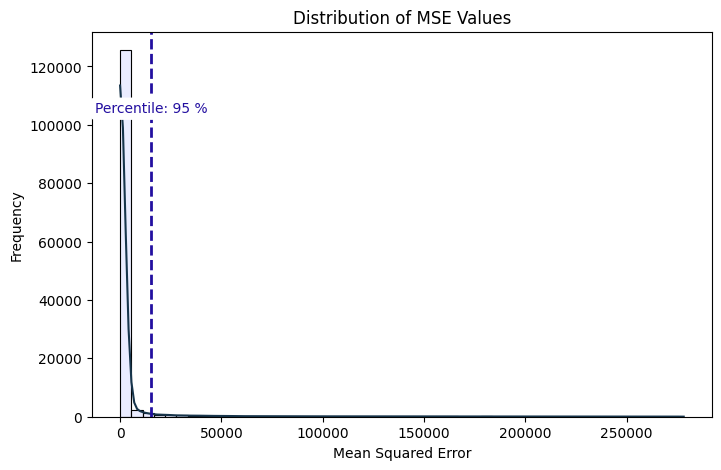

4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
count    135493.000000
mean       4924.146484
std       25467.718750
min           0.053052
25%           0.130647
50%           0.390135
75%          49.006100
max      278162.125000
dtype: float64
1815/1815 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
count    58069.000000
mean      2355.882080
std      10286.980469
min          0.054156
25%          0.130174
50%          1.499351
75%         70.203133
max      96449.507812
dtype: float64


In [10]:
# ---------------------- PREPROCESSING: AnomalyDetector with autoencoder ---------------------- #

# Initialize the anomaly detector
anomaly_detector = cu.AnomalyDetector(target_column='Target', exclude_cols=['Client_id'], 
batch_size=64, epochs=50, validation_split=0.3, percentile=95)

# Fit the anomaly detector to the training data
anomaly_detector.fit(df_train_flagged)

# Predict anomalies on both the training and test data
df_train_AE = anomaly_detector.predict(df_train_flagged)
df_test_AE = anomaly_detector.predict(df_test_flagged)


In [224]:
# Count occurrences of each value in the 'is_anomaly' column
anomaly_counts_train = df_train_AE['Is_anomaly'].value_counts()

# Display the counts
print(anomaly_counts_train)

Is_anomaly
0    128718
1      6775
Name: count, dtype: int64


In [225]:
# Count occurrences of each value in the 'is_anomaly' column
anomaly_counts_test = df_test_AE['Is_anomaly'].value_counts()

# Display the counts
print(anomaly_counts_test)

Is_anomaly
0    57371
1      698
Name: count, dtype: int64


## Handle Class Imbalance

In [12]:
# ---------------------- PREPROCESSING: Handling Class Imbalance -------------------- #

df_train_resampled = cu.handle_class_imbalance(df=df_train_AE,
                                            target_column='Target', 
                                            unique_id_col='Client_id',
                                            threshold=0.3
                                            )



Original Distribution of Train Dataset:
 Target  Count of Uniques
      0            127927
      1              7566

--------------------------------------------------
INFO:root:SMOTE applied on 'Train' dataset.



Resampled Distribution of Train Dataset:
 Target  Count of Uniques
      0            127927
      1             38378

--------------------------------------------------


# SAVE

In [ ]:
# ---------------------- SAVE & LOAD DATA ---------------------- #

## PARQUET
manager.save_df(df_train_resampled, 'df_train_resampled', 'Saved_Dataframes', 'parquet')
manager.save_df(df_test_AE, 'df_test_AE', 'Saved_Dataframes', 'parquet')

# INTRO: Fraud Detection in Electricity and Gas Consumption (2/2)

## Load Data

In [4]:
# ---------------------- SAVE & LOAD DATA ---------------------- #

df_train_cleaned = manager.load_data("df_train_resampled.parquet", "Saved_Dataframes")
df_test_cleaned = manager.load_data("df_test_AE.parquet", "Saved_Dataframes")

INFO:root:'df_train_resampled.parquet' loaded successfully from C:\Users\Barba\BT_FraudDetection\Saved_Dataframes\df_train_resampled.parquet, 
 -> shape: (166305, 89)

INFO:root:'df_test_AE.parquet' loaded successfully from C:\Users\Barba\BT_FraudDetection\Saved_Dataframes\df_test_AE.parquet, 
 -> shape: (58069, 88)



# Model Training
## Cross-Validation Strategy

In [5]:
# ---------------------- Cross-Validation Strategy for all models ---------------------- #

# Consistent cross-validation setup
n_splits = 3  
random_state = 42 
shuffle = True
skf = StratifiedKFold(n_splits=n_splits, shuffle=shuffle, 
                      random_state=random_state)

# Configuration for Repeated Stratified K-Fold
n_repeats = 3  # Number of times cross-validation will be repeated
rskf = RepeatedStratifiedKFold(n_splits=n_splits,
                               n_repeats=n_repeats,
                               random_state=random_state)


## Feature Selection

In [18]:
# ====================== MODEL RANDOM FOREST: Feature Importances & Selection =======================#

df_train_selected_rf = mu.feature_importances_rf(
    df=df_train_cleaned,
    target_column='Target', exclude_cols=['Client_id'],
    use_class_weight=True,
    skf=skf,
    threshold_cut= 0.001,        # Features with an importance score below this threshold will be excluded.
)

DataFrame before: (166305, 89)
DataFrame after: (166305, 38)


                                      Feature    SHAP_Value    Importance
0                          Counter_number_std  3.776187e-02  5.583167e-02
1                    Consumption_level_2_mean  2.370469e-02  4.438242e-02
2                     Consumption_level_2_sum  1.591016e-02  3.584499e-02
3                         Counter_number_mean  2.251069e-02  3.200108e-02
4                     Consumption_level_1_sum  1.198424e-02  3.056132e-02
5                Invoice_date_is_weekday_mean  1.433755e-02  2.844095e-02
6                     Consumption_level_2_std  1.395374e-02  2.807961e-02
7                     Counter_type_elec_count  1.144382e-02  2.711913e-02
8                           Counter_code_mean  1.048624e-02  2.646840e-02
9                      Counter_type_gaz_count  1.111666e-02  2.542751e-02
10                    Consumption_level_3_std  1.842136e-02  2.342646e-02
11                   Consumption_level_1_mean  1.

In [19]:
# ---------------------- MODEL RF: Sort & get new DF ---------------------- #

sorted_datasets= cu.sort_columns(datasets={
    "Train_Selected": df_train_selected_rf,
})

# ---------------------- Update dataframe ---------------------- #
df_train_selected = sorted_datasets["Train_Selected"]

INFO:root:Shape of Train_Selected: (166305, 38)

Train_Selected - Sorted Features (A to Z):
Client_id
Consumption_level_1_mean
Consumption_level_1_std
Consumption_level_1_sum
Consumption_level_2_mean
Consumption_level_2_std
Consumption_level_2_sum
Consumption_level_3_mean
Consumption_level_3_std
Consumption_level_3_sum
Consumption_level_4_mean
Consumption_level_4_std
Consumption_level_4_sum
Counter_code_group_200_mean
Counter_code_group_400_mean
Counter_code_mean
Counter_number_mean
Counter_number_median
Counter_number_std
Counter_statue_group_0_mean
Counter_statue_mean
Counter_type_elec_count
Counter_type_elec_mean
Counter_type_gaz_count
Counter_type_gaz_mean
Creation_date_is_weekday_mean
District_60_mean
District_62_mean
District_63_mean
District_69_mean
Invoice_date_count
Invoice_date_day_mean
Invoice_date_day_median
Invoice_date_day_std
Invoice_date_is_weekday_mean
Invoice_date_month_mean
Invoice_date_month_median
Target

---------------------------------------------


## Alignment of Test & Train data

In [20]:
# ---------------------- ALIGN Features of Test to match Train Df ---------------------- #

df_test_aligned = mu.align_features(df_train_selected, df_test_cleaned)

INFO:root:Starting feature alignment process.
INFO:root:Columns present in df_train but missing in df_test: ['Target']
INFO:root:Feature alignment completed successfully.

Train Df: (166305, 38)
Test  Df: (58069, 37)


In [36]:
# ------------------- Execute save dataframes function & print results ----------------- #

## PARQUET
manager.save_df(df_train_selected, df_name='df_train_selected', directory='Saved_Dataframes', format='parquet')
manager.save_df(df_test_aligned, df_name='df_test_aligned', directory='Saved_Dataframes', format='parquet')

INFO:root: 'df_train_selected.parquet' saved successfully.
INFO:root: Data types JSON saved successfully at C:\Users\Barba\BT_FraudDetection\Saved_Dataframes\df_train_selected_dtypes.json

INFO:root: 'df_test_aligned.parquet' saved successfully.
INFO:root: Data types JSON saved successfully at C:\Users\Barba\BT_FraudDetection\Saved_Dataframes\df_test_aligned_dtypes.json



In [6]:
# ---------------------- MODEL RF: Save & Load ----------------- #

df_train_selected = manager.load_data("df_train_selected.parquet", "Saved_Dataframes")
df_test_aligned = manager.load_data("df_test_aligned.parquet", "Saved_Dataframes")

INFO:root:'df_train_selected.parquet' loaded successfully from C:\Users\Barba\BT_FraudDetection\Saved_Dataframes\df_train_selected.parquet, 
 -> shape: (166305, 38)

INFO:root:'df_test_aligned.parquet' loaded successfully from C:\Users\Barba\BT_FraudDetection\Saved_Dataframes\df_test_aligned.parquet, 
 -> shape: (58069, 37)



## Logistic Regression
### Feature Selection

In [24]:
# ---------------------- MODEL LOGREG: Feature Importances & Selection ---------------------- #

df_selected_logreg = mu.feature_importances_logreg(
    df=df_train_cleaned,
    target_column='Target',
    exclude_cols=['Client_id'],
    use_class_weight=True,
    skf=skf,
    threshold_cut= 0.001,        # Features with an importance score below this threshold will be excluded.
)

DataFrame before: (166305, 89)
DataFrame after: (166305, 51)


                                      Feature    SHAP_Value  Importance
0                         Counter_number_mean  4.415988e-01    0.107680
1                       Counter_number_median  1.766111e-01    0.059303
2                 Counter_statue_group_5_mean  1.364111e-02    0.052051
3                    Counter_coefficient_mean  2.496917e-03    0.045545
4                    Consumption_level_1_mean  1.559390e-01    0.037788
5                          Counter_number_std  3.223844e-01    0.031880
6                            District_69_mean  3.398296e-01    0.027044
7                     Consumption_level_1_std  1.323565e-01    0.023870
8                           Counter_code_mean  1.943516e-01    0.019514
9                            District_62_mean  1.952904e-01    0.015833
10                     Counter_type_elec_mean  1.787669e-01    0.015499
11                      Counter_type_gaz_mean  1.705864e-01    0.014538
1

In [25]:
# ---------------------- MODEL LOGREG: Sort & get new DF ---------------------- #

sorted_datasets_logreg = cu.sort_columns(datasets={
    "Train_Selected": df_selected_logreg,
})

# ---------------------- Update dataframe ---------------------- #
df_train_selected_logreg = sorted_datasets_logreg["Train_Selected"]

INFO:root:Shape of Train_Selected: (166305, 51)

Train_Selected - Sorted Features (A to Z):
Client_catg_12_mean
Client_catg_51_mean
Client_id
Consumption_level_1_mean
Consumption_level_1_std
Consumption_level_1_sum
Consumption_level_2_mean
Consumption_level_2_std
Consumption_level_2_sum
Consumption_level_3_mean
Consumption_level_3_std
Consumption_level_3_sum
Consumption_level_4_mean
Consumption_level_4_std
Counter_code_group_100_mean
Counter_code_group_200_mean
Counter_code_group_300_mean
Counter_code_group_400_mean
Counter_code_group_500_mean
Counter_code_group_600_mean
Counter_code_mean
Counter_coefficient_mean
Counter_coefficient_std
Counter_number_mean
Counter_number_median
Counter_number_std
Counter_statue_group_0_mean
Counter_statue_group_1_mean
Counter_statue_group_3_mean
Counter_statue_group_4_mean
Counter_statue_group_5_mean
Counter_statue_mean
Counter_statue_median
Counter_type_elec_count
Counter_type_elec_mean
Counter_type_gaz_count
Counter_type_gaz_mean
Creation_date_is_wee

In [26]:
# ---------------------- MODEL LOGREG: Save & Load ----------------- #

## PARQUET
manager.save_df(df_train_selected_logreg, 'df_train_selected_logreg', 'Saved_Dataframes', 'parquet')
df_train_selected_logreg = manager.load_data("df_train_selected_logreg.parquet", "Saved_Dataframes")

INFO:root:'df_train_selected_logreg.parquet' saved successfully.
INFO:root:Data types JSON saved successfully at C:\Users\Barba\BT_FraudDetection\Saved_Dataframes\df_train_selected_logreg_dtypes.json

INFO:root:'df_train_selected_logreg.parquet' loaded successfully from C:\Users\Barba\BT_FraudDetection\Saved_Dataframes\df_train_selected_logreg.parquet, 
 -> shape: (166305, 51)



### Hypertuning

In [27]:
# ---------------------- MODEL LOGREG: Hyperparameter Tuning Functions ---------------------- #
   
params_logreg = {
    'solver': ['saga'],       # catg
    'penalty': ['l2', 'l1'],  # catg
    'C': (0.001, 1000.0),  
    'max_iter': (100, 1000),  
}

best_params_logreg = mu.hyperparameter_tuning_logreg( 
                                            df= df_train_selected,     # df_train_selected
                                            target_column='Target', 
                                            exclude_cols=['Client_id'],
                                            params=params_logreg,
                                            skf=skf,
                                            use_class_weight=True,  
                                            n_trials=100,
                                            metric='pr_auc',   # recall, pr_auc, roc_auc, balanced_acc, f1, 
)

INFO:root:Starting hyperparameter tuning for Logistic Regression model...


[I 2024-06-06 11:53:41,808] A new study created in memory with name: no-name-a164505f-f52a-42b4-b0c0-5090b9f69f64
[I 2024-06-06 11:55:09,267] Trial 3 finished with value: 0.48647232429224013 and parameters: {'solver': 'saga', 'penalty': 'l2', 'C': 623.5631796025099, 'max_iter': 109, 'class_weight': 'balanced'}. Best is trial 3 with value: 0.48647232429224013.
[I 2024-06-06 11:55:47,884] Trial 11 finished with value: 0.4869553708046704 and parameters: {'solver': 'saga', 'penalty': 'l1', 'C': 410.71166878502044, 'max_iter': 120, 'class_weight': None}. Best is trial 11 with value: 0.4869553708046704.
[I 2024-06-06 11:58:24,278] Trial 12 finished with value: 0.487422269789522 and parameters: {'solver': 'saga', 'penalty': 'l2', 'C': 962.4173843432676, 'max_iter': 156, 'class_weight': None}. Best is trial 12 with value: 0.487422269789522.
[I 2024-06-06 11:59:14,720] Trial 6 finished with value: 0.4865599893199144 and parameters: {'solver': 'saga', 'penalty': 'l1', 'C': 195.20586036367925, 'm

### Training & Cross Validation

In [43]:
# ---------------------- MODEL LOGREG: Training & Cross Validation ---------------------- #

# Default hyperparameters
default_params_logreg =  {'solver': 'saga', 
                         'penalty': 'l2', 
                         'C': 167, 
                         'max_iter': 900, 
                         'class_weight': 'balanced'
                         }


avg_metrics_logreg, std_metrics_logreg, y_val_logreg, y_pred_prob_logreg, train_metrics_logreg, val_metrics_logreg = mu.train_evaluate_logreg_cv(
    df_train_selected, 
    target_column='Target',
    exclude_cols=['Client_id'],
    skf=skf,
    hyperparams= default_params_logreg,      # best_params_logreg or default_params_logreg
)

INFO:root:Received hyperparams: {'solver': 'saga', 'penalty': 'l2', 'C': 167, 'max_iter': 900, 'class_weight': 'balanced'}, Type: <class 'dict'>

INFO:root:Starting with fold 1:
INFO:root:Class distribution in training set (Fold 1): Target
0    85284
1    25586
Name: count, dtype: int64
INFO:root:Hyperparameters being used:{'verbose': 0, 'solver': 'saga', 'penalty': 'l2', 'C': 167, 'max_iter': 900, 'class_weight': 'balanced'}
INFO:root:Validation predicted probabilities for fold 1: [0.55932877 0.21661476 0.68316029 0.25390733 0.14768058]
INFO:root:Fold 1 training completed.

INFO:root:Starting with fold 2:
INFO:root:Class distribution in training set (Fold 2): Target
0    85285
1    25585
Name: count, dtype: int64
INFO:root:Hyperparameters being used:{'verbose': 0, 'solver': 'saga', 'penalty': 'l2', 'C': 167, 'max_iter': 900, 'class_weight': 'balanced'}
INFO:root:Validation predicted probabilities for fold 2: [0.50478357 0.30606698 0.55123579 0.11545105 0.51289329]
INFO:root:Fold 2 tra

### Plots

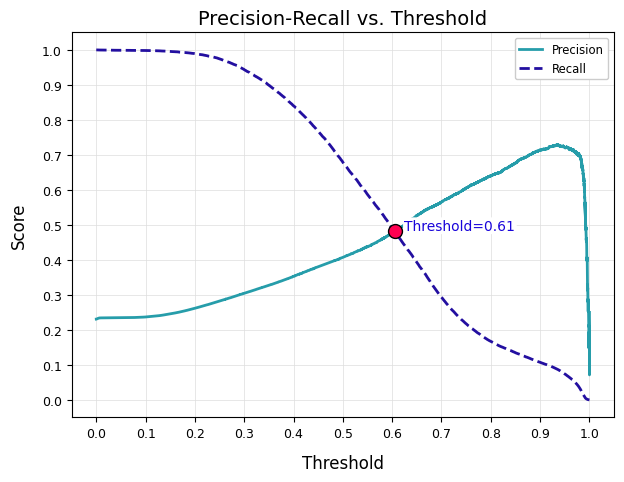

Best Threshold for equal Precision and Recall: 0.61


In [7]:
# ---------------------- MODEL LOGREG: PR vs. Threshold Curves ---------------------- #
pu.plot_pr_tradeoff(y_val_logreg, y_pred_prob_logreg)

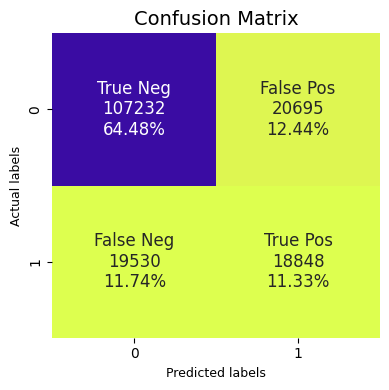

INFO:root:Confusion matrix plotted successfully.


In [9]:
# ---------------------- MODEL LOGREG: Confusion Matrix ----------------- #

pu.plot_confusion_matrix(
    y_val_logreg, y_pred_prob_logreg, threshold = 0.6
    )

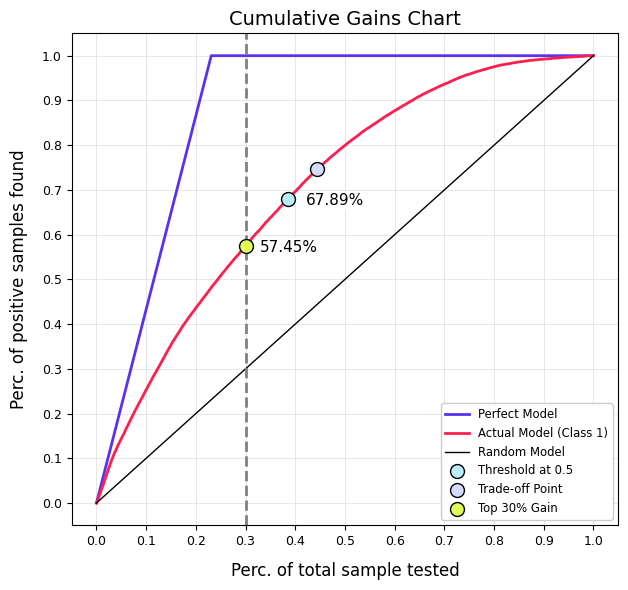

In [10]:
# ---------------------- MODEL LOGREG: Cumulative Gains Charts ---------------------- #

pu.plot_cumulative_gain(
    y_val_logreg, y_pred_prob_logreg, threshold=0.5
    )

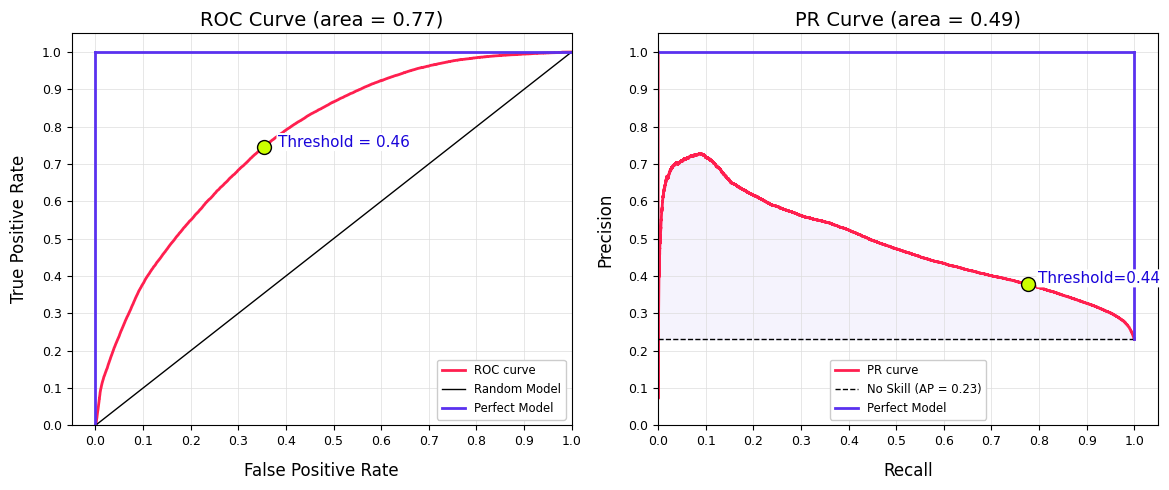

(0.7692289107694019, 0.4871179948356674)

In [11]:
# ---------------------- MODEL LOGREG: ROC & PR-AUC Curves ---------------------- #

pu.plot_roc_and_precision_recall_curves(y_val_logreg, y_pred_prob_logreg)

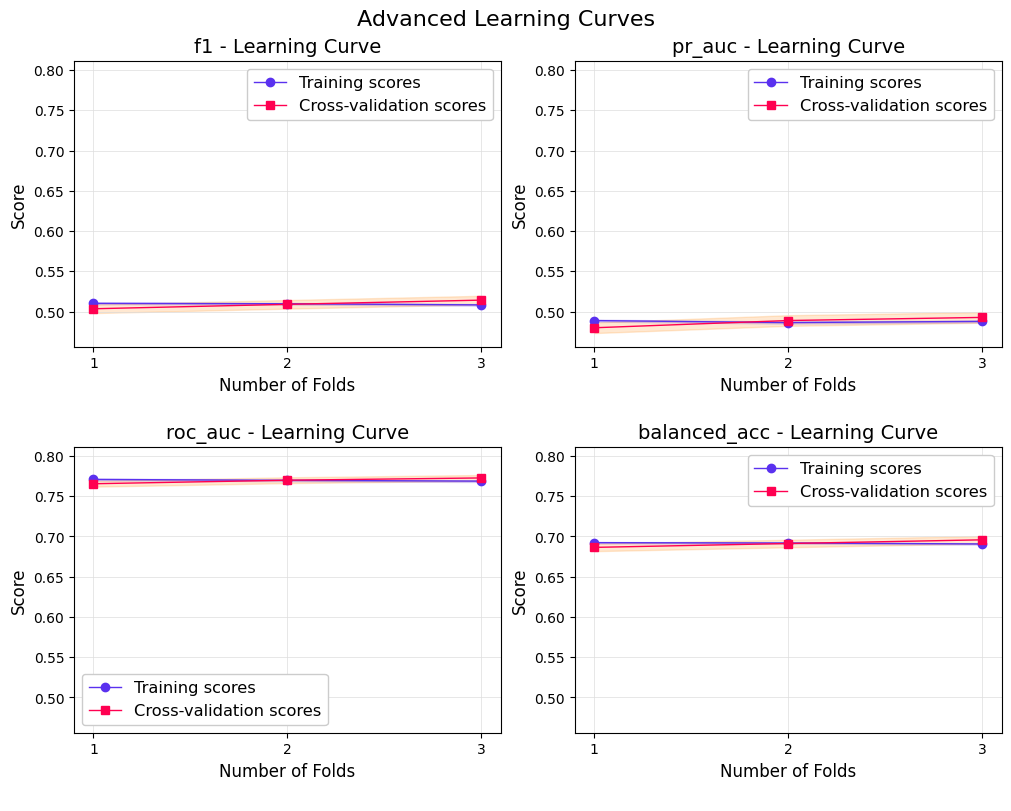

In [12]:
# ---------------------- MODEL LOGREG: Learning Curves ---------------------- #
metrics_to_plot = ['f1', 'pr_auc','roc_auc','balanced_acc']   # precision', 'recall'

# Call the plotting function
pu.plot_advanced_learning_curves(
    train_metrics_df=train_metrics_logreg,        # training metrics for each fold
    val_metrics_df=val_metrics_logreg,            # validation metrics for each fold
    metrics=metrics_to_plot,                      # List of metrics to plot
)

In [13]:
# ---------------------- MODEL LOGREG: INTERACTIVE Learning Curves ---------------------- #

pu.plot_interactive_learning_curves(
    train_metrics_df=train_metrics_logreg,        # training metrics for each fold
    val_metrics_df=val_metrics_logreg,            # validation metrics for each fold
    metrics=metrics_to_plot                       # List of metrics to plot
)

## LGBM
### Feature Selection

In [10]:
# ---------------------- MODEL LGBM: Feature Importances & Selection ---------------------- #

df_selected_lgbm = mu.feature_importances_lgbm(
    df=df_train_cleaned,
    target_column='Target',
    exclude_cols=['Client_id'],
    use_class_weight=True,
    skf=skf,
    threshold_cut= 0.001   # Features with an importance score below this threshold will be excluded.
)

100%|===================| 55225/55435 [03:35<00:00]        

DataFrame before: (166305, 89)
DataFrame after: (166305, 31)


                                      Feature  SHAP_Value  Importance
0                          Counter_number_std      0.6136      0.2095
1                    Consumption_level_2_mean      0.1832      0.0868
2                   Invoice_date_month_median      0.1504      0.0668
3                           Counter_code_mean      0.1216      0.0423
4                         Counter_number_mean      0.0567      0.0342
5                Invoice_date_is_weekday_mean      0.1114      0.0329
6                     Invoice_date_day_median      0.1011      0.0283
7                     Consumption_level_1_sum      0.0852      0.0278
8                            District_60_mean      0.1079      0.0270
9                     Consumption_level_2_std      0.0728      0.0263
10                           District_69_mean      0.1173      0.0260
11                Counter_code_group_200_mean      0.1462      0.0216
12                    Consu

In [11]:
# ---------------------- MODEL LGBM: Sort & get new DF ---------------------- #

sorted_datasets_lgbm = cu.sort_columns(datasets={
    "DF Top_N": df_selected_lgbm,
})

# ---------------------- Update dataframe ---------------------- #
df_train_selected_lgbm = sorted_datasets_lgbm["DF Top_N"]

INFO:root:Shape of DF Top_N: (166305, 31)

DF Top_N - Sorted Features (A to Z):
Client_id
Consumption_level_1_mean
Consumption_level_1_std
Consumption_level_1_sum
Consumption_level_2_mean
Consumption_level_2_std
Consumption_level_2_sum
Consumption_level_3_mean
Consumption_level_3_std
Consumption_level_4_mean
Consumption_level_4_sum
Counter_code_group_200_mean
Counter_code_group_400_mean
Counter_code_mean
Counter_number_mean
Counter_number_median
Counter_number_std
Counter_statue_group_0_mean
Counter_statue_mean
Counter_type_elec_count
Counter_type_elec_mean
Creation_date_is_weekday_mean
District_60_mean
District_62_mean
District_63_mean
District_69_mean
Invoice_date_day_median
Invoice_date_day_std
Invoice_date_is_weekday_mean
Invoice_date_month_median
Target

---------------------------------------------


In [12]:
# ---------------------- MODEL LGBM: Save & Load ----------------- #

## PARQUET
manager.save_df(df_train_selected_lgbm, 'df_train_selected_lgbm', 'Saved_Dataframes', 'parquet')
df_train_selected_lgbm = manager.load_data("df_train_selected_lgbm.parquet", "Saved_Dataframes")

INFO:root:'df_train_selected_lgbm.parquet' saved successfully.
INFO:root:Data types JSON saved successfully at C:\Users\Barba\BT_FraudDetection\Saved_Dataframes\df_train_selected_lgbm_dtypes.json

INFO:root:'df_train_selected_lgbm.parquet' loaded successfully from C:\Users\Barba\BT_FraudDetection\Saved_Dataframes\df_train_selected_lgbm.parquet, 
 -> shape: (166305, 31)



### Hypertuning

In [ ]:
# ---------------------- MODEL LGBM: Hyperparameter Tuning Functions ---------------------- #

# ---------------------- MODEL LGBM: Dynamically adjust the early stopping rounds ---------------------- #

def dynamic_early_stopping_rounds(trial, recent_scores):
    """
    Dynamically adjust the early stopping rounds for a training process based on
    the variability of recent performance improvements.

    This function uses an exponential moving average (EMA) of recent score improvements
    to calculate a standard deviation, which is then used to adjust the number of
    early stopping rounds. The approach aims to make early stopping more responsive
    to changes in training progression, allowing for more rounds when improvements
    are highly variable.

    Parameters:
    - trial (optuna.Trial): The trial object from Optuna, used here for logging.
    - recent_scores (list of float): A list containing the most recent validation scores
      from successive epochs or iterations.

    Returns:
    - int: The dynamically adjusted number of early stopping rounds.

    Raises:
    - ValueError: If recent_scores is not a list or contains non-numeric values.
    - Exception: For unexpected errors, providing a generic error message.

    Usage example:
    early_stopping_rounds = dynamic_early_stopping_rounds(trial, recent_scores)
    model.train(early_stopping_rounds=early_stopping_rounds)
    """
    try:
        if not isinstance(recent_scores, list) or not all(isinstance(score, (int, float)) for score in recent_scores):
            raise ValueError("recent_scores must be a list of numeric values.")

        base_early_stopping = 10  # Default value for early stopping rounds

        if len(recent_scores) > 10:
            #logging.info(f"Trial {trial.number}: Calculating dynamic early stopping rounds based on recent scores.")
            improvements = [recent_scores[i] - recent_scores[i - 1] for i in range(1, len(recent_scores))]
            smoothed_improvements = pd.Series(improvements).ewm(span=5).mean().tolist()
            std_dev = np.std(smoothed_improvements)
            dynamic_rounds = max(int(base_early_stopping + std_dev * 10), base_early_stopping)
            #logging.info(f"Trial {trial.number}: Dynamic early stopping rounds set to {dynamic_rounds}.")

            return dynamic_rounds
        else:
            #logging.info(f"Trial {trial.number}: Insufficient data for dynamic adjustment. Using default {base_early_stopping} rounds.")
            return base_early_stopping
    except ValueError as ve:
        logging.error(f"Input error: {ve}")
        raise
    except Exception as e:
        logging.error("An unexpected error occurred while adjusting early stopping rounds: {}".format(e))
        raise Exception("Failed to adjust early stopping rounds due to an unexpected error.") from e

# ---------------------- MODEL LGBM: Optuna optimization function ---------------------- #

# Custom logging function that does nothing
def silent_log(*args, **kwargs):
    pass

# ---------------------- MODEL LGBM: Optuna optimization function ---------------------- #

def lgbm_objective(trial, X, y,
                   params_space, skf,
                   metric=None, 
                   use_scale_pos_weight=False, 
                   smote_sampling_strategy=None):
    """
    Objective function to optimize LGBM parameters using Optuna.

    Parameters:
    - trial: An Optuna trial object.
    - X: DataFrame containing features.
    - y: Series containing target variable.
    - params_space: Dictionary of search spaces for parameters 
    - skf: StratifiedKFold object for splitting the dataset.
    - metric: Metric to optimize ('f1', 'balanced_acc', 'roc_auc', 'pr_auc', 'recall').
    - use_scale_pos_weight (bool): Whether to use scale pos weight.
    - smote_sampling_strategy (float): Fraction for SMOTE sampling strategy (between 0 and 1).

    Returns:
    - Average score of the optimization metric across all folds.
    """
    try:
        param_grid = {
            'objective': 'binary',
            'metric': 'aucpr',  # This could also be dynamic based on params_space if needed
            'verbosity': -1,  # Set verbosity to 0 to suppress LightGBM's output
        }

        # Dynamically add parameters from params_space
        param_keys = ['learning_rate', 'n_estimators', 'num_leaves', 'max_depth',
                        'min_data_in_leaf', 'min_child_weight', 'bagging_fraction', 'feature_fraction',
                        'lambda_l1', 'lambda_l2', 'bagging_freq','min_gain_to_split'
                        ]
        
        # Log if there are extra parameters not expected
        extra_params = set(params_space.keys()) - set(param_keys)
        if extra_params:
            logging.warning(f"Extra parameters that aren't used in the model: {extra_params}")

        # Check and add only the parameters that are expected and provided
        for key in param_keys:
            if key in params_space:
                if isinstance(params_space[key], tuple) and len(params_space[key]) == 2:
                    if key in ['learning_rate', 'bagging_fraction', 'min_child_weight', 'feature_fraction','lambda_l1', 'lambda_l2']:
                        param_grid[key] = trial.suggest_float(key, *params_space[key])
                    elif key in ['alpha']:
                        param_grid[key] = trial.suggest_loguniform(key, params_space[key])
                    else:
                        param_grid[key] = trial.suggest_int(key, *params_space[key])
            #else:
                #logging.info(f"Parameter '{key}' not provided in params_space and will be skipped.")


        # Initialize the list to store scores for each fold
        recent_scores = []

        # Start Cross Validation
        for train_idx, val_idx in skf.split(X, y):
            X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
            y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

            # Handle class imbalance with SMOTE if requested
            if smote_sampling_strategy and 0 < smote_sampling_strategy < 1:
                smote = SMOTE(random_state=42, sampling_strategy=smote_sampling_strategy)
                X_train, y_train = smote.fit_resample(X_train, y_train)
            
            # Make a copy of param_grid to modify
            param_grid_copy = param_grid.copy()   

            # Dynamic scale_pos_weight adjustment
            if use_scale_pos_weight:
                num_negative = np.sum(y_train == 0)
                num_positive = np.sum(y_train == 1)
                scale_pos_weight_value = num_negative / num_positive
                param_grid_copy['scale_pos_weight'] = trial.suggest_float('scale_pos_weight', scale_pos_weight_value * 0.5, scale_pos_weight_value * 2)

            # Fit the LightGBM model
            early_stopping_callback = lgb.early_stopping(stopping_rounds=dynamic_early_stopping_rounds(trial, recent_scores), verbose=False)
            custom_logger = lgb.log_evaluation(0)  # Disable log output

            # Fit LGBM for feature selection with the early stopping callback
            dtrain = lgb.Dataset(X_train, label=y_train)
            dval = lgb.Dataset(X_val, label=y_val)
            
            model = lgb.train(
                param_grid_copy,
                dtrain,
                valid_sets=[dval],
                valid_names=['validation'],
                callbacks=[early_stopping_callback, custom_logger],
                feval=mu.lgbm_custom_eval(metric),
            )
            
            # Generate predictions and probabilities using best iteration
            y_pred_prob = model.predict(X_val, num_iteration=model.best_iteration)
            # For binary classification, use threshold to classify as 0 or 1
            y_pred = (y_pred_prob > 0.5).astype(int) 

            # Evaluate the model
            score = mu.calculate_metric(y_val, y_pred, y_pred_prob, metric)
            recent_scores.append(score)

        # End Cross Validation
        average_score = np.mean(recent_scores)

        return average_score
    
    except lgb.basic.LightGBMError as e:
        logging.error(f"LightGBM training error: {e}")
        raise
    except Exception as e:
        logging.error(f"Unhandled exception: {e}")
        raise

# ---------------------- MODEL LGBM: Hyperparameter tuning using Optuna ---------------------- #

def hyperparameter_tuning_lgbm(df, target_column=None, exclude_cols=None,
                               params=None, skf=None, 
                              n_trials=None, metric=None, 
                              threshold=0.97, 
                              n_trials_no_improve=25, 
                              use_scale_pos_weight=False, 
                              smote_sampling_strategy=None):
    """
    Hyperparameter Tuning for LGBM Model Using Optuna
    ==========================================================

    This function configures and executes a hyperparameter search using Optuna to find the optimal 
    settings for a LGBM model based on a specified performance metric. It supports 
    handling class imbalances with optional SMOTE and class weighting, and it uses StratifiedKFold 
    for cross-validation to ensure the dataset's distribution is respected.

    Sections:
    ---------
    - Overview
    - Parameters
    - Returns
    - Raises
    - Usage
    - Notes

    Overview
    --------
    The function performs hyperparameter tuning for a LGBM model by utilizing the Optuna
    optimization framework to systematically explore a range of parameter configurations. It integrates
    several advanced techniques such as class weight adjustment and SMOTE for managing class imbalance,
    and utilizes cross-validation to ensure robust evaluation of model performance.

    Parameters
    ----------
    - df (pd.DataFrame): The complete dataset containing both features and the target variable.
    - target_column (str, optional): Name of the target variable column in the dataframe.
    - exclude_cols (list, optional): List of column names to exclude from the feature set.
    - params (dict): A dictionary defining the search space for logistic regression parameters.
                     Each entry should define a range or list of options that Optuna will explore.
    - skf (StratifiedKFold, optional): A StratifiedKFold instance for cross-validation. If None,
                                       the function requires an externally provided StratifiedKFold instance.
    - n_trials (int, optional): The number of trials that Optuna will perform. Each trial tests a 
                                different combination of parameters.
    - metric (str, optional): The performance metric to optimize. Valid options include 'f1', 'balanced_acc',
                              'roc_auc', 'pr_auc', 'recall'. The choice of metric influences how the 
                              model's performance is evaluated.
    - threshold (float, optional): A performance threshold for early stopping. If a trial achieves 
                                   a performance above this threshold, the search can optionally be 
                                   halted early.
    - n_trials_no_improve (int, optional): The number of consecutive trials without improvement in 
                                           performance to tolerate before stopping early. Helps in 
                                           limiting resource waste.
    - use_scale_pos_weight (bool, optional): Flag to determine whether to adjust class weights inversely 
                                         proportional to class frequencies.
    - smote_sampling_strategy (float, optional): Specifies the desired ratio of the number of samples 
                                                 in the minority class over the majority class after 
                                                 resampling with SMOTE. Must be between 0 and 1.

    Returns
    -------
    - best_params (dict): Dictionary of the best parameters found during the optimization.

    Raises
    ------
    - ValueError: If 'df' is not a pandas DataFrame, or other parameters are not in the expected format.
    - RuntimeError: If the function encounters an issue during the optimization process.

    Usage
    -----
    >>> best_params = hyperparameter_tuning_lgbm(df=data, target_column='outcome', params=params_dict,
                                                   skf=StratifiedKFold(n_splits=5), n_trials=100,
                                                   metric='roc_auc', use_scale_pos_weight=True)

    Notes
    -----
    - The function relies heavily on the configuration provided via 'params' and 'skf'. Incorrect
      configuration may lead to suboptimal tuning results or runtime errors.
    - It is assumed that the data passed to the function does not contain any missing values in 
      the features or target columns.
    """
    if skf is None or params is None:
        logging.error("StratifiedKFold (skf) or parameters (params) not provided. Please pass valid instances.")
        return None
    
    # Call the function to validate input DataFrame and prepare the data for model training
    X, _ = cu.validate_and_prepare(df, target_column, exclude_cols)
    y = df[target_column] 

    logging.info("Starting hyperparameter tuning for LGBM model...")

    trials_without_improvement = 0
    best_score = float('-inf')

    def early_stopping_callback(study, trial):
        nonlocal best_score, trials_without_improvement

        # Update the best score and reset trials counter if improvement is seen
        if trial.value > best_score:
            best_score = trial.value
            trials_without_improvement = 0
        else:
            trials_without_improvement += 1

        # Stop if the best score surpasses the hard threshold (if threshold is set)
        if threshold is not None and best_score >= threshold:
            study.stop()
            #print("Stopping early as the performance threshold is achieved.")

        # Stop if no improvement is observed for a specified number of trials (if n_trials_no_improve is set)
        if n_trials_no_improve is not None and trials_without_improvement >= n_trials_no_improve:
            study.stop()
            print("Stopping early due to no improvement in the specified number of trials.")

        # Optionally, handle the case where performance falls below an adaptive threshold
        # Allowing a 20% decrease for continued exploration
        adaptive_threshold = best_score * 0.80  
        if trial.value < adaptive_threshold:
            study.stop()
            #print("Stopping early as performance fell below the adaptive threshold.")

    try:
        # Sampler
        sampler = TPESampler(seed=42)
        #sampler = CmaEsSampler(seed=42)

        # HyperbandPruner
        #pruner = HyperbandPruner(min_resource=30, max_resource=300, reduction_factor=3)

        # MedianPruner
        #pruner = MedianPruner(n_startup_trials= 10, n_warmup_steps= 10, interval_steps=5)

        # Configuring underlying pruner and the patient pruner
        underlying_pruner = MedianPruner(n_startup_trials=10, n_warmup_steps=30, interval_steps=5)
        pruner = PatientPruner(underlying_pruner, patience=10)

        study = optuna.create_study(direction="maximize",sampler=sampler, pruner=pruner)

        study.optimize(lambda trial: lgbm_objective(trial, X, y, params, skf, metric, 
                                                   use_scale_pos_weight, smote_sampling_strategy), 
                                                   n_trials=n_trials, callbacks=[early_stopping_callback], 
                                                   n_jobs=-1  #` uses all available cores
                                                   )   
        best_params = study.best_params

        print("\nBest Parameters for LGBM:")
        for key, value in best_params.items():
            print(f"{key}: {value}")

        logging.info("Hyperparameter tuning completed. Best parameters: %s", best_params)
        return best_params

    except Exception as e:
        logging.error(f"Error in hyperparameter tuning: {e}")
        raise

# ---------------------- MODEL LGBM: Hyperparameter Tuning Functions ---------------------- #

params_lgbm = {
    'learning_rate': (0.01, 0.05),
    'n_estimators': (100, 1000),
    'num_leaves': (20, 200),
    'max_depth': (0, 10),
    'min_data_in_leaf': (20, 60),
    #'min_child_weight': (0.001, 0.1),
    'bagging_fraction': (0.7, 1.0),
    'feature_fraction': (0.7, 1.0),
    #'lambda_l1': (0.01, 10),
    #'lambda_l2': (0.01, 10)
}     

best_params_lgbm = hyperparameter_tuning_lgbm(
            df=df_train_selected,
            target_column='Target', 
            exclude_cols=['Client_id'],
            params=params_lgbm,
            skf=skf,
            n_trials=50,
            metric='pr_auc',
            use_scale_pos_weight=True
        )

### Training & Cross Validation

In [47]:
# ---------------------- MODEL LGBM: Trains model with hyperparamters ---------------------- #

def train_model_lgbm(train_data, val_data,hyperparams, metric):
    """
    Trains a LightGBM model with the given hyperparameters.

    Parameters:
    - train_data (DataFrame):training data (features and target).
    - val_data (Series): validation data (features and target)
    - hyperparams (dict): Hyperparameters for the LightGBM model.
    - metric (str): The metric to calculate ('f1', 'roc_auc', 'balanced_acc', 'recall', 'pr_auc')

    Returns:
    - model: The trained LightGBM model.
    """
    # Define default hyperparameters
    default_hyperparams = {
        'verbosity': -1,
        'objective': 'binary',
        'metric': 'aucpr',
    }
    # Validate and merge hyperparameters
    if hyperparams is not None:
        if not isinstance(hyperparams, dict):
            raise TypeError("Hyperparameters must be a dictionary.")
        # Merge user-specified hyperparams with defaults, user-specified taking precedence
        hyperparams = {**default_hyperparams, **hyperparams}
    else:
        hyperparams = default_hyperparams.copy()
    
    try:   
        # Train the LightGBM model
        with open(os.devnull, 'w') as f, contextlib.redirect_stdout(f):

            # Configure callbacks including early stopping
            callbacks = [
                lgb.early_stopping(stopping_rounds=100, verbose=False),
                lgb.log_evaluation(period=0)  # Adjust period or remove as needed
            ]

            # log_evaluation_callback = lgb.log_evaluation(period=0)  # Set to 0 to disable the log

            model = lgb.train(
                params=hyperparams,
                train_set=train_data,
                num_boost_round=hyperparams.get('n_estimators', 100),
                feval = mu.lgbm_custom_eval(metric),
                valid_sets=[train_data, val_data],
                valid_names=['training', 'validation'],
                callbacks=callbacks,
            )

        return model
    except Exception as e:
        logging.error(f"Error in model training: {e}")
        return None

# ---------------------- MODEL LGBM: Performs training and evaluation for one fold in cross-validation ---------------------- #

def perform_fold_lgbm(X_train, y_train, 
                      X_val, y_val, 
                      hyperparams, fold_number, metric=None, 
                      smote_sampling_strategy=None):
    """
    Performs training and evaluation for one fold in cross-validation directly using data frames.
    
    This function handles the training and evaluation for a single fold in the cross-validation process.
    It trains the model using the provided training data and hyperparameters and evaluates it on both
    the training and validation sets. It returns the performance metrics for both training and validation.
    
    Parameters:
    - X_train (DataFrame): Training features DataFrame.
    - y_train (Series): Training target variable Series.
    - X_val (DataFrame): Validation features DataFrame.
    - y_val (Series): Validation target variable Series.
    - hyperparams (dict): Hyperparameters for the Logistic Regression model.
    - fold_number (int): The fold number being processed (for logging and tracking purposes).
    - metric (str): The metric to calculate ('f1', 'roc_auc', 'balanced_acc', 'recall', 'pr_auc')
    - smote_sampling_strategy (float): Fraction for SMOTE sampling strategy (between 0 and 1).
    
    Returns:
    - tuple: A tuple containing two dictionaries (train_metrics, val_metrics), where each dictionary
             includes various performance metrics such as precision, recall, F1 score, AUC-ROC, etc.
    
    Raises:
    - RuntimeError: If the model training fails.
    - Exception: Captures and logs any other exceptions that occur during fold execution.
    """
    try:
        logging.info(f"Starting with fold {fold_number}:")
        logging.info(f"Class distribution in training set (Fold {fold_number}): {y_train.value_counts()}")

        # Handle class imbalance with SMOTE if requested
        if smote_sampling_strategy and 0 < smote_sampling_strategy < 1:
            smote = SMOTE(random_state=42, sampling_strategy=smote_sampling_strategy)
            X_train, y_train = smote.fit_resample(X_train, y_train)
            logging.info(f"SMOTE applied with strategy {smote_sampling_strategy} on fold {fold_number}.")

        # Prepare data for LGBM
        train_data = lgb.Dataset(X_train, label=y_train)
        val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

        # Model Training
        model = train_model_lgbm(train_data, val_data, hyperparams, metric) 
        if model is None:
            logging.error("Model training failed for fold {fold_number}")
            return None, None

        # LGBM: Generate predictions and probabilities for evaluation
        # Generate predictions using raw data
        y_train_pred_prob = model.predict(X_train)
        y_val_pred_prob = model.predict(X_val)  # Corrected: Use raw validation data for predictions

        # Change the threshold
        y_train_pred = (y_train_pred_prob >= 0.5).astype(int)
        y_val_pred = (y_val_pred_prob >= 0.5).astype(int)

        # After training and evaluation, log the validation predicted probabilities
        logging.info(f"Validation predicted probabilities for fold {fold_number}: {y_val_pred_prob[:5]}")
        logging.info(f"Fold {fold_number} training completed.\n")
        
        return (y_train, y_train_pred, y_train_pred_prob), (y_val, y_val_pred, y_val_pred_prob)
    
    except Exception as e:
        # Print any exceptions that occur during fold execution
        logging.error(f"Error in fold execution: {e}")
        # Return None to indicate failure in processing this fold
        return None, None, None, None

# ---------------------- MODEL LGBM: Main Training and Evaluation Function ---------------------- #
    
def train_evaluate_lgbm_cv(df, skf=None, 
                           target_column=None, exclude_cols=None,
                           hyperparams=None,  
                           metric=None, 
                           smote_sampling_strategy=None):
    """
    Trains and evaluates a LightGBM model using cross-validation. Main function that orchestrates the entire cross-validation process. 
    It sets up the cross-validation (with n_splits), prepares the data, and then calls perform_fold for each fold. 
    It collects the results from all folds, computes the average metrics across all folds, and returns these aggregated metrics.

    Parameters:
    - df (DataFrame): The complete dataset.
    - skf (StratifiedKFold): Stratified K-Folds cross-validator.
    - target_column (str): Name of the target column.
    - hyperparams (dict, optional): Hyperparameters for the LightGBM model.
    - exclude_cols (list, optional): List of columns to exclude from features.
    - verbose (bool, optional): Flag to control logging verbosity.
    - metric (str): The metric to calculate ('f1', 'roc_auc', 'balanced_acc', 'recall', 'pr_auc').
    - smote_sampling_strategy (float): Fraction for SMOTE sampling strategy (between 0 and 1).

    Returns:
    - A tuple containing:
      - avg_metrics_across_folds (dict): Averaged evaluation metrics across all folds.
      - std_metrics_across_folds (dict): Standard deviation of evaluation metrics across all folds.
      - all_y_val (list): Concatenated list of all validation target values from each fold.
      - all_y_pred_prob (list): Concatenated list of all model prediction probabilities for the validation data from each fold.
    """
    if skf is None or hyperparams is None:
        logging.error("StratifiedKFold (skf) or parameters (params) not provided. Please pass valid instances.")
        return None

    # Check if hyperparams are provided and valid
    logging.info(f"Received hyperparams: {hyperparams}\n")

    # Call the function to validate input DataFrame and prepare the data for model training
    X, _ = cu.validate_and_prepare(df, target_column, exclude_cols)
    y = df[target_column]  # Assumes y is already numeric and suitable for stratification

    # Initialize
    all_train_results = []
    all_val_results = []
    all_y_val = []
    all_y_pred_prob = []

    # Start Cross Validation
    for fold_number, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

        # Ensure the fold is processed correctly (implement within perform_fold_lgbm)
        fold_train_result, fold_val_result = perform_fold_lgbm(
                X_train, y_train, 
                X_val, y_val_fold, 
                hyperparams.copy(), 
                fold_number,
                metric, 
                smote_sampling_strategy)

        if fold_train_result and fold_val_result:
            all_train_results.append(fold_train_result)
            all_val_results.append(fold_val_result)
            all_y_val.extend(y_val_fold)  # Aggregating true validation labels
            all_y_pred_prob.extend(fold_val_result[2])  # Aggregating validation prediction probabilities

    # After the cross-validation loop, log the aggregated validation predicted probabilities
    logging.info(f"AGGREGATED validation predicted probabilities: {all_y_pred_prob[:5]}")
    logging.info("Cross Validation completed.")

    # Evaluate all folds together
    avg_metrics_across_folds, std_metrics_across_folds, train_metrics_df, val_metrics_df = mu.evaluate_model(all_train_results, all_val_results)  
    # avg_metrics_across_folds, std_metrics_across_folds,
    return avg_metrics_across_folds, all_y_val, all_y_pred_prob, train_metrics_df, val_metrics_df 

# ---------------------- MODEL LGBM: Train & evaluate model  ---------------------- #

# Default hyperparameters
default_params_lgbm = {
    'learning_rate': 0.0249816047538945, 
    'n_estimators': 956, 
    'num_leaves': 79, 
    'max_depth': 7, 
    'min_data_in_leaf': 26, 
    'bagging_fraction': 0.7467983561008608, 
    'feature_fraction': 0.7174250836504598, 
    'scale_pos_weight': 5.997359869632
    }

avg_metrics_lgbm, y_val_lgbm, y_pred_prob_lgbm,train_metrics_lgbm, val_metrics_lgbm = train_evaluate_lgbm_cv(
    df_train_selected,    
    target_column='Target',
    exclude_cols=['Client_id'],
    skf=skf,
    hyperparams= default_params_lgbm,  # default_params_lgbm or best_params_lgbm
    metric='pr_auc'
)

INFO:root:Received hyperparams: {'learning_rate': 0.0249816047538945, 'n_estimators': 956, 'num_leaves': 79, 'max_depth': 7, 'min_data_in_leaf': 26, 'bagging_fraction': 0.7467983561008608, 'feature_fraction': 0.7174250836504598, 'scale_pos_weight': 5.997359869632}

INFO:root:Starting with fold 1:
INFO:root:Class distribution in training set (Fold 1): Target
0    85284
1    25586
Name: count, dtype: int64
INFO:root:Validation predicted probabilities for fold 1: [0.04801782 0.03205182 0.55459771 0.03176994 0.00348978]
INFO:root:Fold 1 training completed.

INFO:root:Starting with fold 2:
INFO:root:Class distribution in training set (Fold 2): Target
0    85285
1    25585
Name: count, dtype: int64
INFO:root:Validation predicted probabilities for fold 2: [0.04242814 0.80378927 0.61622397 0.01716184 0.11212318]
INFO:root:Fold 2 training completed.

INFO:root:Starting with fold 3:
INFO:root:Class distribution in training set (Fold 3): Target
0    85285
1    25585
Name: count, dtype: int64
INFO

### Plots

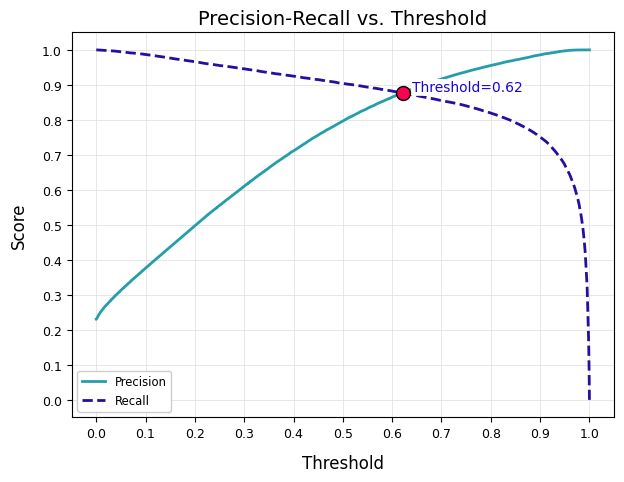

Best Threshold for equal Precision and Recall: 0.62


In [15]:
# ---------------------- MODEL LGBM: PR vs. Threshold Curves ---------------------- #
pu.plot_pr_tradeoff(y_val_lgbm, y_pred_prob_lgbm)

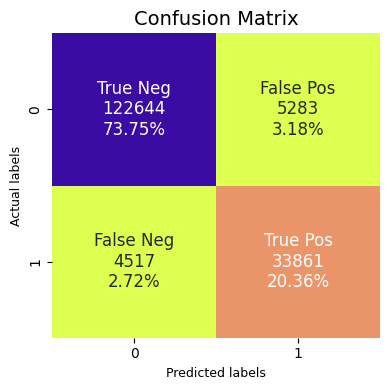

INFO:root:Confusion matrix plotted successfully.


In [17]:
# ---------------------- MODEL LGBM: Confusion Matrix ----------------- #

pu.plot_confusion_matrix(
    y_val_lgbm, y_pred_prob_lgbm, threshold = 0.6
                      )

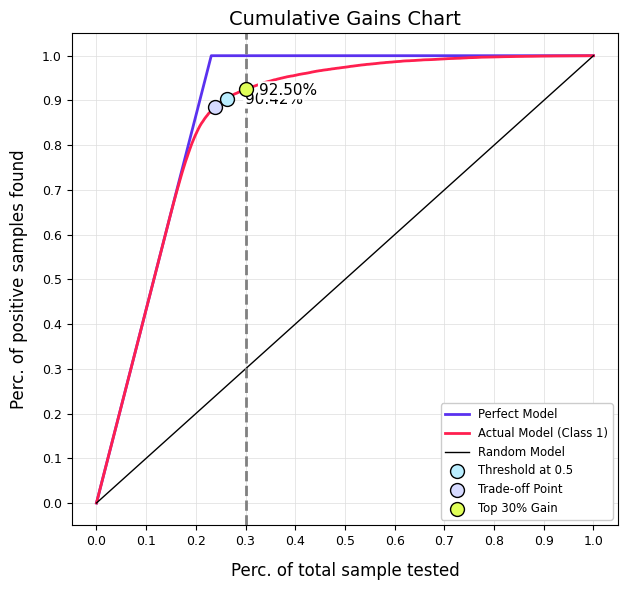

In [18]:
# ---------------------- MODEL LGBM: Cumulative Gains Charts ---------------------- #
pu.plot_cumulative_gain(
    y_val_lgbm, y_pred_prob_lgbm,threshold=0.5
    )

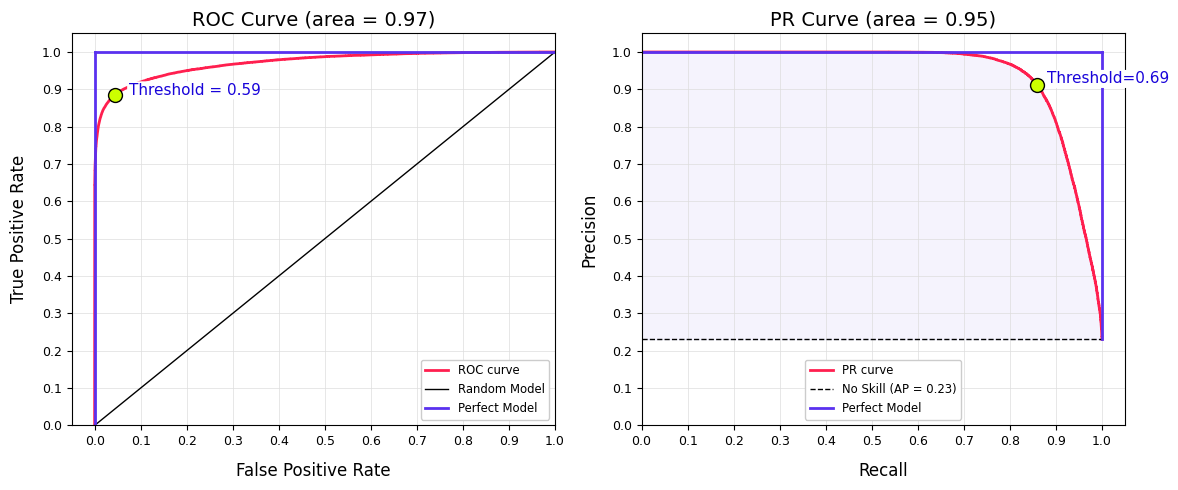

(0.9707760675684645, 0.9469481251818391)

In [19]:
# ---------------------- MODEL LGBM: ROC & PR-AUC Curves ---------------------- #

pu.plot_roc_and_precision_recall_curves(y_val_lgbm, y_pred_prob_lgbm)

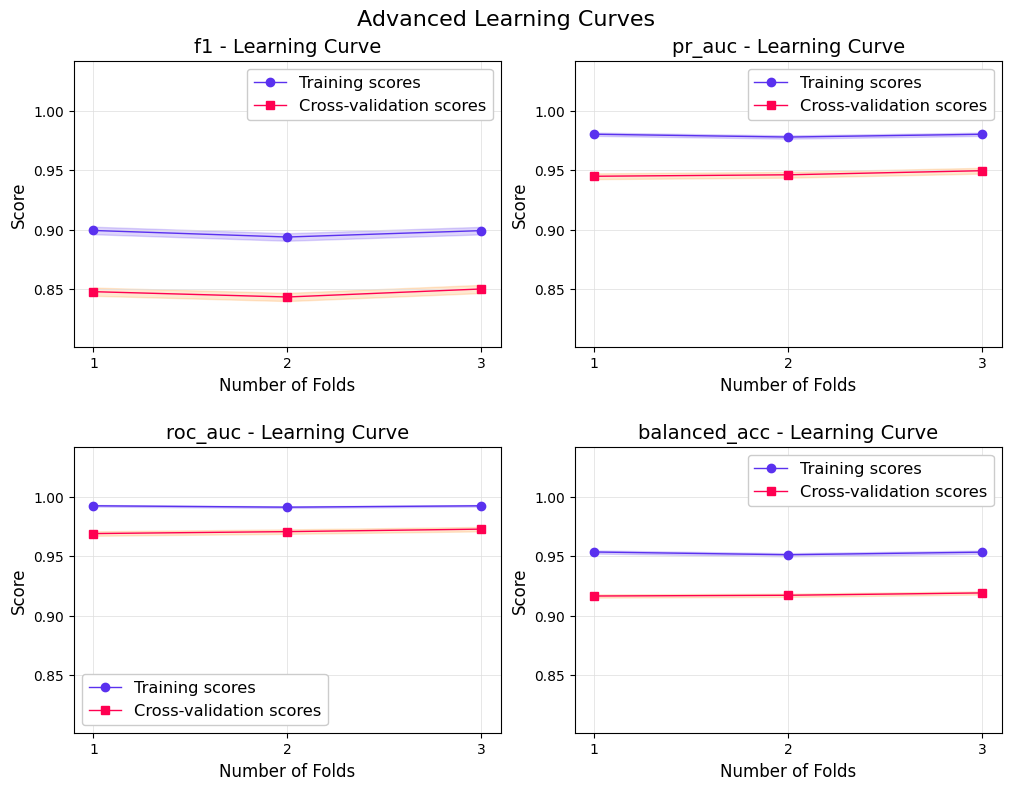

In [20]:
# ---------------------- MODEL LGBM: Learning Curves ---------------------- #
metrics_to_plot = ['f1', 'pr_auc','roc_auc','balanced_acc']   # precision', 'f1', 'recall'

# Call the plotting function
pu.plot_advanced_learning_curves(
    train_metrics_lgbm,             # Original DataFrame with training metrics for each fold
    val_metrics_lgbm,               # Original DataFrame with validation metrics for each fold
    metrics=metrics_to_plot         # List of metrics to plot
)

In [21]:
# ---------------------- MODEL LGBM: INTERACTIVE Learning Curves ---------------------- #

pu.plot_interactive_learning_curves(
    train_metrics_df=train_metrics_lgbm,        # training metrics for each fold
    val_metrics_df=val_metrics_lgbm,            # validation metrics for each fold
    metrics=metrics_to_plot                       # List of metrics to plot
)

## XGBoost
### Feature Selection

In [22]:
# ---------------------- MODEL XGBoost: Feature Importances & Selection ---------------------- #

df_train_selected_xgb = mu.feature_importances_xgb(
    df=df_train_cleaned,
    target_column='Target',
    exclude_cols=['Client_id'],
    use_class_weight=True,
    skf=skf,
    threshold_cut= 0.001       # Features with an importance score below this threshold will be excluded.
)

100%|===================| 55275/55435 [05:21<00:00]        

DataFrame before: (166305, 89)
DataFrame after: (166305, 44)


                                      Feature  SHAP_Value  Importance
0                          Counter_number_std    0.681703    0.092837
1                     Consumption_level_3_std    0.076582    0.092677
2                 Counter_code_group_200_mean    0.208652    0.063422
3                            District_60_mean    0.169111    0.053494
4                     Consumption_level_2_sum    0.288444    0.050342
5                   Invoice_date_month_median    0.344082    0.049480
6                            District_69_mean    0.144814    0.047253
7                 Counter_statue_group_0_mean    0.232742    0.039938
8               Creation_date_is_weekday_mean    0.037713    0.026731
9                 Counter_code_group_400_mean    0.072211    0.024777
10               Invoice_date_is_weekday_mean    0.233187    0.022928
11                      Counter_type_gaz_mean    0.317372    0.018769
12                         

In [23]:
# ---------------------- MODEL XGBoost: Sort & get new DF ---------------------- #

sorted_datasets_xgb = cu.sort_columns(datasets={
    "DF Top_N": df_train_selected_xgb
})

# ---------------------- Update dataframe ---------------------- #
df_train_selected_xgb = sorted_datasets_xgb["DF Top_N"]

INFO:root:Shape of DF Top_N: (166305, 44)

DF Top_N - Sorted Features (A to Z):
Client_catg_11_mean
Client_catg_12_mean
Client_catg_51_mean
Client_id
Consumption_level_1_mean
Consumption_level_1_std
Consumption_level_1_std_missing_indicator
Consumption_level_1_sum
Consumption_level_2_mean
Consumption_level_2_std
Consumption_level_2_sum
Consumption_level_3_mean
Consumption_level_3_std
Consumption_level_3_sum
Consumption_level_4_mean
Consumption_level_4_std
Consumption_level_4_sum
Counter_code_group_200_mean
Counter_code_group_400_mean
Counter_code_group_500_mean
Counter_code_mean
Counter_number_mean
Counter_number_median
Counter_number_std
Counter_statue_group_0_mean
Counter_statue_group_1_mean
Counter_statue_mean
Counter_statue_median
Counter_type_elec_count
Counter_type_elec_mean
Counter_type_gaz_mean
Creation_date_is_weekday_mean
District_60_mean
District_62_mean
District_63_mean
District_69_mean
Invoice_date_day_mean
Invoice_date_day_median
Invoice_date_day_std
Invoice_date_is_weekd

In [24]:
# ---------------------- MODEL XGBoost: Save & Load ----------------- #

## PARQUET
manager.save_df(df_train_selected_xgb, 'df_train_selected_xgb', 'Saved_Dataframes', 'parquet')
df_train_selected_xgb = manager.load_data("df_train_selected_xgb.parquet", "Saved_Dataframes")

INFO:root:'df_train_selected_xgb.parquet' saved successfully.
INFO:root:Data types JSON saved successfully at C:\Users\Barba\BT_FraudDetection\Saved_Dataframes\df_train_selected_xgb_dtypes.json

INFO:root:'df_train_selected_xgb.parquet' loaded successfully from C:\Users\Barba\BT_FraudDetection\Saved_Dataframes\df_train_selected_xgb.parquet, 
 -> shape: (166305, 44)



### Hypertuning

In [ ]:
# ---------------------- MODEL XGBoost: Hyperparameter Tuning Functions ---------------------- # 

# ---------------------- MODEL XGBoost: Dynamically adjust the early stopping rounds ---------------------- #

def dynamic_early_stopping_rounds(trial, recent_scores):
    """
    Dynamically adjust the early stopping rounds for a training process based on
    the variability of recent performance improvements.

    This function uses an exponential moving average (EMA) of recent score improvements
    to calculate a standard deviation, which is then used to adjust the number of
    early stopping rounds. The approach aims to make early stopping more responsive
    to changes in training progression, allowing for more rounds when improvements
    are highly variable.

    Parameters:
    - trial (optuna.Trial): The trial object from Optuna, used here for logging.
    - recent_scores (list of float): A list containing the most recent validation scores
      from successive epochs or iterations.

    Returns:
    - int: The dynamically adjusted number of early stopping rounds.

    Raises:
    - ValueError: If recent_scores is not a list or contains non-numeric values.
    - Exception: For unexpected errors, providing a generic error message.

    Usage example:
    early_stopping_rounds = dynamic_early_stopping_rounds(trial, recent_scores)
    model.train(early_stopping_rounds=early_stopping_rounds)
    """
    try:
        if not isinstance(recent_scores, list) or not all(isinstance(score, (int, float)) for score in recent_scores):
            raise ValueError("recent_scores must be a list of numeric values.")

        base_early_stopping = 10  # Default value for early stopping rounds

        if len(recent_scores) > 10:
            #logging.info(f"Trial {trial.number}: Calculating dynamic early stopping rounds based on recent scores.")
            improvements = [recent_scores[i] - recent_scores[i - 1] for i in range(1, len(recent_scores))]
            smoothed_improvements = pd.Series(improvements).ewm(span=5).mean().tolist()
            std_dev = np.std(smoothed_improvements)
            dynamic_rounds = max(int(base_early_stopping + std_dev * 10), base_early_stopping)
            #logging.info(f"Trial {trial.number}: Dynamic early stopping rounds set to {dynamic_rounds}.")
            return dynamic_rounds
        #else:
         #   logging.info(f"Trial {trial.number}: Insufficient data for dynamic adjustment. Using default {base_early_stopping} rounds.")

            return base_early_stopping
    except ValueError as ve:
        logging.error(f"Input error: {ve}")
        raise
    except Exception as e:
        logging.error("An unexpected error occurred while adjusting early stopping rounds: {}".format(e))
        raise Exception("Failed to adjust early stopping rounds due to an unexpected error.") from e


# ---------------------- MODEL XGBoost: Optuna optimization function ---------------------- #

def xgb_objective(trial, X, y,
                  params_space, skf,
                  metric=None, 
                  use_scale_pos_weight=False, 
                  smote_sampling_strategy=None):
    """
    Objective function to optimize XGBoost parameters using Optuna.

    Parameters:
    - trial: An Optuna trial object.
    - X: DataFrame containing features.
    - y: Series containing target variable.
    - params_space: Dictionary of search spaces for parameters 
    - skf (StratifiedKFold): Stratified K-Folds cross-validator
    - metric: Metric to optimize ('f1', 'balanced_acc', 'roc_auc', 'pr_auc', 'recall').
    - use_scale_pos_weight (bool): Whether to use scale pos weight.
    - smote_sampling_strategy (float): Fraction for SMOTE sampling strategy (between 0 and 1).

    Returns:
    - Average score of the optimization metric across all folds.
    """
    try:
        param_grid = {
            'objective': 'binary:logistic',
            'metric': 'aucpr',  # This could also be dynamic based on params_space if needed
            'verbosity': 0, 
        }

        # Dynamically add parameters from params_space
        param_keys = ['learning_rate', 'n_estimators', 'max_depth', 'subsample', 
                      'colsample_bytree', 'colsample_bylevel','colsample_bynode', 
                      'lambda', 'min_child_weight', 'alpha'
                        ]
        
        # Log if there are extra parameters not expected
        extra_params = set(params_space.keys()) - set(param_keys)
        #if extra_params:
            #logging.warning(f"Extra parameters that aren't used in the model: {extra_params}")
   
        # Check and add only the parameters that are expected and provided
        for key in param_keys:
            if key in params_space:
                if isinstance(params_space[key], tuple) and len(params_space[key]) == 2:
                    param_type = 'float' if  key in ['learning_rate', 'subsample', 'min_child_weight', 'colsample_bytree', 'colsample_bylevel', 
                                                     'colsample_bynode', 'lambda', 'alpha'] else 'int'
                    if param_type == 'float':
                        param_grid[key] = trial.suggest_float(key, *params_space[key])
                    elif param_type == 'int':
                        param_grid[key] = trial.suggest_int(key, *params_space[key])
            # else:
            #     logging.info(f"Parameter '{key}' not provided in params_space and will be skipped.")

        # Initialize the list to store scores for each fold
        recent_scores = []
        local_evals_results = []  # Temporary storage for this trial's results

        # Start Cross Validation
        for train_idx, val_idx in skf.split(X, y):
            X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
            y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

            # Handle class imbalance with SMOTE if requested
            if smote_sampling_strategy and 0 < smote_sampling_strategy < 1:
                smote = SMOTE(random_state=42, sampling_strategy=smote_sampling_strategy)
                X_train, y_train = smote.fit_resample(X_train, y_train)
            
            # Make a copy of param_grid to modify
            param_grid_copy = param_grid.copy()   

            # Dynamic scale_pos_weight adjustment
            if use_scale_pos_weight:
                num_negative = np.sum(y_train == 0)
                num_positive = np.sum(y_train == 1)
                scale_pos_weight_value = num_negative / num_positive
                param_grid_copy['scale_pos_weight'] = trial.suggest_float('scale_pos_weight', 
                                                                          scale_pos_weight_value*0.4, scale_pos_weight_value * 2
                )

            # Prepare data for XGBoost
            dtrain = xgb.DMatrix(X_train, label=y_train)
            dval = xgb.DMatrix(X_val, label=y_val)
            
            # Train the model
            evals_result = {}
            model = xgb.train(
                param_grid_copy, 
                dtrain,
                evals=[(dtrain, 'train'), (dval, 'validation')],
                early_stopping_rounds= dynamic_early_stopping_rounds(trial, recent_scores),
                num_boost_round=param_grid_copy.get('n_estimators', 1000),
                feval= mu.xgb_custom_eval(metric),
                evals_result=evals_result, 
                verbose_eval=False
                )


            # XGBoost: Generating predictions
            threshold=0.5

            # XGBoost: Generating predictions
            y_val_pred_prob = model.predict(dval)
            y_val_pred = (y_val_pred_prob >= threshold).astype(int)

            # Evaluate the model
            score = mu.calculate_metric(y_val, y_val_pred, y_val_pred_prob, metric)
            recent_scores.append(score)
        
        # End Cross Validation
        average_score = np.mean(recent_scores)

        return average_score
    except Exception as e:
        logging.error(f"Error in XGBoost hyperparameter tuning: {e}")
        raise

# ---------------------- MODEL XGBoost: Hyperparameter tuning using Optuna ---------------------- #

def hyperparameter_tuning_xgb(df, target_column=None, exclude_cols=None,
                              params=None, skf=None,
                              n_trials=None, metric=None, 
                              threshold=0.97, 
                              n_trials_no_improve=50, 
                              use_scale_pos_weight=False, 
                              smote_sampling_strategy=None,
                              pruner=None
                              ):
    """
    Hyperparameter Tuning for XGBoost Model Using Optuna
    ==========================================================

    This function configures and executes a hyperparameter search using Optuna to find the optimal 
    settings for a XGBoost model based on a specified performance metric. It supports 
    handling class imbalances with optional SMOTE and class weighting, and it uses StratifiedKFold 
    for cross-validation to ensure the dataset's distribution is respected.

    Sections:
    ---------
    - Overview
    - Parameters
    - Returns
    - Raises
    - Usage
    - Notes

    Overview
    --------
    The function performs hyperparameter tuning for a XGBoost model by utilizing the Optuna
    optimization framework to systematically explore a range of parameter configurations. It integrates
    several advanced techniques such as class weight adjustment and SMOTE for managing class imbalance,
    and utilizes cross-validation to ensure robust evaluation of model performance.

    Parameters
    ----------
    - df (pd.DataFrame): The complete dataset containing both features and the target variable.
    - target_column (str, optional): Name of the target variable column in the dataframe.
    - exclude_cols (list, optional): List of column names to exclude from the feature set.
    - params (dict): A dictionary defining the search space for logistic regression parameters.
                     Each entry should define a range or list of options that Optuna will explore.
    - skf (StratifiedKFold, optional): A StratifiedKFold instance for cross-validation. If None,
                                       the function requires an externally provided StratifiedKFold instance.
    - n_trials (int, optional): The number of trials that Optuna will perform. Each trial tests a 
                                different combination of parameters.
    - metric (str, optional): The performance metric to optimize. Valid options include 'f1', 'balanced_acc',
                              'roc_auc', 'pr_auc', 'recall'. The choice of metric influences how the 
                              model's performance is evaluated.
    - threshold (float, optional): A performance threshold for early stopping. If a trial achieves 
                                   a performance above this threshold, the search can optionally be 
                                   halted early.
    - n_trials_no_improve (int, optional): The number of consecutive trials without improvement in 
                                           performance to tolerate before stopping early. Helps in 
                                           limiting resource waste.
    - use_scale_pos_weight (bool, optional): Flag to determine whether to adjust class weights inversely 
                                         proportional to class frequencies.
    - smote_sampling_strategy (float, optional): Specifies the desired ratio of the number of samples 
                                                 in the minority class over the majority class after 
                                                 resampling with SMOTE. Must be between 0 and 1.
    - pruner (optuna.pruners.BasePruner, optional): An Optuna pruner instance to control early stopping of
                                                    unpromising trials. If None, no pruning will be applied.

    Returns
    -------
    - best_params (dict): Dictionary of the best parameters found during the optimization.

    Raises
    ------
    - ValueError: If 'df' is not a pandas DataFrame, or other parameters are not in the expected format.
    - RuntimeError: If the function encounters an issue during the optimization process.

    Usage
    -----
    >>> best_params = hyperparameter_tuning_xgb(df=data, target_column='outcome', params=params_dict,
                                                   skf=StratifiedKFold(n_splits=5), n_trials=100,
                                                   metric='roc_auc', use_scale_pos_weight=True)

    Notes
    -----
    - The function relies heavily on the configuration provided via 'params' and 'skf'. Incorrect
      configuration may lead to suboptimal tuning results or runtime errors.
    - It is assumed that the data passed to the function does not contain any missing values in
      the features or target columns.
    """
    if skf is None or params is None:
        logging.error("StratifiedKFold (skf) or parameters (params) not provided. Please pass valid instances.")
        return None

    # Call the function to validate input DataFrame and prepare the data for model training
    X, _ = cu.validate_and_prepare(df, target_column, exclude_cols)
    y = df[target_column] 
    
    logging.info("Starting hyperparameter tuning for XGBoost model...") 

    trials_without_improvement = 0
    best_score = float('-inf')

    def early_stopping_callback(study, trial):
        nonlocal best_score, trials_without_improvement

        if trial.value > best_score:
            best_score = trial.value
            trials_without_improvement = 0
        else:
            trials_without_improvement += 1

        # Stop if the best score surpasses the hard threshold (if threshold is set)
        if threshold is not None and best_score >= threshold:
            study.stop()
            print("Stopping early as the performance threshold is achieved.")

        # Stop if no improvement is observed for a specified number of trials (if n_trials_no_improve is set)
        if n_trials_no_improve is not None and trials_without_improvement >= n_trials_no_improve:
            study.stop()
            print("Stopping early due to no improvement in the specified number of trials.")

        # Optionally, handle the case where performance falls below an adaptive threshold
        # Allowing a 20% decrease for continued exploration
        adaptive_threshold = best_score * 0.80  
        if trial.value < adaptive_threshold:
            study.stop()
            print("Stopping early as performance fell below the adaptive threshold.")

    try:
        # Sampler
        sampler = TPESampler(seed=42)

        # HyperbandPruner
        #pruner = HyperbandPruner(min_resource=30, max_resource=300, reduction_factor=5)

        # MedianPruner
        #pruner = MedianPruner(n_startup_trials= 10, n_warmup_steps= 10, interval_steps=5)

        # Configuring underlying pruner and the patient pruner
        # underlying_pruner = MedianPruner(n_startup_trials=10, n_warmup_steps=10, interval_steps=5)
        # pruner = PatientPruner(underlying_pruner, patience=10)

        study = optuna.create_study(direction="maximize", sampler=sampler, pruner=pruner)

        study.optimize(lambda trial: xgb_objective(trial, X, y, params, skf, metric, 
                                                   use_scale_pos_weight, smote_sampling_strategy), 
                                                   n_trials=n_trials, callbacks=[early_stopping_callback], 
                                                   n_jobs=-1)    # `-1` uses all available cores
        best_params = study.best_params

        print("\nBest Parameters for XGBoost:")
        for key, value in best_params.items():
            print(f"{key}: {value}")

        logging.info("Hyperparameter tuning completed. Best parameters: %s", best_params)
        return study, best_params

    except Exception as e:
        logging.error(f"Error in hyperparameter tuning: {e}")
        raise

# ---------------------- MODEL XGBoost: Execute function on data to get the best hyperparameters ---------------------- #

params_xgb = {
    'learning_rate': (0.01, 0.05), 
    'n_estimators': (100, 1000),  
    'max_depth': (3, 10), 
    'subsample': (0.7, 1.0),  
    'colsample_bytree': (0.7, 1.0),  
    'colsample_bylevel': (0.7, 0.9), 
    'colsample_bynode': (0.7, 0.9),  
    #'lambda': (0.01, 1.0), 
    #'alpha': (0.01, 1.0) 
}

# Set pruner
pruner = MedianPruner(n_startup_trials= 10, n_warmup_steps= 10, interval_steps=5)

study, best_params_xgb = hyperparameter_tuning_xgb(
                                            df= df_train_selected,       
                                            target_column='Target', 
                                            exclude_cols=['Client_id'],
                                            params=params_xgb,
                                            skf=skf,
                                            n_trials=50,
                                            metric='pr_auc',
                                            use_scale_pos_weight=True,
                                            pruner=pruner    # HyperbandPruner, MedianPruner, MedianPruner
                                            )

### Training & Cross Validation

In [48]:
# ---------------------- MODEL XGBoost: Trains model with hyperparamters ---------------------- #

def train_model_xgb(dtrain, dval, hyperparams, metric):
    """
    Trains an XGBoost model using pre-constructed DMatrix objects and given hyperparameters.

    Parameters:
    - dtrain (xgb.DMatrix): Pre-constructed DMatrix containing training data (features and target).
    - dval (xgb.DMatrix): Pre-constructed DMatrix containing validation data (features and target).
    - hyperparams (dict): A dictionary of hyperparameters for configuring the XGBoost model.
    - metric (str): The name of the metric used for model evaluation and early stopping. The metric should be 
      one of the following: 'f1', 'roc_auc', 'balanced_acc', 'recall', 'pr_auc'. This metric name is used to 
      select the appropriate custom evaluation function for the model's training process.

    Returns:
    - model (xgb.Booster): The trained XGBoost model. This model can be used for making predictions on new data.

    Raises:
    - Exception: Propagates any exceptions that occur during the model training process, including errors related to 
      invalid hyperparameters or issues encountered during training.

    This function trains an XGBoost model using the specified training and validation datasets encapsulated in DMatrix objects,
    along with a set of hyperparameters and a metric for evaluation. The function is designed to facilitate the training 
    process within a cross-validation loop, allowing for the efficient reuse of DMatrix objects across folds. It leverages 
    XGBoost's advanced functionalities, such as custom evaluation metrics and early stopping, to optimize the model's performance.
    """
    # Define default hyperparameters
    default_hyperparams = {
        'verbosity': 0,
        'objective': 'binary:logistic',
        'eval_metric': 'aucpr',
    }
    # Validate and merge hyperparameters
    if hyperparams is not None:
        if not isinstance(hyperparams, dict):
            raise TypeError("Hyperparameters must be a dictionary.")
        # Merge user-specified hyperparams with defaults, user-specified taking precedence
        hyperparams = {**default_hyperparams, **hyperparams}
    else:
        hyperparams = default_hyperparams.copy()

    try:
        # Training the model with provided hyperparameters
        evals_result = {}
        model = xgb.train(
            params=hyperparams,
            dtrain=dtrain,
            evals=[(dtrain, 'train'), (dval, 'validation')],
            early_stopping_rounds=100,
            num_boost_round=hyperparams.get('n_estimators', 100),
            feval= mu.xgb_custom_eval(metric),
            evals_result=evals_result, 
            verbose_eval=False,
        )

        return model, evals_result
    except Exception as e:
        logging.error(f"Error in model training: {e}")
        return None, None

# ---------------------- MODEL XGBoost: Performs training and evaluation for one fold in cross-validation ---------------------- #
    
# Define a modified version of perform_fold that uses the data directly instead of indices
def perform_fold_xgb(X_train, y_train, 
                     X_val, y_val, 
                     hyperparams, 
                     fold_number, 
                     metric=None, 
                     strategy=None):
    """
    Performs training and evaluation for one fold in cross-validation directly using data frames.
    
    This function handles the training and evaluation for a single fold in the cross-validation process.
    It trains the model using the provided training data and hyperparameters and evaluates it on both
    the training and validation sets. It returns the performance metrics for both training and validation.
    
    Parameters:
    - X_train (DataFrame): Training features DataFrame.
    - y_train (Series): Training target variable Series.
    - X_val (DataFrame): Validation features DataFrame.
    - y_val (Series): Validation target variable Series.
    - hyperparams (dict): Hyperparameters for the XGBoost model.
    - fold_number (int): The fold number being processed (for logging and tracking purposes).
    - metric (str): The metric to calculate ('f1', 'roc_auc', 'balanced_acc', 'recall', 'pr_auc').
    - strategy (str): Whether to apply SMOTE, ADASYN or Base.
    
    Returns:
    - tuple: A tuple containing two dictionaries (train_metrics, val_metrics), where each dictionary
             includes various performance metrics such as precision, recall, F1 score, AUC-ROC, etc.
    
    Raises:
    - RuntimeError: If the model training fails.
    - Exception: Captures and logs any other exceptions that occur during fold execution.
    """
    try:
        logging.info(f"Starting with fold {fold_number}:")  
        logging.info(f"Class distribution in training set (Fold {fold_number}): {y_train.value_counts()}")
        
        if strategy == 'SMOTE':
            smote = SMOTE(random_state=42)
            X_train, y_train = smote.fit_resample(X_train, y_train)
            logging.info(f"SMOTE applied with strategy on fold {fold_number}.")

        if strategy == 'ADASYN':
            adasyn = ADASYN(random_state=42)
            X_train, y_train = adasyn.fit_resample(X_train, y_train)

        dtrain = xgb.DMatrix(X_train, label=y_train)
        dval = xgb.DMatrix(X_val, label=y_val)

        # Model Training
        model, evals_result = train_model_xgb(dtrain, dval, hyperparams, metric)
        if model is None:
            logging.error("Model training failed for fold {fold_number}")
            return None, None

        # XGBoost: Generating predictions
        y_train_pred_prob = model.predict(dtrain)
        y_val_pred_prob = model.predict(dval)

        # Change the threshold
        y_train_pred = (y_train_pred_prob >= 0.5).astype(int)
        y_val_pred = (y_val_pred_prob >= 0.5).astype(int)

        # After training and evaluation, log the validation predicted probabilities
        #logging.info(f"Validation predicted probabilities for fold {fold_number}: {y_val_pred_prob[:5]}")
        logging.info(f"Fold {fold_number} training completed.\n")
        
        return (y_train, y_train_pred, y_train_pred_prob), (y_val, y_val_pred, y_val_pred_prob),evals_result

    except Exception as e:
        # Print any exceptions that occur during fold execution
        logging.error(f"Error in fold execution: {e}")
        # Return None to indicate failure in processing this fold
        return None, None, None, None
    
# ---------------------- MODEL XGBoost: Main Training and Evaluation Function ---------------------- #

def train_evaluate_xgb_cv(df, skf=None, 
                          target_column=None, exclude_cols=None, 
                          hyperparams=None, 
                          metric=None, 
                          strategy=None):
    """
    Trains and evaluates a XGBoost model using cross-validation. Main function that orchestrates the entire cross-validation process. 
    It sets up the cross-validation (with n_splits), prepares the data, and then calls perform_fold for each fold. 
    It collects the results from all folds, computes the average metrics across all folds, and returns these aggregated metrics.

    Parameters:
    - df (DataFrame): The complete dataset.
    - skf (StratifiedKFold): Stratified K-Folds cross-validator.
    - target_column (str): Name of the target column.
    - exclude_cols (list, optional): List of columns to exclude from features.
    - hyperparams (dict, optional): Hyperparameters for the XGBoost model.
    - metric (str): The metric to calculate ('f1', 'roc_auc', 'balanced_acc', 'recall', 'pr_auc').
    - strategy (float): Fraction for SMOTE or ADASYn sampling strategy (between 0 and 1).

    Returns:
    - A tuple containing:
      - avg_metrics_across_folds (dict): Averaged evaluation metrics across all folds.
      - std_metrics_across_folds (dict): Standard deviation of evaluation metrics across all folds.
      - all_y_val (list): Concatenated list of all validation target values from each fold.
      - all_y_pred_prob (list): Concatenated list of all model prediction probabilities for the validation data from each fold.
    """
    if skf is None or hyperparams is None:
        logging.error("StratifiedKFold (skf) or parameters (params) not provided. Please pass valid instances.")
        return None

    logging.info(f"Received hyperparameters: {hyperparams}\n")

    # Call the function to validate input DataFrame and prepare the data for model training
    X, _ = cu.validate_and_prepare(df, target_column, exclude_cols)
    y = df[target_column] 

    # Initialize
    all_train_results = []
    all_val_results = []
    all_y_val = []
    all_y_pred_prob = []
    all_evals_results = {}

    # Start Cross Validation
    for fold_number, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]
        
        # Perform training and evaluation for the current fold and strategy
        fold_train_result, fold_val_result, fold_evals_result = perform_fold_xgb(
                X_train, y_train, 
                X_val, y_val_fold, 
                hyperparams.copy(), 
                fold_number,
                metric, 
                strategy)

        if fold_train_result and fold_val_result:
            all_train_results.append(fold_train_result)
            all_val_results.append(fold_val_result)
            all_y_val.extend(y_val_fold)  # Aggregating true validation labels
            all_y_pred_prob.extend(fold_val_result[2])  # Aggregating validation prediction probabilities
            all_evals_results[fold_number] = fold_evals_result

    # After the cross-validation loop, log the aggregated validation predicted probabilities
    logging.info(f"AGGREGATED validation predicted probabilities: {all_y_pred_prob[:5]}")
    logging.info("Cross Validation completed.")

    # Evaluate all folds together
    avg_metrics_across_folds, std_metrics_across_folds, train_metrics_df, val_metrics_df = mu.evaluate_model(all_train_results, all_val_results)  

    return avg_metrics_across_folds, all_y_val, all_y_pred_prob, train_metrics_df, val_metrics_df, all_evals_results  

# ---------------------- MODEL XGBoost: Train & evaluate model ---------------------- #

# Default hyperparameters
default_params_xgb = {
    'colsample_bytree': 0.7733551396716398, 
    'subsample': 0.5739417822102109, 
    'learning_rate': 0.0969888781486913, 
    'n_estimators': 798, 
    'max_depth': 10, 
    'scale_pos_weight': 6.140611413695279
    }

avg_metrics_xgb, y_val_xgb, y_pred_prob_xgb, train_metrics_xgb, val_metrics_xgb, all_evals_results_xgb= train_evaluate_xgb_cv(
    df_train_selected, 
    target_column='Target',
    exclude_cols=['Client_id'],
    skf=skf,
    hyperparams= default_params_xgb,  # default_params_xgb or best_params_xgb
    metric='pr_auc',        # pr_auc, f1, etc
    strategy=None           # 'SMOTE'; 'ADASYN'
)


INFO:root:Received hyperparameters: {'colsample_bytree': 0.7733551396716398, 'subsample': 0.5739417822102109, 'learning_rate': 0.0969888781486913, 'n_estimators': 798, 'max_depth': 10, 'scale_pos_weight': 6.140611413695279}

INFO:root:Starting with fold 1:
INFO:root:Class distribution in training set (Fold 1): Target
0    85284
1    25586
Name: count, dtype: int64
INFO:root:Fold 1 training completed.

INFO:root:Starting with fold 2:
INFO:root:Class distribution in training set (Fold 2): Target
0    85285
1    25585
Name: count, dtype: int64
INFO:root:Fold 2 training completed.

INFO:root:Starting with fold 3:
INFO:root:Class distribution in training set (Fold 3): Target
0    85285
1    25585
Name: count, dtype: int64
INFO:root:Fold 3 training completed.

INFO:root:AGGREGATED validation predicted probabilities: [0.07896047, 0.029460724, 0.6458429, 0.068928644, 0.0061027952]
INFO:root:Cross Validation completed.

Training Metrics for Each Fold:
   precision    recall        f1    pr_auc 

### Plots

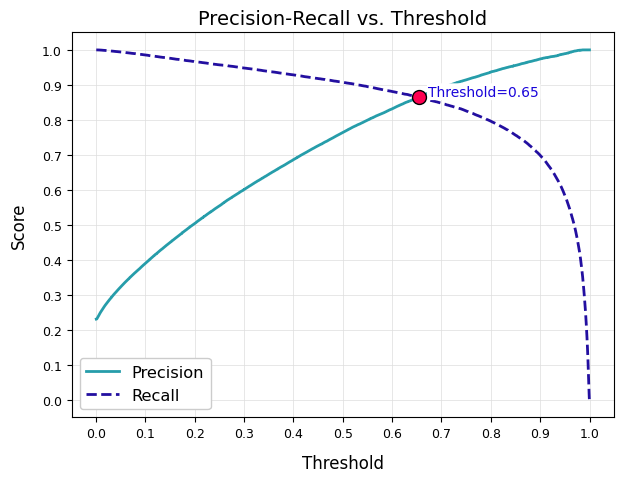

Best Threshold for equal Precision and Recall: 0.65


In [27]:
# ---------------------- MODEL XGBoost: PR vs. Threshold Curves ---------------------- #

pu.plot_pr_tradeoff(y_val_xgb, y_pred_prob_xgb)

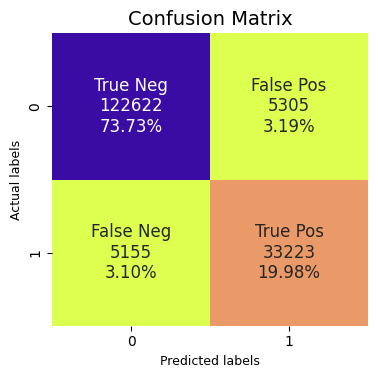

INFO:root:Confusion matrix plotted successfully.


In [29]:
# ---------------------- MODEL XGBoost: Confusion Matrix ----------------- #

pu.plot_confusion_matrix(
    y_val_xgb, y_pred_prob_xgb, threshold = 0.65
                      )

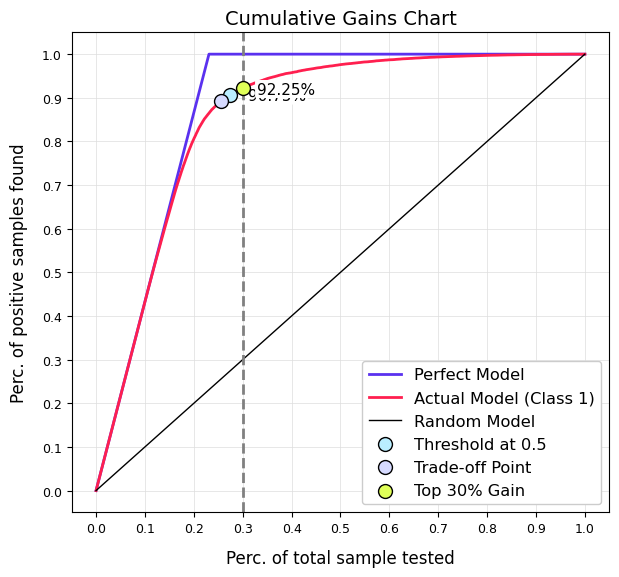

In [30]:
# ---------------------- MODEL XGBoost: Cumulative Gains Charts ---------------------- #
pu.plot_cumulative_gain(
    y_val_xgb, y_pred_prob_xgb, threshold=0.5
    )

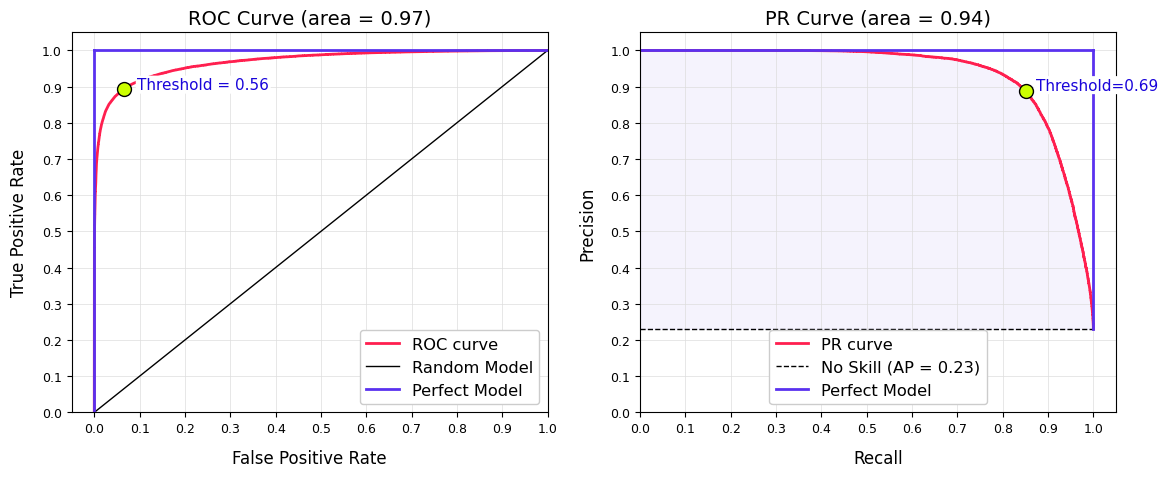

(0.9687191982331704, 0.9378581754227924)

In [31]:
# ---------------------- MODEL XGBoost: ROC & PR-AUC Curves ---------------------- #

pu.plot_roc_and_precision_recall_curves(y_val_xgb, y_pred_prob_xgb)

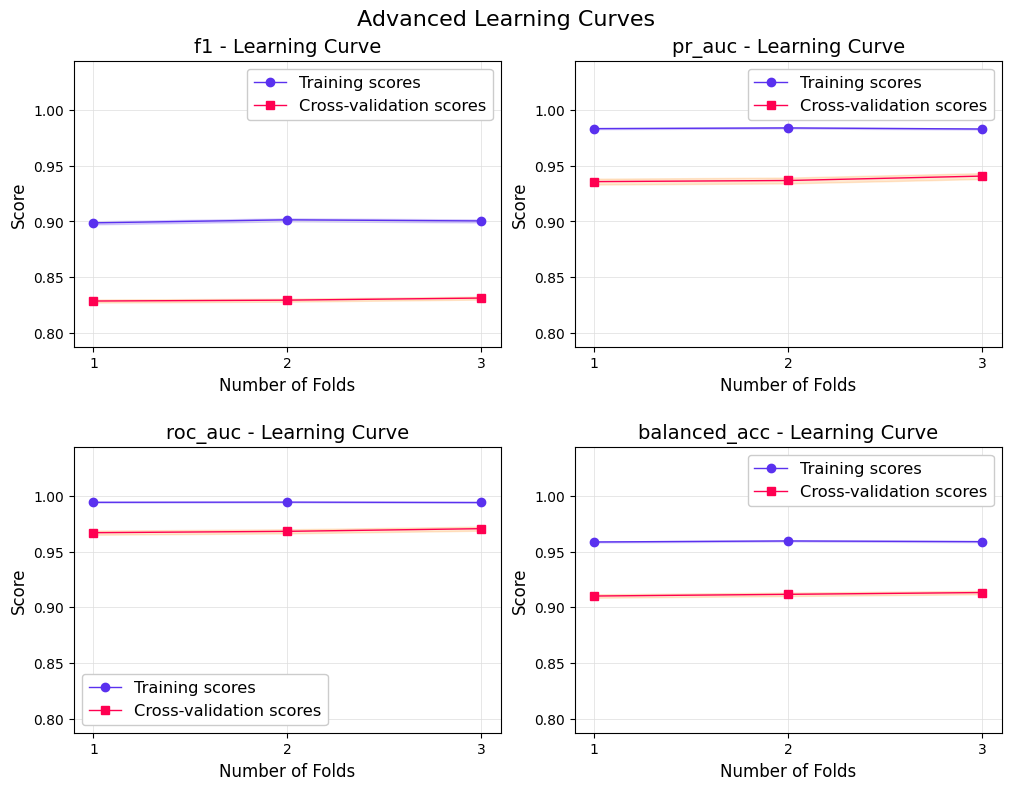

In [32]:
# ---------------------- MODEL XGBoost: Learning Curves ---------------------- #
metrics_to_plot_xgb = ['f1', 'pr_auc','roc_auc','balanced_acc']   # precision', 'f1', 'recall'

# Call the plotting function
pu.plot_advanced_learning_curves(
    train_metrics_xgb,             # Original DataFrame with training metrics for each fold
    val_metrics_xgb,               # Original DataFrame with validation metrics for each fold
    metrics=metrics_to_plot_xgb,                      # List of metrics to plot
)

In [33]:
# ---------------------- MODEL LOGREG: INTERACTIVE Learning Curves ---------------------- #

pu.plot_interactive_learning_curves(
    train_metrics_df=train_metrics_xgb,        # training metrics for each fold
    val_metrics_df=val_metrics_xgb,            # validation metrics for each fold
    metrics=metrics_to_plot_xgb                       # List of metrics to plot
)

## Autoencoder
### Hypertuning

In [ ]:
# ---------------------- MODEL AUTOENCODER: Hyperparameter Tuning with Optuna ---------------------- #

# Suppress specific TensorFlow warnings:
tf.get_logger().setLevel(logging.ERROR)

def build_autoencoder(input_dim, num_layers, units, activation):
    """
    Builds a symmetric autoencoder model based on the specified parameters.
    
    Parameters:
        input_dim (int): Number of input features.
        num_layers (int): Number of layers in the encoder (decoder will mirror this).
        units (int): Number of neurons in each layer of the encoder.
        activation (str): Activation function to use in the layers.

    Returns:
        tf.keras.Model: Compiled autoencoder model.
    """
    input_layer = layers.Input(shape=(input_dim,))
    x = input_layer
    
    # Encoder
    for _ in range(num_layers):
        x = layers.Dense(units, activation=activation)(x)
    
    # Decoder
    for _ in range(num_layers):
        x = layers.Dense(units, activation=activation)(x)
    
    output_layer = layers.Dense(input_dim, activation='sigmoid')(x)
    autoencoder = models.Model(inputs=input_layer, outputs=output_layer)
    return autoencoder

# ---------------------- MODEL AUTOENCODER: Optuna optimization function ---------------------- #

def ae_objective(trial, X):
    """
    Objective function for Optuna to optimize autoencoder parameters.
    
    Parameters:
        trial (optuna.trial.Trial): A trial object from Optuna.
        X (pd.DataFrame): Input data for the autoencoder.

    Returns:
        float: Mean squared error of the autoencoder's reconstruction error.
    """
    # Hyperparameters to tune
    num_layers = trial.suggest_int('num_layers', 1, 6)
    units = trial.suggest_int('units', 30, 300)
    activation = trial.suggest_categorical('activation', ['relu', 'sigmoid', 'tanh', 'softplus'])
    learning_rate = trial.suggest_float('learning_rate', 0.0005, 0.003)

    # Data preparation
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # K-Fold Cross-Validation
    kf = KFold(n_splits=3)
    scores = []

    for train_index, test_index in kf.split(X_scaled):
        X_train, X_val = X_scaled[train_index], X_scaled[test_index]
        
        autoencoder = build_autoencoder(X_train.shape[1], num_layers, units, activation, 
                                        )
        autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='mse')
        
        # Early stopping to prevent overfitting
        es_callback = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        
        # Train the model
        autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True,
                        validation_data=(X_val, X_val), callbacks=[es_callback], verbose=0)
        
        # Evaluate the model
        reconstructed = autoencoder.predict(X_val)
        mse = np.mean(np.power(X_val - reconstructed, 2))
        scores.append(mse)

    return np.mean(scores)

# ---------------------- MODEL AUTOENCODER: Hyperparameter tuning using Optuna ---------------------- #

def hyperparameter_tuning_ae(df, exclude_cols, n_trials=None):
    """
    Conducts hyperparameter tuning for an autoencoder using Optuna.
    
    Parameters:
        - df (pd.DataFrame): The dataset to train the autoencoder on.
        - exclude_cols (list, optional): List of columns to exclude from features.
        - n_trials: Number of trials for hyperparameter optimization.

    Returns:
        dict: Best parameters found by the hyperparameter tuning process.
    """
    X = df.drop(columns=exclude_cols)

    logging.info("Starting hyperparameter tuning for Autoencoder model...")
    
    try:
        # Sampler
        sampler = TPESampler(seed=42)
        #sampler = CmaEsSampler(seed=42)

        # HyperbandPruner
        pruner = HyperbandPruner(min_resource=5, max_resource=50, reduction_factor=2)

        # MedianPruner
        #pruner = MedianPruner(n_startup_trials= 10, n_warmup_steps= 10, interval_steps=5)

        # Configuring underlying pruner and the patient pruner
        #underlying_pruner = MedianPruner(n_startup_trials=10, n_warmup_steps=10, interval_steps=2)
        #patient_pruner = PatientPruner(underlying_pruner, patience=3)

        study = optuna.create_study(direction='minimize', sampler=sampler, pruner=pruner)

        study.optimize(lambda trial: ae_objective(trial, X), 
                                                n_trials= n_trials, 
                                                n_jobs= -1
                                                )
        
        best_params = study.best_params

        print("\nBest Parameters for Autoencoder:")
        for key, value in best_params.items():
            print(f"{key}: {value}")

        logging.info("Hyperparameter tuning completed. Best parameters: %s", best_params)

        return best_params

    except Exception as e:
        logging.error(f"Error in hyperparameter tuning: {e}")
        raise

# ---------------------- AUTOENCODER: Execute function to get the best hyperparameters ---------------------- #

best_params_ae = hyperparameter_tuning_ae(
                                        df=df_test_aligned,            # df_train_selected
                                        exclude_cols=['Client_id'],
                                        n_trials=50
                                        )

### Training

In [34]:
# ---------------------- AUTOENCODER: Trains & Evaluates model with hyperparameters ---------------------- #

def build_autoencoder(input_dim, num_layers, units, activation, learning_rate):
    """
    Builds an autoencoder model with specified parameters.

    Args:
        input_dim (int): Number of features in the input data.
        num_layers (int): Number of layers in both encoder and decoder.
        units (int): Number of neurons in each layer.
        activation (str): Activation function for the layers.
        learning_rate (float): Learning rate for the optimizer.

    Returns:
        tf.keras.Model: Compiled autoencoder model.
    """
    model = models.Sequential()
    # Encoder
    for i in range(num_layers):
        model.add(layers.Dense(units, activation=activation, 
                               input_shape=(input_dim,) if i == 0 else None))
    
    # Decoder
    for i in range(num_layers):
        model.add(layers.Dense(units, activation=activation))
    
    # Output layer
    model.add(layers.Dense(input_dim, activation='sigmoid'))

    # Compile the autoencoder
    optimizer = optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')
    return model

def train_autoencoder(X_train, X_val, num_layers, units, activation, learning_rate):
    """
    Trains the autoencoder using the provided training data.

    Args:
        X_train (np.array): Training data for the autoencoder.
        X_val (np.array): Validation data for the autoencoder.
        num_layers (int): Number of layers in the autoencoder.
        units (int): Number of units per layer.
        activation (str): Activation function.
        learning_rate (float): Learning rate for training.

    Returns:
        tf.keras.Model: Encoder part of the autoencoder.
    """
    input_dim = X_train.shape[1]
    autoencoder = build_autoencoder(input_dim, num_layers, units, activation, learning_rate)
    autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, 
                    validation_data=(X_val, X_val), verbose=0)
    encoder = models.Sequential(autoencoder.layers[:num_layers + 1])  # Ensures only encoder layers
    return encoder

def build_and_train_classifier(X_train, y_train, X_val, y_val):
    """
    Builds and trains a classifier using the encoded features.

    Args:
        X_train (np.array): Encoded training data.
        y_train (np.array): Labels for training data.
        X_val (np.array): Encoded validation data.
        y_val (np.array): Labels for validation data.

    Returns:
        tf.keras.Model: Trained classifier model.
    """
    model = models.Sequential([
        layers.Dense(10, activation='relu', input_dim=X_train.shape[1]),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=50, batch_size=256, 
              validation_data=(X_val, y_val), verbose=0)
    return model

def train_evaluate_autoencoder(df, target_col, exclude_cols, hyperparams):
    """
    Full training and evaluation pipeline for autoencoder and subsequent classification.

    Args:
        df (pd.DataFrame): Dataset containing the features and target.
        target_col (str): Name of the target column.
        exclude_cols (list): Columns to exclude from the model training.
        hyperparams (dict): Dictionary of hyperparameters for the autoencoder.

    Returns:
        tuple: Validation labels, predicted probabilities, and metrics.
    """
    try:
        logging.info("Starting the training process...")
        logging.info(f"Using hyperparameters: {hyperparams}")

        # Data preparation
        X = df.drop(columns=exclude_cols + [target_col])
        y = df[target_col].values

        # Feature scaling
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(X)
        X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

        # Train autoencoder and encode data
        encoder = train_autoencoder(X_train, X_val, 
                                    hyperparams['num_layers'], 
                                    hyperparams['units'], 
                                    hyperparams['activation'], 
                                    hyperparams['learning_rate'])
        X_train_encoded = encoder.predict(X_train)
        X_val_encoded = encoder.predict(X_val)

        # Train classifier using encoded features
        classifier = build_and_train_classifier(X_train_encoded, y_train, X_val_encoded, y_val)

        # Autoencoder: Generating predictions
        threshold=0.5

        # Evaluate classifier
        y_train_pred_prob = classifier.predict(X_train_encoded).ravel()
        y_val_pred_prob = classifier.predict(X_val_encoded).ravel()

        y_train_pred = (y_train_pred_prob > threshold).astype(int)
        y_val_pred = (y_val_pred_prob > threshold).astype(int)

        # Calculate metrics using the helper function
        metrics = mu.calculate_and_display_metrics(y_train, y_train_pred, y_train_pred_prob, 
                                                y_val, y_val_pred, y_val_pred_prob, 
                                                model_name='Autoencoder')

        return y_val, y_val_pred_prob, metrics

    except Exception as e:
        logging.exception("An error occurred during the training process")
        raise

# ---------------------- Autoencoder: Train & Evaluate ---------------------- #
default_params_ae = {
    'num_layers': 1, 
    'units': 217, 
    'activation': 'tanh', 
    'learning_rate': 0.008460015363053894
    }

y_val_ae, y_pred_prob_ae, metrics_ae = train_evaluate_autoencoder(
    df=df_train_selected,
    target_col='Target',
    exclude_cols=['Client_id'],
    hyperparams=default_params_ae
)


INFO:root:Starting the training process...
INFO:root:Using hyperparameters: {'num_layers': 1, 'units': 217, 'activation': 'tanh', 'learning_rate': 0.008460015363053894}
4158/4158 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
1040/1040 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
4158/4158 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
1040/1040 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Autoencoder - Comparison of Train & Test Metrics:

      Metric  Train Set  Test Set
   precision   0.832593  0.826860
      recall   0.433327  0.424310
          f1   0.569996  0.560827
      pr_auc   0.721785  0.716710
     roc_auc   0.856014  0.853489
balanced_acc   0.703594  0.698827


### Plots

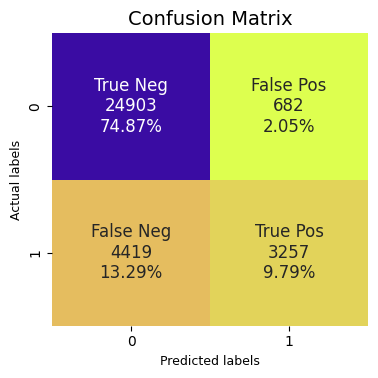

INFO:root:Confusion matrix plotted successfully.


In [35]:
# ---------------------- MODEL Autoencoder: Confusion Matrix ----------------- #

pu.plot_confusion_matrix(
    y_val_ae, y_pred_prob_ae, threshold = 0.5
                      )

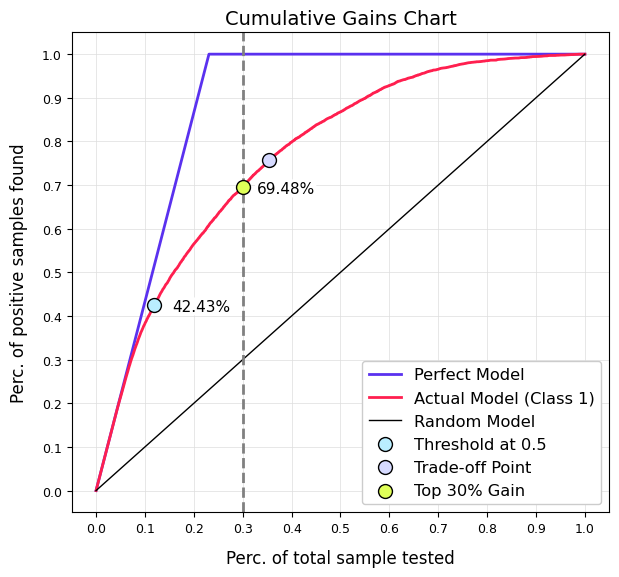

In [36]:
# ---------------------- MODEL Autoencoder: Cumulative Gains Charts ---------------------- #
pu.plot_cumulative_gain(
    y_val_ae, y_pred_prob_ae, threshold=0.5
    )

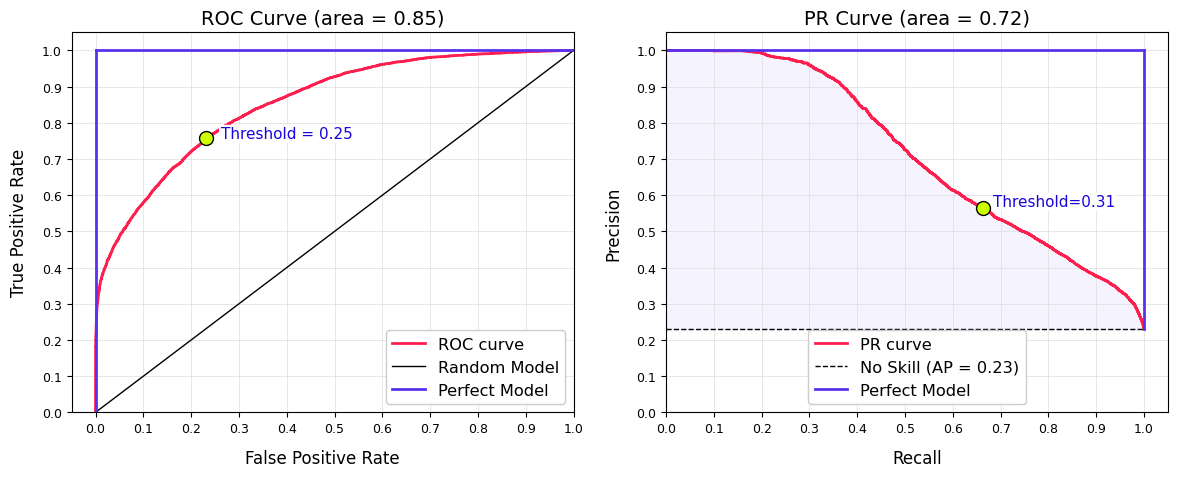

(0.8534888558232412, 0.7167099134242714)

In [37]:
# ---------------------- MODEL Autoencoder: ROC & PR-AUC Curves ---------------------- #

pu.plot_roc_and_precision_recall_curves(y_val_ae, y_pred_prob_ae)

## Artificial Neural Network (ANN)
### Hypertuning

In [ ]:
# ---------------------- MODEL ANN: Hyperparameter Tuning with Optuna ---------------------- #

def build_ann(input_dim, num_layers, units, activation):
    """
    Builds an ANN model based on the specified parameters.
    
    Parameters:
        input_dim (int): Number of input features.
        num_layers (int): Number of hidden layers.
        units (int): Number of neurons in each hidden layer.
        activation (str): Activation function for the hidden layers.

    Returns:
        tf.keras.Model: Compiled ANN model.
    """
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(input_dim,)))
    for _ in range(num_layers):
        model.add(layers.Dense(units, activation=activation))
    model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification assumption
    return model

# ---------------------- MODEL ANN: Optuna optimization function ---------------------- #

def ann_objective(trial, X, y):
    """
    Objective function for Optuna to optimize ANN parameters.
    
    Parameters:
        trial (optuna.trial.Trial): A trial object from Optuna.
        X (np.array): Input data for the ANN.
        y (np.array): Target data.

    Returns:
        float: Validation loss of the ANN.
    """
    # Hyperparameters to tune
    num_layers = trial.suggest_int('num_layers', 2, 5)
    units = trial.suggest_int('units', 50, 250)
    activation = trial.suggest_categorical('activation', ['relu', 'softplus', 'tanh'])
    learning_rate = trial.suggest_float('learning_rate', 0.0005, 0.005)

    class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y), y=y)
    class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}

    kf = KFold(n_splits= 5)  # Reduced for quicker execution; consider more splits if time allows
    scores = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        model = build_ann(X_train.shape[1], num_layers, units, activation)
        optimizer = optimizers.Adam(learning_rate=learning_rate)
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(curve='PR', name='auc')])

        es_callback = callbacks.EarlyStopping(monitor='val_auc', mode='max', patience=5, restore_best_weights=True)
        model.fit(X_train, y_train, epochs=50, batch_size=256, validation_data=(X_val, y_val), callbacks=[es_callback], verbose=0, class_weight=class_weights_dict)

        val_auc = model.evaluate(X_val, y_val, verbose=0)[1]  # [1] to fetch the AUC score
        scores.append(val_auc)

    return -np.mean(scores)  # Minimize negative AUC to maximize AUC

# ---------------------- MODEL ANN: Hyperparameter tuning using Optuna ---------------------- #

def hyperparameter_tuning_ann(df, target_column=None, exclude_cols=None, n_trials=None):
    """
    Conducts hyperparameter tuning for an ANN using Optuna, focusing on handling imbalanced data
    and optimizing based on Precision-Recall AUC.

    Parameters:
        - df (DataFrame): The complete dataset.
        - target_column (str): Name of the target column.
        - exclude_cols (list, optional): List of columns to exclude from features.
        - n_trials: Number of trials for hyperparameter optimization.

    Returns:
        dict: Best parameters found by the hyperparameter tuning process.
    """
    # Call the function to validate input DataFrame and prepare the data for model training
    X, _ = cu.validate_and_prepare(df, target_column, exclude_cols)
    y = df[target_column] 

    # Normalize the input features
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    logging.info("Starting hyperparameter tuning for ANN model...") 

    try:
        # Sampler
        sampler = TPESampler(seed=42)
        #sampler = CmaEsSampler(seed=42)

        # HyperbandPruner
        pruner = HyperbandPruner(min_resource=5, max_resource=50, reduction_factor=2)

        # MedianPruner
        #pruner = MedianPruner(n_startup_trials= 10, n_warmup_steps= 10, interval_steps=5)

        # Configuring underlying pruner and the patient pruner
        #underlying_pruner = MedianPruner(n_startup_trials=10, n_warmup_steps=10, interval_steps=2)
        #patient_pruner = PatientPruner(underlying_pruner, patience=3)

        study = optuna.create_study(direction='maximize', sampler=sampler, pruner=pruner)

        study.optimize(lambda trial: ann_objective(trial, X_scaled, y), 
                                                n_trials=n_trials, 
                                                n_jobs= -1
                                                )

        best_params = study.best_params

        print("\nBest Parameters for ANN:")
        for key, value in best_params.items():
            print(f"{key}: {value}")

        logging.info("Hyperparameter tuning completed. Best parameters: %s", best_params)

        return best_params

    except Exception as e:
        logging.error("Optuna optimization failed: %s", e)
        best_params = None

# ---------------------- MODEL ANN: Hyperparameter Tuning with Optuna ---------------------- #

best_params_ann = hyperparameter_tuning_ann(
                                        df= df_test_aligned,  # df_train_selected
                                        target_col='Target',
                                        exclude_cols=['Client_id'],
                                        n_trials=50
                                        ) 

### Training

In [38]:
# ---------------------- MODEL ANN: Trains & Evaluates model with hyperparameters ---------------------- #

def plot_learning_curves(history):
    """
    Plots learning curves for the training and validation loss.

    Args:
        history: A history object returned by the fit method of keras models.
    """
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# ---------------------- MODEL ANN: Build model on parameters Function ---------------------- #

def build_ann(input_dim, num_layers, units, activation):
    """
    Builds an ANN model based on the specified architecture parameters, including regularization and initializer.
    
    Parameters:
        input_dim (int): Number of input features.
        num_layers (int): Number of hidden layers.
        units (int): Number of neurons in each hidden layer.
        activation (str): Activation function for the hidden layers.
        
    Returns:
        tf.keras.Model: Uncompiled ANN model.
    """
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(input_dim,)))
    for _ in range(num_layers):
        model.add(layers.Dense(units, 
                               activation=activation, 
                              ))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# ---------------------- MODEL ANN: Main Training and Evaluation Function ---------------------- #

def train_evaluate_ann(df, target_column=None, exclude_cols=None, hyperparams=None):
    """
    Trains and evaluates an ANN model using the provided hyperparameters and dataset.
    Separates model architecture configuration from optimizer settings.
    
    Parameters:
    - df (pd.DataFrame): The dataset.
    - target_column (str): Name of the target column.
    - exclude_cols (list, optional): List of columns to exclude from features.
    - hyperparams (dict, optional): Hyperparameters for the ANN model.

    Returns:
        Tuple of validation target, prediction probabilities, and metrics DataFrame.
    """
    # Check if hyperparameters are provided
    if hyperparams is None:
        logging.info("No hyperparameters provided. The function will terminate without training the model.")
        return  # raise ValueError("Hyperparameters must be provided.")

    logging.info(f"Received hyperparameters: {hyperparams}\n")

    try:
        # Data preparation
        X, _ = cu.validate_and_prepare(df, target_column, exclude_cols)
        y = df[target_column] 

        # Feature scaling
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(X)

        X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

        # Build and compile model
        model = build_ann(X_train.shape[1], 
                        hyperparams['num_layers'], 
                        hyperparams['units'], 
                        hyperparams['activation'],
                        )
        optimizer = tf.keras.optimizers.Adam(learning_rate=hyperparams['learning_rate'])
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(curve='PR', name='auc')])

        # Training setup
        es_callback = callbacks.EarlyStopping(monitor='val_auc', mode='max', patience=10, restore_best_weights=True)
        batch_size = hyperparams.get('batch_size', 64)
        history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, 
                            batch_size=batch_size, callbacks=[es_callback], verbose=0)
        #plot_learning_curves(history)
        
        # ANN: Generating predictions
        threshold=0.5

        # Predictions and metrics
        y_train_pred_prob = model.predict(X_train).ravel()
        y_train_pred = (y_train_pred_prob > threshold).astype(int)

        y_val_pred_prob = model.predict(X_val).ravel()
        y_val_pred = (y_val_pred_prob > threshold).astype(int)

        # Evaluation
        metrics = mu.calculate_and_display_metrics(
                y_train,  y_train_pred, y_train_pred_prob,
                y_val, y_val_pred, y_val_pred_prob, model_name='ANN')

        return y_val, y_val_pred_prob, metrics
    
    except Exception as e:
        logging.exception("Failed during the training and evaluation process")
        raise

# ---------------------- ANN: Train & Evaluate ---------------------- #
# Default hyperparameters
default_params_ann = {
    'num_layers': 5,
    'units': 188,
    'activation': 'tanh',
    'learning_rate': 0.003
}


y_val_ann, y_pred_prob_ann, metrics_ann = train_evaluate_ann(
                                df_train_selected, 
                                'Target', 
                                ['Client_id'], 
                                default_params_ann)  # default_params_ann or best_params_ann


INFO:root:Received hyperparameters: {'num_layers': 5, 'units': 188, 'activation': 'tanh', 'learning_rate': 0.003}

4158/4158 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
1040/1040 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

ANN - Comparison of Train & Test Metrics:

      Metric  Train Set  Test Set
   precision   0.829596  0.835627
      recall   0.432578  0.427176
          f1   0.568646  0.565345
      pr_auc   0.708597  0.711599
     roc_auc   0.843914  0.847532
balanced_acc   0.702961  0.700983


### Plots

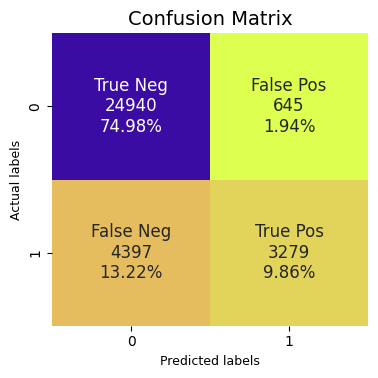

INFO:root:Confusion matrix plotted successfully.


In [39]:
# ---------------------- MODEL ANN: Confusion Matrix ----------------- #

pu.plot_confusion_matrix(
    y_val_ann, y_pred_prob_ann, threshold = 0.5
)

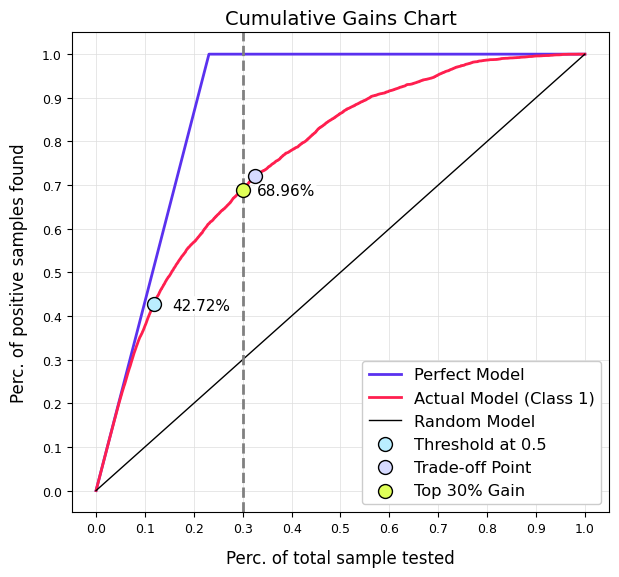

In [40]:
# ---------------------- MODEL ANN: Cumulative Gains Charts ---------------------- #
pu.plot_cumulative_gain(
    y_val_ann, y_pred_prob_ann, threshold=0.5
    )

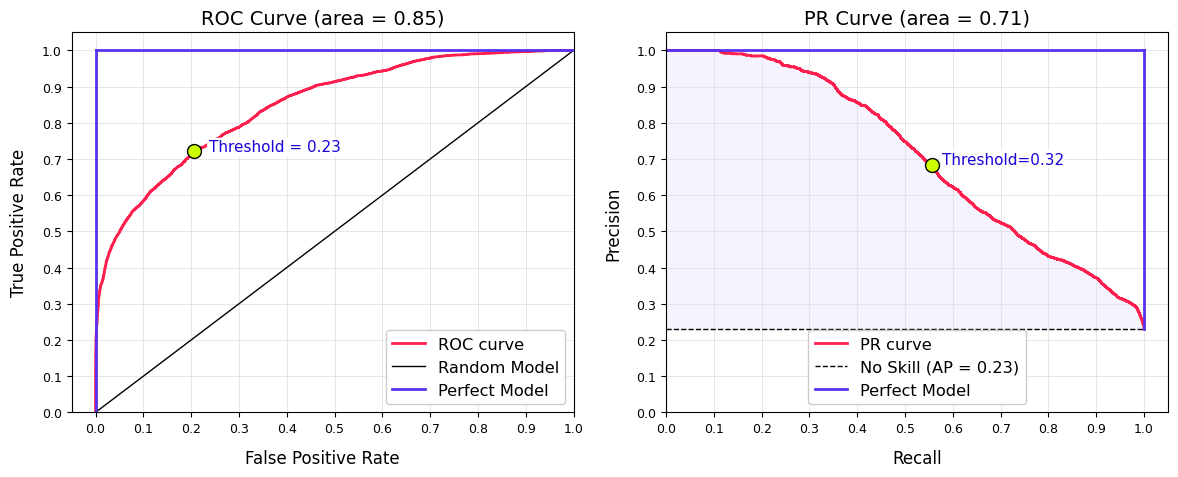

(0.8475316621795174, 0.711599156566551)

In [41]:
# ---------------------- MODEL ANN: ROC & PR-AUC Curves ---------------------- #

pu.plot_roc_and_precision_recall_curves(y_val_ann, y_pred_prob_ann)

## Model Comparison

### Check of y_vals

In [44]:
# ---------------------- MODEL COMPARISON: Check of y_vals of different models ---------------------- #

y_val_dict = {
    'LogReg': y_val_logreg,
    'LGBM': y_val_lgbm,
    'XGB': y_val_xgb,
}

# Call the function with the dictionary
model_info_df = mu.compare_y_val_arrays(y_val_dict)

INFO:root:Checking lengths of y_val arrays...
INFO:root:All y_val arrays have the same length: 166305
INFO:root:All y_val arrays are identical across models.


  y_val array  Length dUniques     Distribution      Order
0      LogReg  166305   [0, 1]  [127927, 38378]  Identical
1        LGBM  166305   [0, 1]  [127927, 38378]  Identical
2         XGB  166305   [0, 1]  [127927, 38378]  Identical


### Model performances

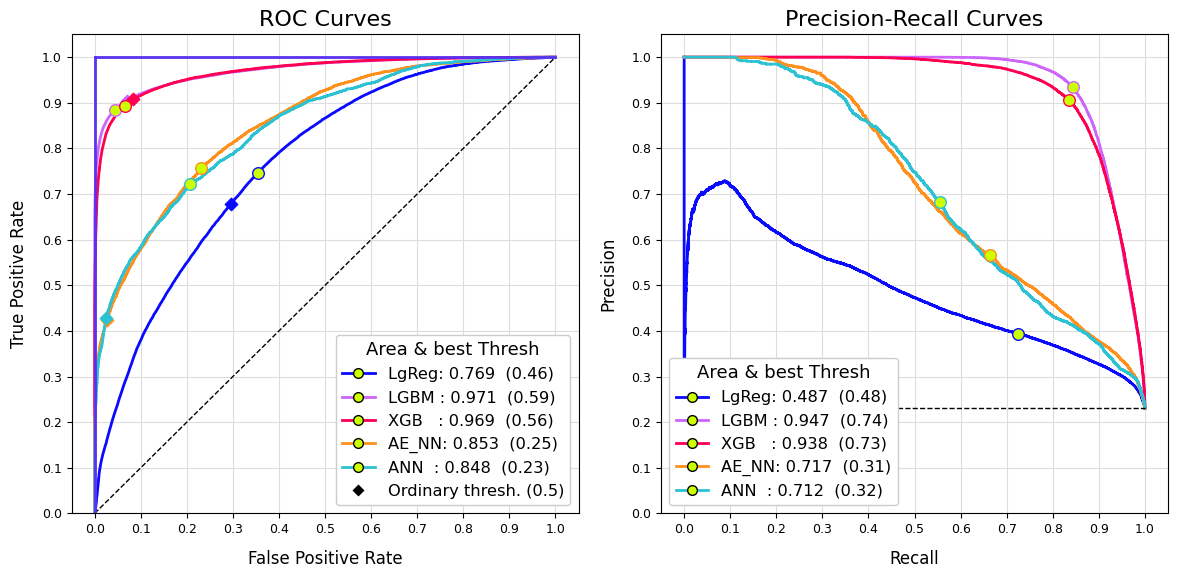

In [45]:
# ---------------------- COMPARE: MULTIPLE ROC & PR CURVES ---------------------- #
models_data = {
    'LgReg': (y_val_logreg, y_pred_prob_logreg),
    'LGBM ': (y_val_lgbm, y_pred_prob_lgbm),
    'XGB   ': (y_val_xgb, y_pred_prob_xgb),
    'AE_NN': (y_val_ae, y_pred_prob_ae),
    'ANN  ': (y_val_ann, y_pred_prob_ann),
}
pu.plot_multiple_roc_prc(models_data)

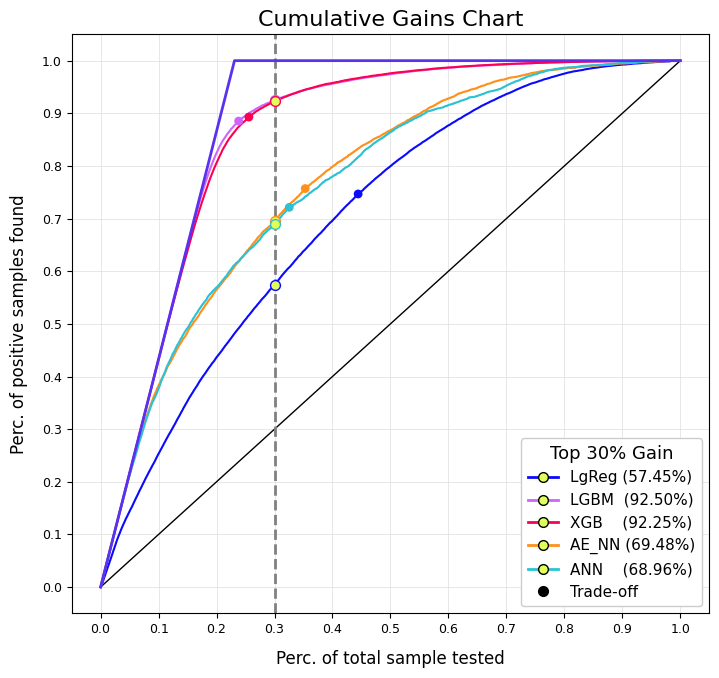

In [46]:
# ---------------------- COMPARE: MULTIPLE CUMULATIVE GAINS CHARTS ---------------------- #
models_data = {
    'LgReg': (y_val_logreg, y_pred_prob_logreg),
    'LGBM ': (y_val_lgbm, y_pred_prob_lgbm),
    'XGB   ': (y_val_xgb, y_pred_prob_xgb),
    'AE_NN': (y_val_ae, y_pred_prob_ae),
    'ANN   ': (y_val_ann, y_pred_prob_ann),
}

pu.plot_multiple_cumulative_gains(models_data)

In [49]:
# ----------------- MODEL PERFORMANCE SUMMARY -------------- #

model_metrics_dict = {
    'Logreg': avg_metrics_logreg,
    'LGBM': avg_metrics_lgbm,
    'XGB': avg_metrics_xgb,
    'AE_NN': metrics_ae,
    'ANN': metrics_ann
}

mu.plot_performance_summary(model_metrics_dict)

    Model  precision    recall        f1    pr_auc   roc_auc  balanced_acc
1    LGBM   0.796810  0.904216  0.847096  0.946956  0.970788      0.917506
2     XGB   0.764058  0.907499  0.829621  0.937859  0.968732      0.911714
3   AE_NN   0.826860  0.424310  0.560827  0.716710  0.853489      0.698827
4     ANN   0.835627  0.427176  0.565345  0.711599  0.847532      0.700983
0  Logreg   0.407019  0.678878  0.508918  0.487193  0.769254      0.691085


# Test & Evaluate Best Final Model(s)

## LGBM

Received hyperparams: {'verbosity': -1, 'objective': 'binary', 'random_state': 42, 'metric': 'aucpr', 'learning_rate': 0.0249816047538945, 'n_estimators': 956, 'num_leaves': 79, 'max_depth': 7, 'min_data_in_leaf': 26, 'bagging_fraction': 0.7467983561008608, 'feature_fraction': 0.7174250836504598, 'scale_pos_weight': 5.997359869632}

INFO:root:Model training completed.

LGBM - Comparison of Train & Test Metrics:

      Metric  Train Set  Test Set
   precision   0.900998  0.864730
      recall   0.929288  0.880276
          f1   0.914924  0.872434
      pr_auc   0.977370  0.946716
     roc_auc   0.990872  0.970606
balanced_acc   0.949328  0.919481


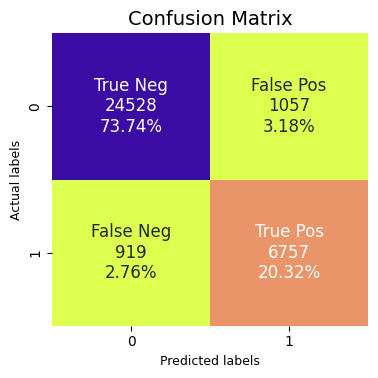

INFO:root:Confusion matrix plotted successfully.


In [52]:
# ---------------------- FINAL MODEL LGBM: Trains and Evaluates the final model ---------------------- #

def train_evaluate_final_lgbm(df_train,
                            target_column, Identifier=None, 
                            hyperparams=None, 
                            plot_charts=True, model_name='LGBM', 
                            use_scale_pos_weight=False,
                            smote_sampling_strategy=None):
    """
    Trains and evaluates a LightGBM model with options for SMOTE and dynamic is_unbalance adjustment.

    Parameters:
    - df_train (pd.DataFrame): DataFrame containing the training data features and target column.
    - target_column (str): Name of the target column in df.
    - Identifier (list of str, optional): Unique ID
    - hyperparams (dict, optional): Dictionary of hyperparameters for LightGBM.
    - plot_charts (bool, optional): If True, plots evaluation charts.
    - model_name (str, optional): Name of the model for display purposes.
    - use_scale_pos_weight (bool, optional): If True, dynamically adjusts is_unbalance or scale_pos_weight for binary tasks.
    - smote_sampling_strategy (None, str, or float, optional): Controls the SMOTE application. If None or "0", SMOTE is not applied. If set to "auto" or a float between 0 and 1, SMOTE is applied.

    Returns:
    - Tuple: (trained model, evaluation metrics DataFrame, test dataset features, 
             test dataset target, training dataset features, training dataset target, 
             test predicted probabilities)
    """
    # Define default hyperparameters
    default_hyperparams = {
        'verbosity': -1,
        'objective': 'binary',
        'random_state': 42,
        'metric': 'aucpr',
    }
    # Validate and merge hyperparameters
    if hyperparams is not None:
        if not isinstance(hyperparams, dict):
            raise TypeError("Hyperparameters must be a dictionary.")
        hyperparams = {**default_hyperparams, **hyperparams}
    else:
        hyperparams = default_hyperparams.copy()

    # Check if hyperparams are provided and valid
    print(f"Received hyperparams: {hyperparams}\n")

    # Prepare training data
    X_train, _ = cu.validate_and_prepare(df_train, target_column, Identifier)
    y_train = df_train[target_column]

    # Split the data into training and validation sets (80-20 split)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

    # Handle class imbalance with SMOTE if requested
    if smote_sampling_strategy and 0 < smote_sampling_strategy < 1:
        smote = SMOTE(random_state=42, sampling_strategy=smote_sampling_strategy)
        X_train, y_train = smote.fit_resample(X_train, y_train)
        logging.info(f"After SMOTE: X_train shape: {X_train.shape}, y_train distribution: {np.bincount(y_train)}")

    # Prepare data for LGBM
    train_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

    # Train the LightGBM model
    with open(os.devnull, 'w') as f, contextlib.redirect_stdout(f):

        # Configure callbacks including early stopping
        callbacks = [
            lgb.early_stopping(stopping_rounds=10, verbose=False),
            lgb.log_evaluation(period=0)  # Adjust period or remove as needed
        ]

        model = lgb.train(
            params=hyperparams,
            train_set=train_data,
            num_boost_round=hyperparams.get('n_estimators', 100),
            feval = mu.lgbm_custom_eval('pr_auc'),
            valid_sets=[train_data, val_data],
            valid_names=['training', 'validation'],
            callbacks=callbacks,
        )

    # LGBM: Generating predictions and probabilities for evaluation
    # Change the threshold
    threshold=0.6

    y_train_pred_prob = model.predict(X_train)
    y_train_pred = (y_train_pred_prob >= threshold).astype(int)
    
    y_val_pred_prob = model.predict(X_val)
    y_val_pred = (y_val_pred_prob >= threshold).astype(int)

    logging.info("Model training completed.")

    # Return & display metrics df for comparisonm
    metrics_df = mu.calculate_and_display_metrics(
        y_train, y_train_pred, y_train_pred_prob,
        y_val, y_val_pred, y_val_pred_prob,
        model_name=model_name
    )

    # Plotting evaluation charts if plot_charts is True
    if plot_charts:
        pu.plot_confusion_matrix(y_val, y_val_pred)

    return model, metrics_df, X_val, y_val, y_val_pred_prob

# ---------------------- FINAL MODEL LGBM: Training & Evaluation ---------------------- #

model_lgbm, metrics_lgbm, X_val_lgbm, y_val_lgbm, y_val_pred_prob_lgbm = train_evaluate_final_lgbm(
            df_train=df_train_selected,
            target_column='Target',
            Identifier=['Client_id'],
            hyperparams= default_params_lgbm,   # default_params_lgbm or best_params_lgbm
        )

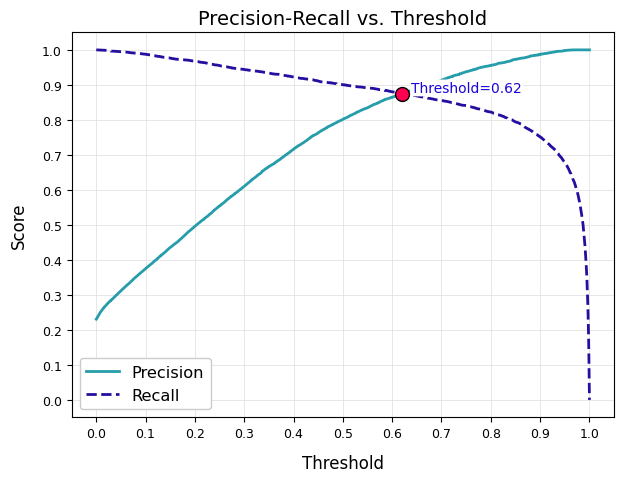

Best Threshold for equal Precision and Recall: 0.62


In [53]:
# ---------------------- MODEL LGBM: PR vs. Threshold Curves ---------------------- #

pu.plot_pr_tradeoff(y_val_lgbm, y_val_pred_prob_lgbm)

In [55]:
# ---------------------- FINAL MODEL LGBM: CREATE PREDICTIONS ON TEST DATA ---------------------- #

predictions_lgbm = mu.predict_with_model(df_test_aligned, model_lgbm, Identifier = ['Client_id'])

INFO:root:Created predictions for Test Data successfully.



## XGBoost 

INFO:root:Received hyperparameters: {'verbosity': 0, 'objective': 'binary:logistic', 'eval_metric': 'aucpr', 'random_state': 42, 'colsample_bytree': 0.7733551396716398, 'subsample': 0.5739417822102109, 'learning_rate': 0.0969888781486913, 'n_estimators': 798, 'max_depth': 10, 'scale_pos_weight': 6.140611413695279}

INFO:root:Model training completed.

XGBoost - Comparison of Train & Test Metrics:

      Metric  Train Set  Test Set
   precision   0.725154  0.712287
      recall   0.792587  0.755993
          f1   0.757373  0.733489
      pr_auc   0.850056  0.820356
     roc_auc   0.944070  0.927546
balanced_acc   0.851234  0.832188


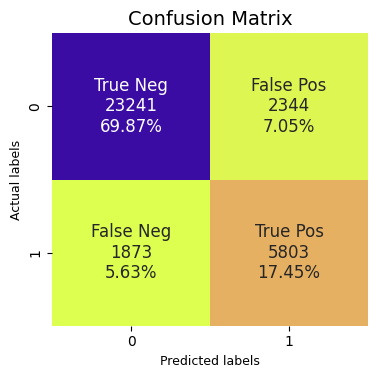

INFO:root:Confusion matrix plotted successfully.


In [56]:
# ---------------------- FINAL MODEL XGBoost: Trains and Evaluates the final model ---------------------- #

def train_evaluate_final_xgb(df_train,
                            target_column,
                            Identifier=None,  
                            hyperparams=None, 
                            plot_charts=True, model_name='XGBoost',
                            use_scale_pos_weight=False,
                            strategy=None):
    """
    Trains and evaluates an XGBoost model with options for SMOTE and dynamic scale_pos_weight adjustment.

    Parameters:
    - df (pd.DataFrame): DataFrame containing the features and target column.
    - target_column (str): Name of the target column in df.
    - Identifier (list of str, optional): Unique ID
    - hyperparams (dict, optional): Dictionary of hyperparameters for XGBoost.
    - plot_charts (bool, optional): If True, plots evaluation charts.
    - model_name (str, optional): Name of the model for display purposes.
    - use_scale_pos_weight (bool, optional): If True, dynamically adjusts scale_pos_weight.
    - strategy (None, str, or float, optional): Controls the SMOTE application. 
      If None or "0", SMOTE is not applied. If set to "auto" or a float between 0 and 1, SMOTE is applied.

    Returns:
    - Tuple: (trained model, evaluation metrics DataFrame, validation dataset features, 
             validation dataset target, training dataset features, training dataset target, 
             validation predicted probabilities)
    """
    # Define default hyperparameters
    default_hyperparams = {
        'verbosity': 0,
        'objective': 'binary:logistic',
        'eval_metric': 'aucpr',
        'random_state':42,
    }
    # Validate and merge hyperparameters
    if hyperparams is not None:
        if not isinstance(hyperparams, dict):
            raise TypeError("Hyperparameters must be a dictionary.")
        # Merge user-specified hyperparams with defaults, user-specified taking precedence
        hyperparams = {**default_hyperparams, **hyperparams}
    else:
        hyperparams = default_hyperparams.copy()

    logging.info(f"Received hyperparameters: {hyperparams}\n")

    # Prepare training data
    X_train, _ = cu.validate_and_prepare(df_train, target_column, Identifier)
    y_train = df_train[target_column]
    
    # Split the data into training and validation sets (80-20 split)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

    # Handle class imbalance
    if strategy == 'SMOTE':
        smote = SMOTE(random_state=42)
        X_train, y_train = smote.fit_resample(X_train, y_train)
        logging.info(f"After SMOTE : X_train shape: {X_train.shape}, y_train distribution: {np.bincount(y_train)}")

    if strategy == 'ADASYN':
        adasyn = ADASYN(random_state=42)
        X_train, y_train = adasyn.fit_resample(X_train, y_train)
        
    # Make a copy of param_grid to modify
    hyperparams_copy = hyperparams.copy()   

    # Dynamic scale_pos_weight adjustment
    if use_scale_pos_weight:
        num_negative = np.sum(y_train == 0)
        num_positive = np.sum(y_train == 1)
        scale_pos_weight_value = num_negative / num_positive
        hyperparams_copy['scale_pos_weight'] = scale_pos_weight_value
        logging.info(f"Dynamic scale_pos_weight applied: {scale_pos_weight_value}")

    # Prepare data for XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dval = xgb.DMatrix(X_val, label=y_val)

    # Initialize and train the model
    evals_result = {}
    model = xgb.train(
        params=hyperparams_copy,
        dtrain=dtrain,
        evals=[(dtrain, 'train'), (dval, 'validation')],
        early_stopping_rounds=10,
        num_boost_round=hyperparams_copy.get('n_estimators', 1000),
        feval= mu.xgb_custom_eval('pr_auc'),
        evals_result=evals_result, 
        verbose_eval=False,
    )

    # XGBoost: Generating predictions
    threshold=0.7

    y_train_pred_prob = model.predict(dtrain)
    y_val_pred_prob = model.predict(dval)

    # Change the threshold
    y_train_pred = (y_train_pred_prob >= threshold).astype(int)
    y_val_pred = (y_val_pred_prob >= threshold).astype(int)
    logging.info("Model training completed.")

    # Return & display metrics df for comparison
    metrics_df = mu.calculate_and_display_metrics(
        y_train, y_train_pred, y_train_pred_prob,
        y_val, y_val_pred, y_val_pred_prob,
        model_name=model_name
    )

    # Plotting evaluation charts if plot_charts is True
    if plot_charts:
        pu.plot_confusion_matrix(y_val, y_val_pred)

    return model, metrics_df, X_val, y_val, y_val_pred_prob

# ---------------------- FINAL MODEL XGBoost: Training & Evaluation ---------------------- #

model_xgb, metrics_xgb, X_val_xgb, y_val_xgb, y_val_pred_prob_xgb = train_evaluate_final_xgb(
            df_train=df_train_selected,    # TRAIN
            target_column='Target',
            Identifier=['Client_id'],
            hyperparams = default_params_xgb,  # best_params_xgb  # default_params_xgb
            strategy=' '   # 'SMOTE', 'ADASYN'
        )

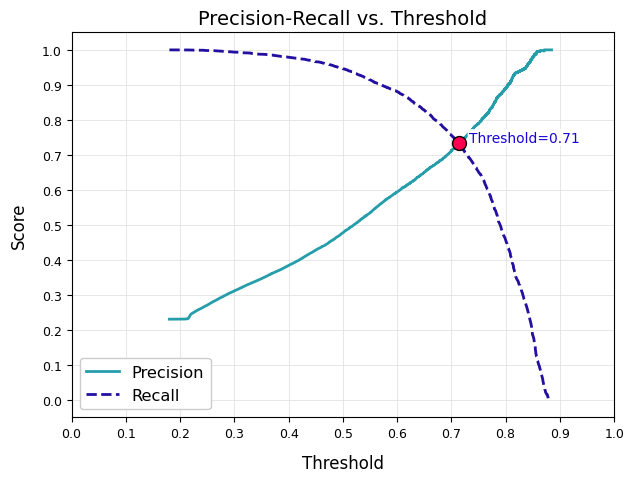

Best Threshold for equal Precision and Recall: 0.71


In [57]:
# ---------------------- MODEL LGBM: PR vs. Threshold Curves ---------------------- #

pu.plot_pr_tradeoff(y_val_xgb, y_val_pred_prob_xgb)

In [58]:
# ---------------------- FINAL MODEL XGBoost: CREATE PREDICTIONS ON TEST DATA ---------------------- #

predictions_xgb = mu.predict_with_model(df_test_aligned, model_xgb, Identifier = ['Client_id'])

INFO:root:Created predictions for Test Data successfully.



## Final Comparison

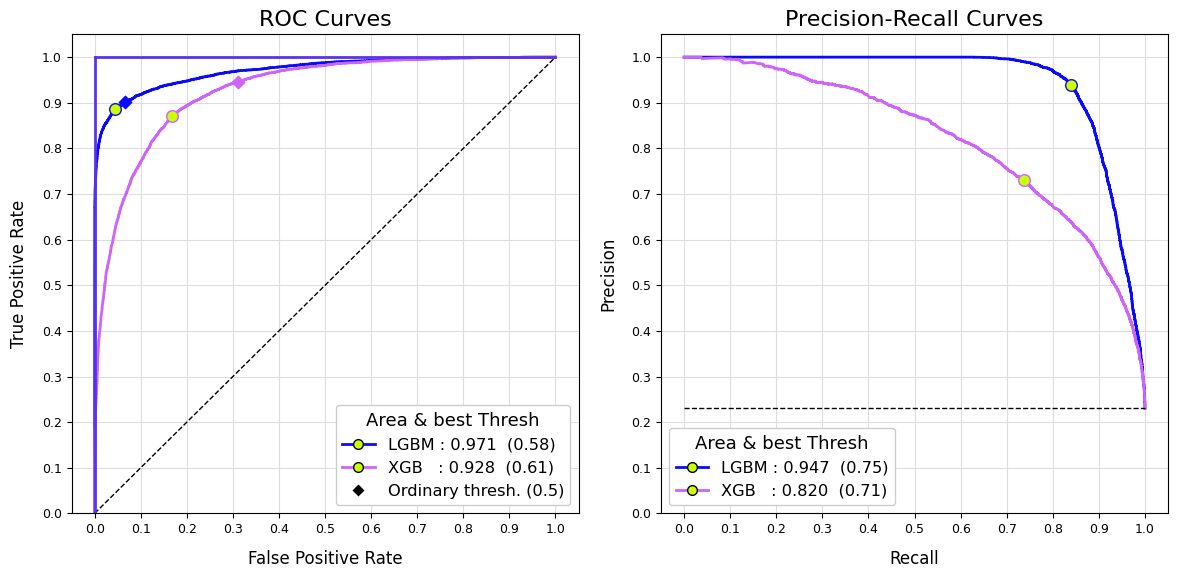

In [59]:
# ---------------------- FINAL MODEL Comparison: MULTIPLE ROC & PR CURVES ---------------------- #
final_comparison_1 = {
    'LGBM ': (y_val_lgbm, y_val_pred_prob_lgbm),
    'XGB   ': (y_val_xgb, y_val_pred_prob_xgb)
}
pu.plot_multiple_roc_prc(final_comparison_1)

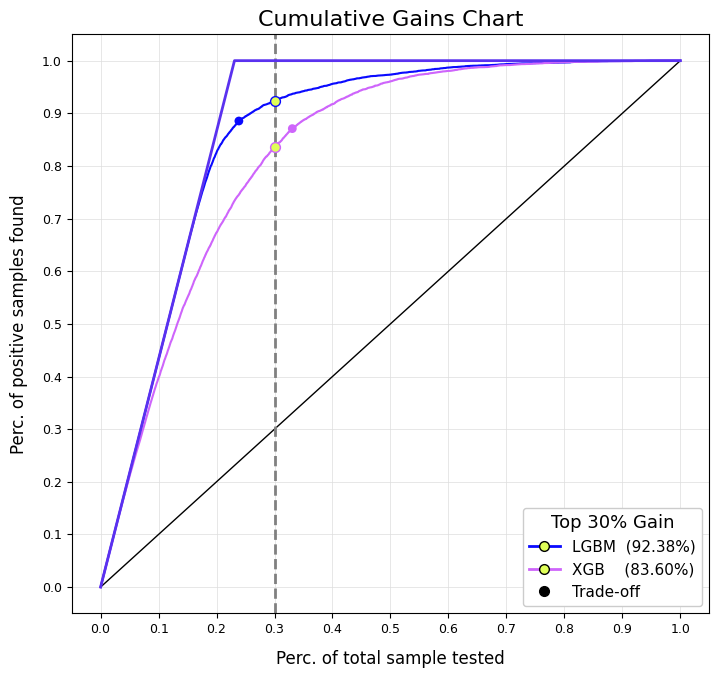

In [60]:
# ---------------------- COMPARE: MULTIPLE CUMULATIVE GAINS CHARTS ---------------------- #
final_comparison_2 = {
    'LGBM ': (y_val_lgbm, y_val_pred_prob_lgbm),
    'XGB   ': (y_val_xgb, y_val_pred_prob_xgb)
}

pu.plot_multiple_cumulative_gains(final_comparison_2)

In [62]:
# ----------------- MODEL PERFORMANCE SUMMARY -------------- #
final_metrics_dict = {
    'LGBM': metrics_lgbm,
    'XGB': metrics_xgb,
}

mu.plot_performance_summary(final_metrics_dict)

  Model  precision    recall        f1    pr_auc   roc_auc  balanced_acc
0  LGBM   0.864730  0.880276  0.872434  0.946716  0.970606      0.919481
1   XGB   0.712287  0.755993  0.733489  0.820356  0.927546      0.832188


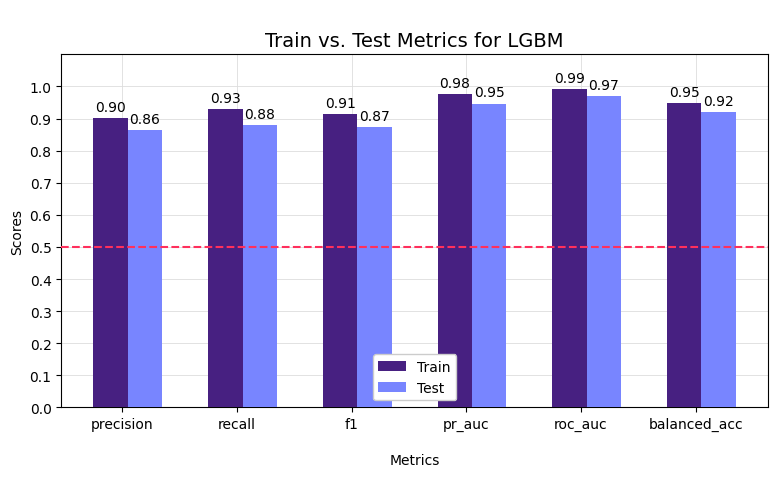

In [63]:
# ---------------------- FINAL MODEL LGBM: Comparison of Train & Test metrics -------------------- #

pu.compare_train_val_metrics(metrics_lgbm, model_name='LGBM')

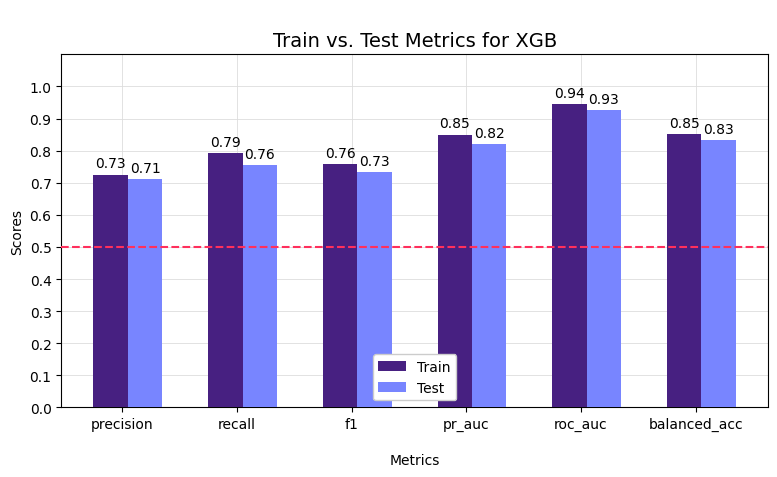

In [64]:
# ---------------------- FINAL MODEL ANN: Comparison of Train & Test metrics -------------------- #

pu.compare_train_val_metrics(metrics_xgb, model_name='XGB')

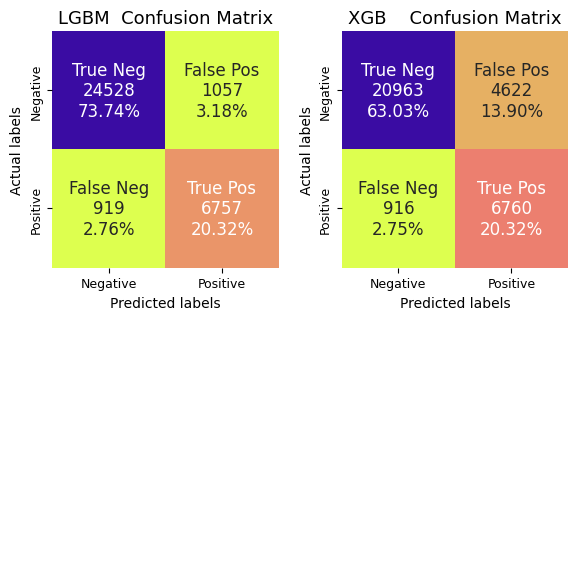

INFO:root:Multiple confusion matrices plotted successfully.


In [65]:
# ---------------------- FINAL MODEL Comparison: Confusion Matrices -------------------- #
models_data = {
    'LGBM ': (y_val_lgbm, y_val_pred_prob_lgbm),
    'XGB   ': (y_val_xgb, y_val_pred_prob_xgb)
}

pu.panel_of_confusion_matrices(models_data,threshold=0.6)

## Process Prediction 

In [66]:
# ---------------------- Function to LOAD DATA & DF ---------------------- #

df_test_binned = manager.load_data("df_test_binned.parquet", "Saved_Dataframes")

INFO:root:'df_test_binned.parquet' loaded successfully from C:\Users\Barba\BT_FraudDetection\Saved_Dataframes\df_test_binned.parquet, 
 -> shape: (1939722, 23)



In [68]:
# ----------------- FINAL MODEL LGBM: Create predictions & probabilities -------------- #

mu.create_predictions(predictions_lgbm, model_name='LGBM')

INFO:root:Displaying top 10 predictions for LGBM:

               Client_id  Prediction_Probability  Predicted_Class
42256  test_Client_48028                0.984414                1
19263  test_Client_27334                0.983828                1
13358  test_Client_22019                0.981609                1
8175   test_Client_17355                0.980530                1
22769   test_Client_3049                0.978988                1
52260  test_Client_57031                0.976757                1
46626  test_Client_51961                0.976690                1
23708  test_Client_31334                0.974525                1
48597  test_Client_53735                0.971538                1
48896  test_Client_54003                0.970560                1

Predicted_Class
0    52648
1     5421

LGBM: Number of pos. labeled over >70% probability: 2344


In [74]:
df_test_aligned.head()

,Client_id,Consumption_level_1_mean,Consumption_level_1_std,Consumption_level_1_sum,Consumption_level_2_mean,Consumption_level_2_std,Consumption_level_2_sum,Consumption_level_3_mean,Consumption_level_3_std,Consumption_level_3_sum,Consumption_level_4_mean,Consumption_level_4_std,Consumption_level_4_sum,Counter_code_group_200_mean,Counter_code_group_400_mean,Counter_code_mean,Counter_number_mean,Counter_number_median,Counter_number_std,Counter_statue_group_0_mean,Counter_statue_mean,Counter_type_elec_count,Counter_type_elec_mean,Counter_type_gaz_count,Counter_type_gaz_mean,Creation_date_is_weekday_mean,District_60_mean,District_62_mean,District_63_mean,District_69_mean,Invoice_date_count,Invoice_date_day_mean,Invoice_date_day_median,Invoice_date_day_std,Invoice_date_is_weekday_mean,Invoice_date_month_mean,Invoice_date_month_median
0,test_Client_0,0.073579,-0.207689,0.258994,-0.149976,-0.139241,-0.151982,-0.175686,-0.362472,-0.226676,-0.089778,-0.119662,-0.095787,1.197786,-0.360206,0.036188,-0.182336,-0.171142,-0.126826,0.693548,-0.002811,0.151757,0.879544,0.151757,-0.879543,0.29433,-0.55517,1.535478,-0.521693,-0.581415,0.151757,0.816757,0.762723,-0.986359,0.616592,0.332384,0.357449
1,test_Client_1,0.869448,0.829254,0.602813,0.973759,0.733858,0.650086,0.983417,1.941746,1.128461,0.630327,2.834660,0.610773,-0.834874,2.776187,2.446294,-0.182336,-0.171142,-0.126826,-1.441862,-0.002743,-0.423132,0.879544,-0.423132,-0.879543,0.29433,-0.55517,-0.651263,-0.521693,1.719941,-0.423132,-1.147864,-1.484677,0.982925,-0.805702,-0.086866,0.357449
2,test_Client_10,0.160518,0.029516,1.584459,-0.104326,-0.070807,-0.036866,-0.075618,0.377605,0.166925,-0.089581,-0.118169,-0.095130,-0.834874,-0.360206,-0.837214,-0.182335,-0.171142,-0.126823,0.693548,-0.002811,1.569816,-0.902780,1.569816,0.902805,0.29433,-0.55517,1.535478,-0.521693,-0.581415,1.569816,0.851480,0.762723,-0.927419,0.829936,1.062896,0.886735
3,test_Client_100,-0.248043,-0.173328,-0.219868,-0.154311,-0.157052,-0.157204,-0.175686,-0.362472,-0.226676,-0.089778,-0.119662,-0.095787,-0.834874,-0.360206,-1.001206,-0.182336,-0.171142,-0.126825,0.693548,-0.002811,0.266735,-1.192926,0.266735,1.192955,0.29433,1.80125,-0.651263,-0.521693,-0.581415,0.266735,-0.270638,-0.735543,1.066134,0.474363,-0.391776,-0.436481
4,test_Client_1000,0.179186,0.315062,0.955473,0.039770,0.157822,0.177393,0.038436,1.005168,0.376396,-0.089778,-0.119662,-0.095787,-0.834874,-0.360206,-0.668506,-0.182336,-0.171142,-0.126823,-1.441862,-0.002688,0.764972,-0.529735,0.764972,0.529756,0.29433,-0.55517,1.535478,-0.521693,-0.581415,0.764972,-0.478979,-0.286064,0.313785,0.189904,0.637294,0.357449


In [75]:
# ---------------------- LOAD DATA ---------------------- #

df_test_imputed = manager.load_data("df_test_imputed_2.parquet", "Saved_Dataframes")

INFO:root:'df_test_imputed_2.parquet' loaded successfully from C:\Users\Barba\BT_FraudDetection\Saved_Dataframes\df_test_imputed_2.parquet, 
 -> shape: (58069, 84)



In [76]:
output_lgbm = pd.merge(df_test_imputed, predictions_lgbm, on='Client_id', how='left')

output_lgbm.head()

,Client_catg_11_mean,Client_catg_12_mean,Client_catg_51_mean,Client_id,Consumption_level_1_mean,Consumption_level_1_std,Consumption_level_1_sum,Consumption_level_2_mean,Consumption_level_2_std,Consumption_level_2_sum,Consumption_level_3_mean,Consumption_level_3_std,Consumption_level_3_sum,Consumption_level_4_mean,Consumption_level_4_std,Consumption_level_4_sum,Counter_code_group_100_mean,Counter_code_group_200_mean,Counter_code_group_300_mean,Counter_code_group_400_mean,Counter_code_group_500_mean,Counter_code_group_600_mean,Counter_code_group_700_mean,Counter_code_mean,Counter_coefficient_mean,Counter_coefficient_std,Counter_number_mean,Counter_number_median,Counter_number_std,Counter_statue_group_0_mean,Counter_statue_group_1_mean,Counter_statue_group_2_mean,Counter_statue_group_3_mean,Counter_statue_group_4_mean,Counter_statue_group_5_mean,Counter_statue_mean,Counter_statue_median,Counter_type_elec_count,Counter_type_elec_mean,Counter_type_gaz_count,Counter_type_gaz_mean,Creation_date_is_weekday_mean,District_60_mean,District_62_mean,District_63_mean,District_69_mean,Invoice_date_count,Invoice_date_day_mean,Invoice_date_day_median,Invoice_date_day_std,Invoice_date_is_weekday_mean,Invoice_date_is_weekday_median,Invoice_date_month_mean,Invoice_date_month_median,Invoice_date_month_std,Invoice_date_year_mean,Invoice_date_year_median,Invoice_date_year_std,Months_number_mean,Months_number_median,Months_number_std,Months_number_sum,New_index_subtract_old_index_mean,New_index_subtract_old_index_sum,Reading_remarque_mean,Region_group_100_mean,Region_group_200_mean,Region_group_300_mean,Tarif_type_mean,Tarif_type_median,Time_gap_to_previous_invoice_date_mean,Time_gap_to_previous_invoice_date_std,Consumption_level_1_std_missing_indicator,Consumption_level_2_std_missing_indicator,Consumption_level_3_std_missing_indicator,Consumption_level_4_std_missing_indicator,Counter_coefficient_std_missing_indicator,Counter_number_std_missing_indicator,Invoice_date_day_std_missing_indicator,Invoice_date_month_std_missing_indicator,Invoice_date_year_std_missing_indicator,Months_number_std_missing_indicator,Time_gap_to_previous_invoice_date_mean_missing_indicator,Time_gap_to_previous_invoice_date_std_missing_indicator,Prediction_Probability,Predicted_Class
0,1,0,0,test_Client_0,488.14,230.39,18061,3.24,19.73,120,0.00,0.00,0,0.00,0.00,0,0,1,0,0,0,0,0,203.00,1.0,0.0,651208.00,651208.0,0.00,1,0,0,0,0,0,0.00,0.0,37,1.00,37,0.00,1,0,1,0,0,37,19.30,20.0,3.47,0.97,1.0,6.84,7.0,3.34,2011.65,2011.0,4.06,4.38,4.0,1.32,162,491.38,18181,6.81,0,0,1,11.00,11.0,137.97,44.90,0,0,0,0,0,0,0,0,0,0,0,0,0.127653,0
1,1,0,0,test_Client_1,1091.41,739.19,24011,843.14,986.93,18549,182.32,316.61,4011,586.32,2750.08,12899,0,0,0,1,0,0,0,433.00,1.0,0.0,174760.00,174760.0,0.00,0,0,0,0,0,0,0.05,0.0,22,1.00,22,0.00,1,0,0,0,1,22,8.55,5.0,9.15,0.77,1.0,6.18,7.0,2.54,2014.14,2014.5,3.04,4.55,4.0,2.40,100,2703.18,59470,7.64,1,0,0,11.00,11.0,178.29,117.16,0,0,0,0,0,0,0,0,0,0,0,0,0.726080,1
2,1,0,0,test_Client_10,554.04,346.78,40999,37.36,95.54,2765,15.74,101.69,1165,0.16,1.39,12,0,0,0,0,0,0,0,119.65,1.0,0.0,3468088.59,799814.0,3077758.98,1,0,0,0,0,0,0.00,0.0,74,0.57,74,0.43,1,0,1,0,0,74,19.49,20.0,3.64,1.00,1.0,7.99,8.0,3.28,2012.89,2013.0,3.79,4.00,4.0,0.00,296,607.31,44941,7.46,0,0,1,23.54,11.0,68.79,61.95,0,0,0,0,0,0,0,0,0,0,0,0,0.223179,0
3,1,0,0,test_Client_100,244.35,247.25,9774,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0,0,0,0,0,0,0,104.00,1.0,0.0,586650.50,586650.5,483793.19,1,0,0,0,0,0,0.00,0.0,40,0.50,40,0.50,1,1,0,0,0,40,13.35,10.0,9.39,0.95,1.0,5.70,5.5,3.45,2008.45,2008.5,2.06,3.90,4.0,0.44,156,244.35,9774,6.58,1,0,0,25.50,25.5,63.74,94.36,0,0,0,0,0,0,0,0,0,0,0,0,0.166425,0
4,1,0,0,test_Client_1000,568.19,486.89,30114,145.06,348.81,7688,33.68,187.92,1785,0.00,0.00,0,0,0,0,0,0,0,0,135.75,1.0,0.0,1614114.75,420950.0,3159634.41,0,0,0,0,0,0,0.09,0.0,53,0.66,53,0.34,1,0,1,0,0,53,12.21,13.0,7.22,0.91,1.0,7.32,7.0,3.68,2012.62,2013.0,4.04,4.53,4.0,1.72,240,749.11,39703,7.91,0,0,1,20.85,1

In [77]:
# ---------------------- SAVE & LOAD DATA ---------------------- #

## PARQUET
manager.save_df(output_lgbm, 'output_lgbm', 'Saved_Dataframes', 'parquet')

## CSV
manager.save_df(output_lgbm, 'output_lgbm', 'Saved_Dataframes', 'csv')

INFO:root:'output_lgbm.parquet' saved successfully.
INFO:root:Data types JSON saved successfully at C:\Users\Barba\BT_FraudDetection\Saved_Dataframes\output_lgbm_dtypes.json

INFO:root:'output_lgbm.csv' saved successfully.
INFO:root:Data types JSON saved successfully at C:\Users\Barba\BT_FraudDetection\Saved_Dataframes\output_lgbm_dtypes.json



<img src="Train/bt.png" width="125" height="125" style="float: left;"/>